In [535]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

calculations of averages on scb/fhm data will not exactly correspond to the official numbers. Probable reason
is that for SCB data, my granularity is 1 year, for FHM data 10 year bins. Consider the diff between someone
born 1 jan, dying 1 jan next year. That will be counted in the 1 year old bin. Now, consider someone born dec last,also dying jan 1:st next year. That person could be counted as 0 or 1 years old, depending on how the scb stats are organized, which I don't know. In any case, I bet for scb offical stat's, they count with year fractions, while I in the best case have integer data, with 1 year granularity at best. Thus, my averages should therefore be higher than those of scb. 

In [536]:
### deaths ####

dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaFodelsearK'
dead_json = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "agg:Ålder5år",
        "values": [
          "-4",
          "5-9",
          "10-14",
          "15-19",
          "20-24",
          "25-29",
          "30-34",
          "35-39",
          "40-44",
          "45-49",
          "50-54",
          "55-59",
          "60-64",
          "65-69",
          "70-74",
          "75-79",
          "80-84",
          "85-89",
          "90-94",
          "95-99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [537]:
r_dead = requests.post(dead_url,json=dead_json)
r_dead.status_code

200

In [538]:
json_dead = r_dead.json()
json_dead['data'][0]

{'key': ['00', '-4', '1', '1968'], 'values': ['1005']}

In [539]:
### population ###
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860'
data = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "agg:Ålder5år",
        "values": [
          "-4",
          "5-9",
          "10-14",
          "15-19",
          "20-24",
          "25-29",
          "30-34",
          "35-39",
          "40-44",
          "45-49",
          "50-54",
          "55-59",
          "60-64",
          "65-69",
          "70-74",
          "75-79",
          "80-84",
          "85-89",
          "90-94",
          "95-99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "1968",
          "1969",
          "1970",
          "1971",
          "1972",
          "1973",
          "1974",
          "1975",
          "1976",
          "1977",
          "1978",
          "1979",
          "1980",
            "1981",
            "1982",
            "1983",
            "1984",
            "1985",
            "1986",
            "1987",
            "1988",
            "1989",
            "1990",
            "1991",
            "1992",
            "1993",
            "1994",
            "1995",
            "1996",
            "1997",
            "1998",
            "1999",
            "2000",
            "2001",
            "2002",
            "2003",
            "2004",
            "2005",
            "2006",
            "2007",
            "2008",
            "2009",
            "2010",
            "2011",
            "2012",
            "2013",
          "2014",  
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

r = requests.post(url,json=data)
print (r.status_code)
json_pop = r.json()

json_pop['data'][0]

200


{'key': ['-4', '1', '1968'], 'values': ['306525']}

In [540]:
def parse_json(json):
    
    nr_keys = len(json['data'][0]['key'])
    nr_vals = len(json['data'][0]['values'])
    
    
    items = len(json['data'])
    data_list = []

    for i in range(items):
        val_list = []
        
        for j,k in enumerate(range(nr_keys)):
            val_list.append(json['data'][i]['key'][j])
            
        for j,v in enumerate(range(nr_vals)):
            val_list.append(json['data'][i]['values'][j])
            
        data_list.append(val_list)

    return data_list
    
dead_df = pd.DataFrame(parse_json(json_dead))
dead_df.drop(0,axis=1,inplace=True)
dead_df    

1  2     3     4
0       -4  1  1968  1005
1       -4  1  1969   912
2       -4  1  1970   854
3       -4  1  1971   842
4       -4  1  1972   842
...    ... ..   ...   ...
2179  100+  2  2015  1025
2180  100+  2  2016   979
2181  100+  2  2017  1047
2182  100+  2  2018  1070
2183  100+  2  2019  1005

[2184 rows x 4 columns]

In [541]:
dead_df.columns = ['age','gender','year','dead']
dead_df['age'] = pd.Categorical(dead_df['age'],['-4','5-9','10-14','15-19','20-24',
                                                 '25-29','30-34','35-39','40-44',
                                                 '45-49','50-54','55-59','60-64','65-69',
                                                 '70-74','75-79','80-84','85-89',
                                                 '90-94','95-99','100+'])

dead_df['dead'] = dead_df['dead'].astype(int)
dead_df

age gender  year  dead
0       -4      1  1968  1005
1       -4      1  1969   912
2       -4      1  1970   854
3       -4      1  1971   842
4       -4      1  1972   842
...    ...    ...   ...   ...
2179  100+      2  2015  1025
2180  100+      2  2016   979
2181  100+      2  2017  1047
2182  100+      2  2018  1070
2183  100+      2  2019  1005

[2184 rows x 4 columns]

In [542]:
dead_df_men_women = dead_df.groupby(['year','age']).sum()

dead_df_men_women = dead_df_men_women.unstack()
dead_df_men_women = dead_df_men_women.droplevel(0,axis=1)
dead_df_men_women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1968 to 2019
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   -4      52 non-null     int64
 1   5-9     52 non-null     int64
 2   10-14   52 non-null     int64
 3   15-19   52 non-null     int64
 4   20-24   52 non-null     int64
 5   25-29   52 non-null     int64
 6   30-34   52 non-null     int64
 7   35-39   52 non-null     int64
 8   40-44   52 non-null     int64
 9   45-49   52 non-null     int64
 10  50-54   52 non-null     int64
 11  55-59   52 non-null     int64
 12  60-64   52 non-null     int64
 13  65-69   52 non-null     int64
 14  70-74   52 non-null     int64
 15  75-79   52 non-null     int64
 16  80-84   52 non-null     int64
 17  85-89   52 non-null     int64
 18  90-94   52 non-null     int64
 19  95-99   52 non-null     int64
 20  100+    52 non-null     int64
dtypes: int64(21)
memory usage: 8.9+ KB


In [543]:
dead_df_men_women

age   -4     5-9    10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
year                                                                         
1968   1709    226    163    326    559    482    530    698    981   1843   
1969   1495    229    141    356    503    497    500    642   1060   1859   
1970   1443    228    152    364    511    516    506    616   1010   1693   
1971   1451    186    161    372    510    504    517    673   1031   1726   
1972   1413    211    130    358    467    589    548    632    940   1702   
1973   1248    179    144    320    471    543    575    655    951   1560   
1974   1222    188    133    319    422    512    594    636    947   1590   
1975   1072    176    149    342    465    544    626    677    983   1575   
1976    960    162    161    312    462    542    668    727    944   1464   
1977    920    136    132    270    434    518    656    727   1020   1474   
1978    859    150    130    304    448    495    682    750    956   1391   
1979    870    143    122    290    397    491    695    783    990   1388   
1980    800    113    117    263    365    485    643    844   1000   1417   
1981    743    103    103    277    365    414    586    776    909   1346   
1982    742    101     79    239    322    438    530    887    931   1293   
1983    739     90     86    265    364    434    514    761    987   1234   
1984    683     72     99    240    360    426    548    768   1030   1241   
1985    767     77     87    254    361    370    530    779   1045   1225   
1986    719     74    103    234    390    415    471    779   1060   1392   
1987    751     65     86    245    404    405    516    698   1079   1376   
1988    760     73     85    230    430    417    515    729   1185   1445   
1989    780     70     67    267    343    421    495    711   1124   1406   
1990    848     78     82    227    356    415    462    633   1051   1549   
1991    863     66     67    232    302    437    466    631   1041   1647   
1992    761     72     66    169    301    378    431    592    934   1619   
1993    678     91     71    181    298    369    425    621    889   1592   
1994    587     67     59    150    262    366    438    640    930   1552   
1995    503     70     57    151    278    310    442    528    894   1470   
1996    460     63     57    130    246    312    414    521    785   1380   
1997    416     72     64    129    268    272    387    538    760   1274   
1998    384     70     79    202    231    268    366    512    749   1214   
1999    346     71     81    130    237    290    363    495    803   1205   
2000    350     55     75    160    271    290    306    517    676   1209   
2001    395     53     63    141    277    263    326    492    706   1221   
2002    378     34     60    152    287    249    329    472    681   1083   
2003    376     43     62    164    252    262    292    483    694   1109   
2004    359     42     59    163    290    258    286    436    639   1075   
2005    324     50     55    146    245    257    299    428    659   1019   
2006    363     42     54    168    274    228    301    422    667    974   
2007    330     44     42    183    252    289    273    401    682    998   
2008    325     27     54    160    290    277    324    388    666    940   
2009    360     51     43    163    265    257    296    413    630   1000   
2010    353     39     40    154    274    287    294    343    584    946   
2011    287     51     39    152    275    288    302    377    547    973   
2012    344     40     50    127    262    302    274    394    559    980   
2013    350     40     38    116    281    341    315    381    545    947   
2014    299     44     32    113    288    310    371    339    570    953   
2015    333     41     51    109    290    381    336    355    543    844   
2016    344     54     41    102    229    340    367    376    571    880   
2017    322     40    

In [544]:
pop_df = pd.DataFrame(parse_json(json_pop))
pop_df.columns = ['age','gender','year','pop']
pop_df['pop'] = pop_df['pop'].astype(int)
pop_df['age'] = pd.Categorical(pop_df['age'],['-4','5-9','10-14','15-19','20-24',
                                                 '25-29','30-34','35-39','40-44',
                                                 '45-49','50-54','55-59','60-64','65-69',
                                                 '70-74','75-79','80-84','85-89',
                                                 '90-94','95-99','100+'])

pop_df

age gender  year     pop
0       -4      1  1968  306525
1       -4      1  1969  301373
2       -4      1  1970  296143
3       -4      1  1971  290726
4       -4      1  1972  285378
...    ...    ...   ...     ...
2179  100+      2  2015    1581
2180  100+      2  2016    1649
2181  100+      2  2017    1732
2182  100+      2  2018    1705
2183  100+      2  2019    1832

[2184 rows x 4 columns]

In [545]:
pop_df = pop_df.groupby(['year','age']).sum()
pop_df

pop
year age          
1968 -4     597032
     5-9    531146
     10-14  530129
     15-19  564895
     20-24  665878
...            ...
2019 80-84  273050
     85-89  163629
     90-94   76644
     95-99   20776
     100+     2207

[1092 rows x 1 columns]

In [546]:
pop_df_men_women = pop_df.unstack().droplevel(0,axis=1)
pop_df_men_women

age    -4      5-9     10-14   15-19   20-24   25-29   30-34   35-39   40-44  \
year                                                                           
1968  597032  531146  530129  564895  665878  552477  458109  450855  488911   
1969  586290  552093  532454  554702  665231  591561  475465  447840  478670   
1970  576611  575113  530305  551425  657940  633897  490115  444821  471902   
1971  566322  592510  527780  547449  632548  665881  502993  445331  464825   
1972  556143  604627  527802  542707  607365  678669  524335  447024  459240   
1973  549591  603028  535229  537206  585424  679860  552347  456973  448689   
1974  552598  587735  552802  537510  568530  670662  586392  470990  443588   
1975  549137  574712  573550  533552  561234  655126  624410  482459  438653   
1976  536562  566708  591760  531362  561524  634777  658058  495691  439477   
1977  522387  558950  606098  532728  561092  618345  677094  520133  442935   
1978  505702  555839  606111  540946  557606  602341  682878  550614  454174   
1979  491129  559303  590914  558890  558250  587383  675298  585145  468399   
1980  483836  554348  577167  579130  553928  579451  659898  622378  479249   
1981  478764  539616  567615  595571  548732  576752  637820  655065  491864   
1982  475018  523062  558229  608087  546195  572723  618799  672274  515404   
1983  473365  505855  554708  607423  551500  566347  601570  677076  545377   
1984  471501  491474  558154  592192  568271  564996  585933  669269  579462   
1985  473514  484731  553756  578733  588153  559911  578231  654310  616782   
1986  482438  481000  540278  570039  606281  556630  577413  633480  649584   
1987  495227  479649  525808  561969  620412  558382  576281  616369  667448   
1988  516289  481250  510549  560356  622595  568863  574337  601929  673850   
1989  539767  483200  498879  566471  612508  592051  577843  590076  667833   
1990  565965  487844  494393  563296  600985  615525  576950  585299  654890   
1991  586698  497932  492495  550200  591351  634718  575758  586710  635298   
1992  603584  510332  492058  536057  581888  648114  578064  586314  618403   
1993  608613  532015  494890  522146  579466  649533  589279  585391  604798   
1994  605711  557977  498977  512229  585109  636698  611780  589654  593926   
1995  582319  581184  501859  506750  580171  620877  630745  586388  587929   
1996  551490  599413  510522  503473  565649  609045  646933  583167  588796   
1997  518532  613504  522416  502625  549462  597992  658337  584485  588035   
1998  491356  614869  542237  504015  533317  592883  657571  593246  585567   
1999  468716  608010  562975  504692  520371  595159  641382  611618  586363   
2000  457850  585912  587036  508580  516722  592158  627790  632088  584563   
2001  455767  557400  607108  519061  515633  580920  619124  651076  583214   
2002  462499  527036  622390  532226  517004  568748  611611  664918  586350   
2003  472886  501599  624505  553300  520017  555951  609103  665896  596567   
2004  485558  479919  618104  574697  522312  545719  612637  651152  615765   
2005  496345  468687  595744  598380  527268  544061  610276  638015  636164   
2006  512583  468021  568983  619722  541577  547734  602045  631447  656262   
2007  525305  476238  540190  637028  557526  554452  593201  626492  671687   
2008  536982  488735  516685  641408  580335  562889  585237  626711  674250   
2009  548222  503934  497286  638533  605453  571759  580069  634498  663060   
2010  561788  515657  487514  618605  632016  581923  581869  633882  652226   
2011  567369  530937  485964  592376  650862  595136  585111  625948  645713   
2012  573583  543993  494283  564627  667153  609060  591487  616777  640696   
2013  579019  557950  509132  543627  671940  631255  599989  608912  641199   
2014  584157  571614  526262  527236  671529  655755  609378  604368  650114   
2015  586218  589118  541807  522472  656448  682413  619071  608570  651944   


In [547]:

age_grp_mortality = dead_df_men_women / pop_df_men_women
age_grp_mortality

age      -4        5-9       10-14     15-19     20-24     25-29     30-34  \
year                                                                         
1968  0.002862  0.000425  0.000307  0.000577  0.000839  0.000872  0.001157   
1969  0.002550  0.000415  0.000265  0.000642  0.000756  0.000840  0.001052   
1970  0.002503  0.000396  0.000287  0.000660  0.000777  0.000814  0.001032   
1971  0.002562  0.000314  0.000305  0.000680  0.000806  0.000757  0.001028   
1972  0.002541  0.000349  0.000246  0.000660  0.000769  0.000868  0.001045   
1973  0.002271  0.000297  0.000269  0.000596  0.000805  0.000799  0.001041   
1974  0.002211  0.000320  0.000241  0.000593  0.000742  0.000763  0.001013   
1975  0.001952  0.000306  0.000260  0.000641  0.000829  0.000830  0.001003   
1976  0.001789  0.000286  0.000272  0.000587  0.000823  0.000854  0.001015   
1977  0.001761  0.000243  0.000218  0.000507  0.000773  0.000838  0.000969   
1978  0.001699  0.000270  0.000214  0.000562  0.000803  0.000822  0.000999   
1979  0.001771  0.000256  0.000206  0.000519  0.000711  0.000836  0.001029   
1980  0.001653  0.000204  0.000203  0.000454  0.000659  0.000837  0.000974   
1981  0.001552  0.000191  0.000181  0.000465  0.000665  0.000718  0.000919   
1982  0.001562  0.000193  0.000142  0.000393  0.000590  0.000765  0.000856   
1983  0.001561  0.000178  0.000155  0.000436  0.000660  0.000766  0.000854   
1984  0.001449  0.000146  0.000177  0.000405  0.000634  0.000754  0.000935   
1985  0.001620  0.000159  0.000157  0.000439  0.000614  0.000661  0.000917   
1986  0.001490  0.000154  0.000191  0.000410  0.000643  0.000746  0.000816   
1987  0.001516  0.000136  0.000164  0.000436  0.000651  0.000725  0.000895   
1988  0.001472  0.000152  0.000166  0.000410  0.000691  0.000733  0.000897   
1989  0.001445  0.000145  0.000134  0.000471  0.000560  0.000711  0.000857   
1990  0.001498  0.000160  0.000166  0.000403  0.000592  0.000674  0.000801   
1991  0.001471  0.000133  0.000136  0.000422  0.000511  0.000688  0.000809   
1992  0.001261  0.000141  0.000134  0.000315  0.000517  0.000583  0.000746   
1993  0.001114  0.000171  0.000143  0.000347  0.000514  0.000568  0.000721   
1994  0.000969  0.000120  0.000118  0.000293  0.000448  0.000575  0.000716   
1995  0.000864  0.000120  0.000114  0.000298  0.000479  0.000499  0.000701   
1996  0.000834  0.000105  0.000112  0.000258  0.000435  0.000512  0.000640   
1997  0.000802  0.000117  0.000123  0.000257  0.000488  0.000455  0.000588   
1998  0.000782  0.000114  0.000146  0.000401  0.000433  0.000452  0.000557   
1999  0.000738  0.000117  0.000144  0.000258  0.000455  0.000487  0.000566   
2000  0.000764  0.000094  0.000128  0.000315  0.000524  0.000490  0.000487   
2001  0.000867  0.000095  0.000104  0.000272  0.000537  0.000453  0.000527   
2002  0.000817  0.000065  0.000096  0.000286  0.000555  0.000438  0.000538   
2003  0.000795  0.000086  0.000099  0.000296  0.000485  0.000471  0.000479   
2004  0.000739  0.000088  0.000095  0.000284  0.000555  0.000473  0.000467   
2005  0.000653  0.000107  0.000092  0.000244  0.000465  0.000472  0.000490   
2006  0.000708  0.000090  0.000095  0.000271  0.000506  0.000416  0.000500   
2007  0.000628  0.000092  0.000078  0.000287  0.000452  0.000521  0.000460   
2008  0.000605  0.000055  0.000105  0.000249  0.000500  0.000492  0.000554   
2009  0.000657  0.000101  0.000086  0.000255  0.000438  0.000449  0.000510   
2010  0.000628  0.000076  0.000082  0.000249  0.000434  0.000493  0.000505   
2011  0.000506  0.000096  0.000080  0.000257  0.000423  0.000484  0.000516   
2012  0.000600  0.000074  0.000101  0.000225  0.000393  0.000496  0.000463   
2013  0.000604  0.000072  0.000075  0.000213  0.000418  0.000540  0.000525   
2014  0.000512  0.000077  0.000061  0.000214  0.000429  0.000473  0.000609   
2015  0.000568  0.000070  0.000094  0.000209  0.000442  0.000558  0.000543   
2016  0.000576  0.000090  0.000073  0.000193  0.000358  0.000478  0.000572   
2017  0.000535  0.0000

In [548]:
avg_mortality_per_age_grp = age_grp_mortality.mean()
avg_mortality_per_age_grp

age
-4       0.001247
5-9      0.000162
10-14    0.000151
15-19    0.000381
20-24    0.000574
25-29    0.000625
30-34    0.000739
35-39    0.000996
40-44    0.001489
45-49    0.002343
50-54    0.003757
55-59    0.005998
60-64    0.009693
65-69    0.015974
70-74    0.026613
75-79    0.045833
80-84    0.080731
85-89    0.142991
90-94    0.246697
95-99    0.406249
100+     0.646606
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='age'>

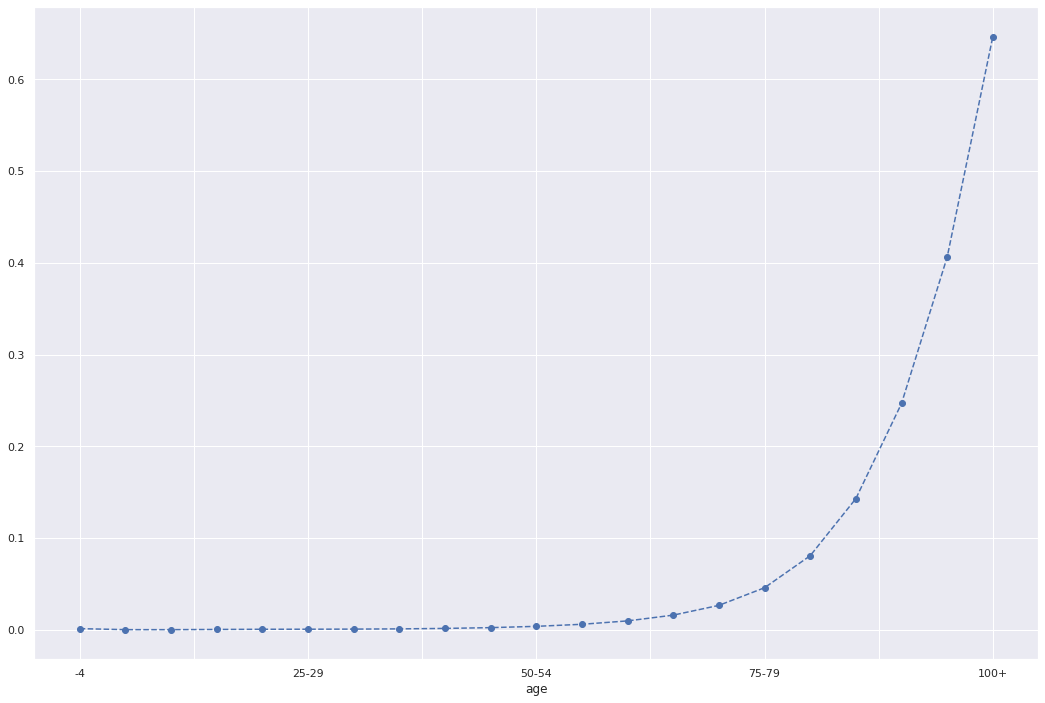

In [549]:
avg_mortality_per_age_grp.plot(figsize=(18,12),style='o--')

In [550]:
std_pop = pop_df_men_women.loc['2019']

In [551]:
strata_abs_deaths = age_grp_mortality * std_pop
strata_abs_deaths

age         -4          5-9         10-14       15-19       20-24       25-29  \
year                                                                            
1968  1722.413643  265.544660  187.256492  328.316473  493.369267  645.336316   
1969  1534.340361  258.860801  161.275301  365.117854  444.375859  621.455627   
1970  1505.831616  247.414251  174.561598  375.541327  456.446164  602.121695   
1971  1541.689742  195.911671  185.782066  386.582399  473.839914  559.869983   
1972  1528.793015  217.790016  150.004111  375.284310  451.878908  641.963820   
1973  1366.368925  185.250164  163.852736  338.884674  472.830340  590.790645   
1974  1330.622615  199.627029  146.525387  337.634595  436.228480  564.702267   
1975  1174.646210  191.119698  158.214334  364.663384  486.927084  614.224781   
1976  1076.575084  178.401590  165.695652  334.046484  483.535767  631.584371   
1977  1059.713507  151.847972  132.636155  288.337444  454.580293  619.658165   
1978  1022.095546  168.416754  130.623714  319.714604  472.177760  607.877465   
1979  1065.900527  159.562906  125.737955  295.198715  417.942683  618.320135   
1980   994.912326  127.215201  123.456856  258.358343  387.252739  619.124930   
1981   933.813892  119.122954  110.513212  264.599507  390.919675  530.963298   
1982   939.911237  120.506716   86.187749  223.601641  346.467979  565.695542   
1983   939.379975  111.034901   94.420189  248.197525  387.891996  566.839877   
1984   871.627831   91.427111  108.021946  230.564006  372.307649  557.721641   
1985   974.665387   99.136362   95.682310  249.688347  360.721341  488.805399   
1986   896.768584   96.012923  116.104963  233.536137  378.046830  551.486337   
1987   912.491076   84.573219   99.609808  248.025612  382.697943  536.508842   
1988   885.755226   94.666248  101.394019  233.510608  405.898811  542.227622   
1989   869.523405   90.409520   81.791923  268.149125  329.107141  525.988498   
1990   901.569645   99.783029  101.011863  229.261956  348.129893  498.718720   
1991   885.093581   82.721223   82.852157  239.888928  300.134942  509.276800   
1992   758.647343   88.048659   81.688041  179.357085  304.005924  431.413437   
1993   670.318912  106.748201   87.373657  197.210223  302.233957  420.221642   
1994   583.130348   74.937906   72.011578  166.598045  263.159750  425.207455   
1995   519.756618   75.167038   69.170988  169.521971  281.607185  369.325583   
1996   501.895374   65.592992   67.997232  146.896000  255.589516  378.929557   
1997   482.737204   73.241654   74.609537  146.011959  286.650090  336.454856   
1998   470.249090   71.049085   88.729653  228.008329  254.554925  334.363657   
1999   444.180331   72.877032   87.624742  146.541197  267.664153  360.427785   
2000   459.978814   58.583234   77.808559  178.979590  308.224595  362.254398   
2001   521.491486   59.340603   63.198306  154.540929  315.714128  334.882683   
2002   491.783558   40.260734   58.711001  162.476407  326.244310  323.841673   
2003   478.436596   53.500131   60.462571  168.626561  284.798666  348.592505   
2004   444.883540   54.616567   58.132808  161.358363  326.304412  349.706659   
2005   392.784519   66.577908   56.225568  138.809308  273.079828  349.412790   
2006   426.123445   56.005025   57.799664  154.225140  297.334499  307.906188   
2007   378.003141   57.659607   47.351484  163.431352  265.638101  385.555727   
2008   364.180457   34.477310   63.650050  141.915037  293.679875  364.007454   
2009   395.129127   63.159628   52.661481  145.226898  257.229273  332.486016   
2010   378.090052   47.200515   49.969355  141.628319  254.787103  364.812444   
2011   304.375223   59.947384   48.875515  145.978514  248.312584  357.955909   
2012   360.873652   45.889120   61.606307  127.963138  230.797340  366.775346   
2013   363.720880   44.741213   45.455249  121.394714  245.771079  399.579149   
2014   307.988575   48.038879   37.032140  121.931577  252.047658  349.682061   
2015   341.804745   43.433479  

In [552]:
strata_abs_deaths

age         -4          5-9         10-14       15-19       20-24       25-29  \
year                                                                            
1968  1722.413643  265.544660  187.256492  328.316473  493.369267  645.336316   
1969  1534.340361  258.860801  161.275301  365.117854  444.375859  621.455627   
1970  1505.831616  247.414251  174.561598  375.541327  456.446164  602.121695   
1971  1541.689742  195.911671  185.782066  386.582399  473.839914  559.869983   
1972  1528.793015  217.790016  150.004111  375.284310  451.878908  641.963820   
1973  1366.368925  185.250164  163.852736  338.884674  472.830340  590.790645   
1974  1330.622615  199.627029  146.525387  337.634595  436.228480  564.702267   
1975  1174.646210  191.119698  158.214334  364.663384  486.927084  614.224781   
1976  1076.575084  178.401590  165.695652  334.046484  483.535767  631.584371   
1977  1059.713507  151.847972  132.636155  288.337444  454.580293  619.658165   
1978  1022.095546  168.416754  130.623714  319.714604  472.177760  607.877465   
1979  1065.900527  159.562906  125.737955  295.198715  417.942683  618.320135   
1980   994.912326  127.215201  123.456856  258.358343  387.252739  619.124930   
1981   933.813892  119.122954  110.513212  264.599507  390.919675  530.963298   
1982   939.911237  120.506716   86.187749  223.601641  346.467979  565.695542   
1983   939.379975  111.034901   94.420189  248.197525  387.891996  566.839877   
1984   871.627831   91.427111  108.021946  230.564006  372.307649  557.721641   
1985   974.665387   99.136362   95.682310  249.688347  360.721341  488.805399   
1986   896.768584   96.012923  116.104963  233.536137  378.046830  551.486337   
1987   912.491076   84.573219   99.609808  248.025612  382.697943  536.508842   
1988   885.755226   94.666248  101.394019  233.510608  405.898811  542.227622   
1989   869.523405   90.409520   81.791923  268.149125  329.107141  525.988498   
1990   901.569645   99.783029  101.011863  229.261956  348.129893  498.718720   
1991   885.093581   82.721223   82.852157  239.888928  300.134942  509.276800   
1992   758.647343   88.048659   81.688041  179.357085  304.005924  431.413437   
1993   670.318912  106.748201   87.373657  197.210223  302.233957  420.221642   
1994   583.130348   74.937906   72.011578  166.598045  263.159750  425.207455   
1995   519.756618   75.167038   69.170988  169.521971  281.607185  369.325583   
1996   501.895374   65.592992   67.997232  146.896000  255.589516  378.929557   
1997   482.737204   73.241654   74.609537  146.011959  286.650090  336.454856   
1998   470.249090   71.049085   88.729653  228.008329  254.554925  334.363657   
1999   444.180331   72.877032   87.624742  146.541197  267.664153  360.427785   
2000   459.978814   58.583234   77.808559  178.979590  308.224595  362.254398   
2001   521.491486   59.340603   63.198306  154.540929  315.714128  334.882683   
2002   491.783558   40.260734   58.711001  162.476407  326.244310  323.841673   
2003   478.436596   53.500131   60.462571  168.626561  284.798666  348.592505   
2004   444.883540   54.616567   58.132808  161.358363  326.304412  349.706659   
2005   392.784519   66.577908   56.225568  138.809308  273.079828  349.412790   
2006   426.123445   56.005025   57.799664  154.225140  297.334499  307.906188   
2007   378.003141   57.659607   47.351484  163.431352  265.638101  385.555727   
2008   364.180457   34.477310   63.650050  141.915037  293.679875  364.007454   
2009   395.129127   63.159628   52.661481  145.226898  257.229273  332.486016   
2010   378.090052   47.200515   49.969355  141.628319  254.787103  364.812444   
2011   304.375223   59.947384   48.875515  145.978514  248.312584  357.955909   
2012   360.873652   45.889120   61.606307  127.963138  230.797340  366.775346   
2013   363.720880   44.741213   45.455249  121.394714  245.771079  399.579149   
2014   307.988575   48.038879   37.032140  121.931577  252.047658  349.682061   
2015   341.804745   43.433479  

<AxesSubplot:xlabel='year'>

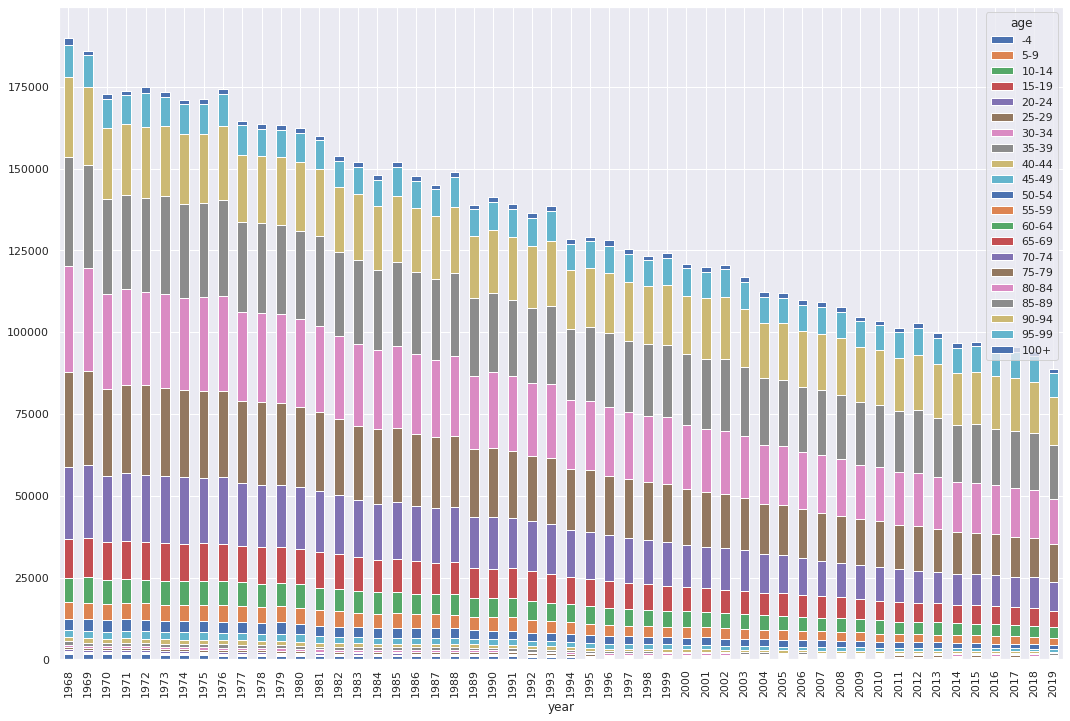

In [553]:
strata_abs_deaths.plot(kind='bar',stacked=True,figsize=(18,12))

In [554]:
tot_strat_deaths = strata_abs_deaths.sum(axis=1)
tot_strat_deaths

year
1968    189936.694873
1969    186056.280247
1970    172939.615767
1971    173849.524252
1972    174864.864895
1973    173508.102909
1974    170968.120349
1975    171304.093236
1976    174390.513811
1977    164434.420350
1978    163653.915667
1979    163439.856750
1980    162340.044963
1981    159968.336996
1982    153806.883561
1983    152004.345275
1984    148047.324972
1985    152027.486876
1986    147617.456708
1987    145084.580125
1988    148930.711156
1989    139041.645261
1990    141189.744322
1991    139136.949699
1992    136464.511527
1993    138576.804256
1994    128372.361440
1995    129068.990548
1996    128069.751229
1997    125327.557230
1998    123325.251599
1999    124229.361601
2000    120911.389457
2001    119900.076805
2002    120670.277710
2003    116756.327723
2004    112172.167121
2005    111870.605811
2006    109785.946166
2007    109206.044628
2008    107577.241853
2009    104695.754824
2010    103524.142624
2011    101409.082753
2012    102673.432002
2013 

In [555]:
age_adj_mortality = tot_strat_deaths / std_pop.sum()
age_adj_mortality

year
1968    0.018391
1969    0.018015
1970    0.016745
1971    0.016834
1972    0.016932
1973    0.016800
1974    0.016555
1975    0.016587
1976    0.016886
1977    0.015922
1978    0.015846
1979    0.015826
1980    0.015719
1981    0.015489
1982    0.014893
1983    0.014718
1984    0.014335
1985    0.014721
1986    0.014294
1987    0.014048
1988    0.014421
1989    0.013463
1990    0.013671
1991    0.013472
1992    0.013214
1993    0.013418
1994    0.012430
1995    0.012497
1996    0.012401
1997    0.012135
1998    0.011941
1999    0.012029
2000    0.011708
2001    0.011610
2002    0.011684
2003    0.011305
2004    0.010861
2005    0.010832
2006    0.010630
2007    0.010574
2008    0.010416
2009    0.010137
2010    0.010024
2011    0.009819
2012    0.009942
2013    0.009651
2014    0.009351
2015    0.009403
2016    0.009264
2017    0.009239
2018    0.009116
2019    0.008595
dtype: float64

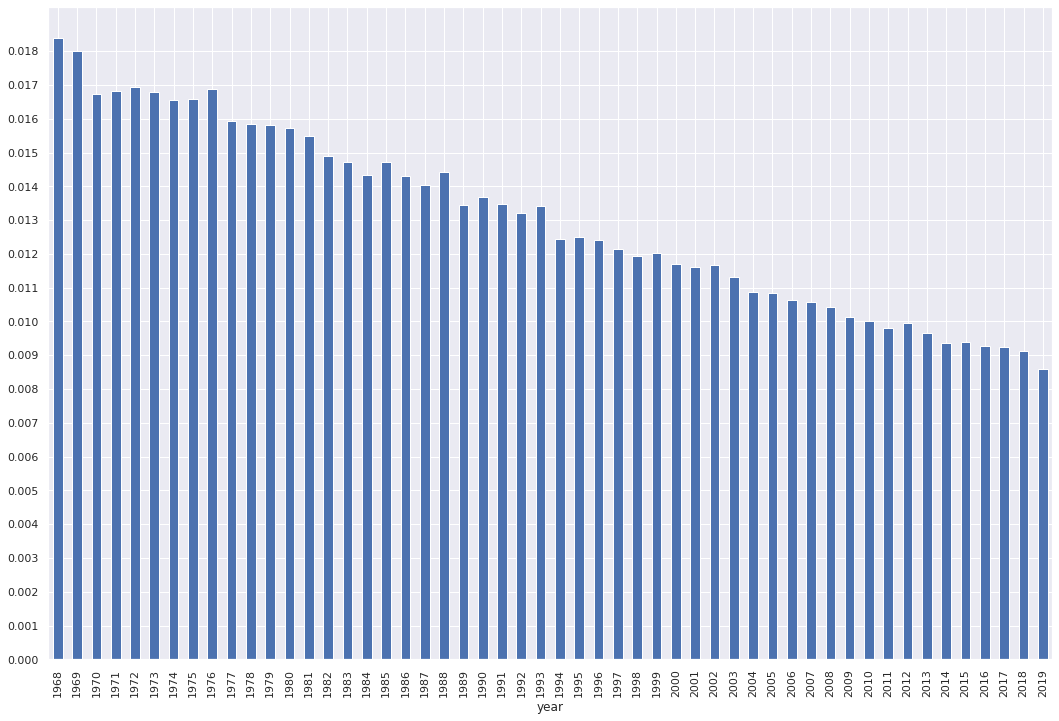

In [556]:
age_adj_mortality.plot(kind='bar',figsize=(18,12))
_= plt.yticks(np.arange(0,0.019,0.001))

In [557]:
dead_df_men_women.head()

age   -4     5-9    10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
year                                                                         
1968   1709    226    163    326    559    482    530    698    981   1843   
1969   1495    229    141    356    503    497    500    642   1060   1859   
1970   1443    228    152    364    511    516    506    616   1010   1693   
1971   1451    186    161    372    510    504    517    673   1031   1726   
1972   1413    211    130    358    467    589    548    632    940   1702   

age   ...  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90-94  95-99  \
year  ...                                                                  
1968  ...   4249   6009   8566  11580  13721  14053   9417   3996    787   
1969  ...   4148   6479   8801  11971  13920  13746   9408   4090    857   
1970  ...   4013   6170   8616  11208  13233  13095   9085   3917    869   
1971  ...   4006   6268   8824  11722  13749  13581   9582   4117    931   
1972  ...   3989   6225   8760  11993  14294  13543   9961   4273   1132   

age   100+   
year         
1968     96  
1969     71  
1970     87  
1971     95  
1972    126  

[5 rows x 21 columns]

In [558]:
dead_2019 = pd.DataFrame(dead_df_men_women.loc['2019'])
dead_2019['age_idx'] = range(1,len(dead_2019) + 1)
dead_2019


2019  age_idx
age                  
-4       289        1
5-9       36        2
10-14     36        3
15-19    122        4
20-24    246        5
25-29    364        6
30-34    339        7
35-39    399        8
40-44    528        9
45-49    764       10
50-54   1296       11
55-59   2050       12
60-64   3288       13
65-69   5142       14
70-74   8803       15
75-79  11448       16
80-84  13813       17
85-89  16407       18
90-94  14870       19
95-99   7273       20
100+    1253       21

In [559]:
dead_2019.describe()

2019    age_idx
count     21.000000  21.000000
mean    4226.952381  11.000000
std     5538.392136   6.204837
min       36.000000   1.000000
25%      339.000000   6.000000
50%     1253.000000  11.000000
75%     7273.000000  16.000000
max    16407.000000  21.000000

In [560]:
ticks_2019 = pd.Series(np.repeat(dead_2019['age_idx'],dead_2019['2019']))
ticks_2019 = ticks_2019.reset_index()
ticks_2019

age  age_idx
0        -4        1
1        -4        1
2        -4        1
3        -4        1
4        -4        1
...     ...      ...
88761  100+       21
88762  100+       21
88763  100+       21
88764  100+       21
88765  100+       21

[88766 rows x 2 columns]

In [561]:
ticks_2019.describe()

age_idx
count  88766.000000
mean      16.623245
std        2.845893
min        1.000000
25%       15.000000
50%       17.000000
75%       19.000000
max       21.000000

In [562]:
dead_df_men_women.columns

CategoricalIndex(['-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                  '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
                  '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                  '95-99', '100+'],
                 categories=['-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', ...], ordered=False, name='age', dtype='category')

In [563]:
### https://la.utexas.edu/users/denbow/labs/Ageofdeath.htm ###


avg_age_of_death = dead_df_men_women.copy()
# first, calculate median age per age group by subtracting the larger number, dividing by 2,
# then adding that to the lower nr.

grp_medians = [(4-0)/2+0,(9-5)/2+5,(14-10)/2+10,(19-15)/2+15,(24-20)/2+20,(29-25)/2+25,
              (34-30)/2+30,(39-35)/2+35,(44-40)/2+40,(49-45)/2+45,(54-50)/2+50,(59-55)/2+55,
              (64-60)/2+60,(69-65)/2+65,(74-70)/2+70,(79-75)/2+75,(84-80)/2+80,(89-85)/2+85,
              (94-90)/2+90,(99-95)/2+95,100]
grp_medians

[2.0,
 7.0,
 12.0,
 17.0,
 22.0,
 27.0,
 32.0,
 37.0,
 42.0,
 47.0,
 52.0,
 57.0,
 62.0,
 67.0,
 72.0,
 77.0,
 82.0,
 87.0,
 92.0,
 97.0,
 100]

In [564]:
avg_age_of_death.columns=grp_medians
avg_age_of_death

2.0    7.0    12.0   17.0   22.0   27.0   32.0   37.0   42.0   47.0   \
year                                                                         
1968   1709    226    163    326    559    482    530    698    981   1843   
1969   1495    229    141    356    503    497    500    642   1060   1859   
1970   1443    228    152    364    511    516    506    616   1010   1693   
1971   1451    186    161    372    510    504    517    673   1031   1726   
1972   1413    211    130    358    467    589    548    632    940   1702   
1973   1248    179    144    320    471    543    575    655    951   1560   
1974   1222    188    133    319    422    512    594    636    947   1590   
1975   1072    176    149    342    465    544    626    677    983   1575   
1976    960    162    161    312    462    542    668    727    944   1464   
1977    920    136    132    270    434    518    656    727   1020   1474   
1978    859    150    130    304    448    495    682    750    956   1391   
1979    870    143    122    290    397    491    695    783    990   1388   
1980    800    113    117    263    365    485    643    844   1000   1417   
1981    743    103    103    277    365    414    586    776    909   1346   
1982    742    101     79    239    322    438    530    887    931   1293   
1983    739     90     86    265    364    434    514    761    987   1234   
1984    683     72     99    240    360    426    548    768   1030   1241   
1985    767     77     87    254    361    370    530    779   1045   1225   
1986    719     74    103    234    390    415    471    779   1060   1392   
1987    751     65     86    245    404    405    516    698   1079   1376   
1988    760     73     85    230    430    417    515    729   1185   1445   
1989    780     70     67    267    343    421    495    711   1124   1406   
1990    848     78     82    227    356    415    462    633   1051   1549   
1991    863     66     67    232    302    437    466    631   1041   1647   
1992    761     72     66    169    301    378    431    592    934   1619   
1993    678     91     71    181    298    369    425    621    889   1592   
1994    587     67     59    150    262    366    438    640    930   1552   
1995    503     70     57    151    278    310    442    528    894   1470   
1996    460     63     57    130    246    312    414    521    785   1380   
1997    416     72     64    129    268    272    387    538    760   1274   
1998    384     70     79    202    231    268    366    512    749   1214   
1999    346     71     81    130    237    290    363    495    803   1205   
2000    350     55     75    160    271    290    306    517    676   1209   
2001    395     53     63    141    277    263    326    492    706   1221   
2002    378     34     60    152    287    249    329    472    681   1083   
2003    376     43     62    164    252    262    292    483    694   1109   
2004    359     42     59    163    290    258    286    436    639   1075   
2005    324     50     55    146    245    257    299    428    659   1019   
2006    363     42     54    168    274    228    301    422    667    974   
2007    330     44     42    183    252    289    273    401    682    998   
2008    325     27     54    160    290    277    324    388    666    940   
2009    360     51     43    163    265    257    296    413    630   1000   
2010    353     39     40    154    274    287    294    343    584    946   
2011    287     51     39    152    275    288    302    377    547    973   
2012    344     40     50    127    262    302    274    394    559    980   
2013    350     40     38    116    281    341    315    381    545    947   
2014    299     44     32    113    288    310    371    339    570    953   
2015    333     41     51    109    290    381    336    355    543    844   
2016    344     54     41    102    229    340    367    376    571    880   
2017    322     40     44   

In [565]:
yearly_sums = avg_age_of_death.sum(axis=1)
yearly_sums

year
1968    82464
1969    83338
1970    80016
1971    82734
1972    84056
1973    85640
1974    86316
1975    88208
1976    90677
1977    88200
1978    89681
1979    91074
1980    91797
1981    92034
1982    90670
1983    90790
1984    90482
1985    94032
1986    93295
1987    93306
1988    96738
1989    92109
1990    95161
1991    95200
1992    94710
1993    97007
1994    91844
1995    93955
1996    94133
1997    93326
1998    93271
1999    94726
2000    93461
2001    93752
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
dtype: int64

In [566]:
years_lost = avg_age_of_death * grp_medians
tot_years_lost = years_lost.sum(axis=1)
tot_years_lost

year
1968    5841161.0
1969    5915579.0
1970    5670223.0
1971    5881683.0
1972    5999590.0
1973    6152330.0
1974    6213558.0
1975    6372617.0
1976    6589348.0
1977    6408175.0
1978    6541420.0
1979    6660494.0
1980    6746625.0
1981    6803106.0
1982    6709881.0
1983    6750598.0
1984    6741721.0
1985    7041114.0
1986    6998109.0
1987    7012821.0
1988    7300098.0
1989    6957839.0
1990    7218772.0
1991    7231689.0
1992    7232219.0
1993    7452147.0
1994    7049141.0
1995    7254384.0
1996    7305323.0
1997    7259808.0
1998    7270913.0
1999    7416254.0
2000    7327123.0
2001    7362439.0
2002    7491490.0
2003    7322889.0
2004    7132542.0
2005    7246249.0
2006    7216447.0
2007    7277707.0
2008    7260927.0
2009    7150826.0
2010    7198796.0
2011    7170050.0
2012    7347168.0
2013    7212054.0
2014    7096321.0
2015    7264293.0
2016    7273770.0
2017    7367973.0
2018    7381069.0
2019    7109091.0
dtype: float64

In [567]:
avg_age = tot_years_lost / yearly_sums
avg_age

year
1968    70.832860
1969    70.982973
1970    70.863615
1971    71.091486
1972    71.376106
1973    71.839444
1974    71.986167
1975    72.245341
1976    72.668350
1977    72.655045
1978    72.940980
1979    73.132771
1980    73.495049
1981    73.919486
1982    74.003320
1983    74.353982
1984    74.508974
1985    74.879977
1986    75.010547
1987    75.159379
1988    75.462569
1989    75.539187
1990    75.858513
1991    75.963120
1992    76.361725
1993    76.820714
1994    76.751241
1995    77.211261
1996    77.606397
1997    77.789769
1998    77.954702
1999    78.291641
2000    78.397652
2001    78.531007
2002    78.850319
2003    78.773776
2004    78.784761
2005    79.012638
2006    79.147669
2007    79.339217
2008    79.398648
2009    79.383060
2010    79.556135
2011    79.722142
2012    79.914377
2013    79.777593
2014    79.755451
2015    79.909061
2016    79.947352
2017    80.111045
2018    80.068005
2019    80.087995
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

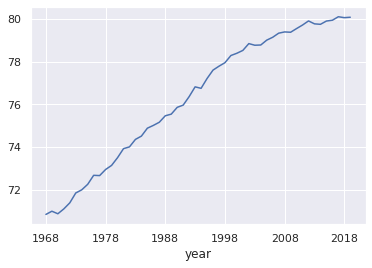

In [568]:
avg_age.plot()

In [569]:
avg_age / avg_age.shift()

year
1968         NaN
1969    1.002119
1970    0.998318
1971    1.003216
1972    1.004004
1973    1.006491
1974    1.002042
1975    1.003600
1976    1.005855
1977    0.999817
1978    1.003936
1979    1.002629
1980    1.004954
1981    1.005775
1982    1.001134
1983    1.004738
1984    1.002085
1985    1.004979
1986    1.001744
1987    1.001984
1988    1.004034
1989    1.001015
1990    1.004227
1991    1.001379
1992    1.005247
1993    1.006011
1994    0.999096
1995    1.005994
1996    1.005118
1997    1.002363
1998    1.002120
1999    1.004322
2000    1.001354
2001    1.001701
2002    1.004066
2003    0.999029
2004    1.000139
2005    1.002892
2006    1.001709
2007    1.002420
2008    1.000749
2009    0.999804
2010    1.002180
2011    1.002087
2012    1.002411
2013    0.998288
2014    0.999722
2015    1.001926
2016    1.000479
2017    1.002048
2018    0.999463
2019    1.000250
dtype: float64

In [570]:
### dead in yearly groups 
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaFodelsearK'
data = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [571]:
r = requests.post(url,json=data)
r.status_code

200

In [572]:
json = r.json()

In [573]:
json['data'][0]

{'key': ['00', '0', '1', '1968'], 'values': ['783']}

In [574]:
dead_yearly_grp = pd.DataFrame(parse_json(json))
dead_yearly_grp.drop(0,axis=1,inplace=True)
dead_yearly_grp.columns = ['age','gender','year','dead']
dead_yearly_grp['dead'] = dead_yearly_grp['dead'].astype(int)

dead_by_gender = dead_yearly_grp.copy()

dead_yearly_grp = (dead_yearly_grp.groupby(['year','age']).sum()).reset_index()
dead_yearly_grp

year   age  dead
0     1968     0  1349
1     1968     1   169
2     1968    10    30
3     1968  100+    96
4     1968    11    25
...    ...   ...   ...
5247  2019    95  2161
5248  2019    96  1760
5249  2019    97  1324
5250  2019    98  1160
5251  2019    99   868

[5252 rows x 3 columns]

In [575]:
# to test effect 
#dead_yearly_grp['age'] = dead_yearly_grp['age'].replace('100+','120')

In [576]:
dead_yearly_grp['age'] = dead_yearly_grp['age'].apply(lambda x : x.replace('+','')).astype(int)
# test effect 
#dead_yearly_grp['age'] += 0.5

# test_effect
#dead_yearly_grp = dead_yearly_grp.loc[dead_yearly_grp['age'] > 0]

dead_yearly_grp

year  age  dead
0     1968    0  1349
1     1968    1   169
2     1968   10    30
3     1968  100    96
4     1968   11    25
...    ...  ...   ...
5247  2019   95  2161
5248  2019   96  1760
5249  2019   97  1324
5250  2019   98  1160
5251  2019   99   868

[5252 rows x 3 columns]

In [577]:
dead_yearly_grp = dead_yearly_grp.sort_values(['year','age'])

yearly_deaths = dead_yearly_grp.copy()
yearly_deaths

year  age  dead
0     1968    0  1349
1     1968    1   169
13    1968    2    79
24    1968    3    62
35    1968    4    50
...    ...  ...   ...
5248  2019   96  1760
5249  2019   97  1324
5250  2019   98  1160
5251  2019   99   868
5154  2019  100  1253

[5252 rows x 3 columns]

In [578]:
dead_yearly_grp = dead_yearly_grp.groupby(['year','age']).mean()
dead_yearly_grp

dead
year age      
1968 0    1349
     1     169
     2      79
     3      62
     4      50
...        ...
2019 96   1760
     97   1324
     98   1160
     99    868
     100  1253

[5252 rows x 1 columns]

In [579]:
dead_yearly_grp['years_lived'] = dead_yearly_grp.index.get_level_values(1) * dead_yearly_grp['dead']
dead_yearly_grp

dead  years_lived
year age                   
1968 0    1349            0
     1     169          169
     2      79          158
     3      62          186
     4      50          200
...        ...          ...
2019 96   1760       168960
     97   1324       128428
     98   1160       113680
     99    868        85932
     100  1253       125300

[5252 rows x 2 columns]

In [580]:
totals = dead_yearly_grp.groupby('year').sum()
totals

dead  years_lived
year                    
1968  82464      5839057
1969  83338      5914353
1970  80016      5667760
1971  82734      5878930
1972  84056      5996697
1973  85640      6150272
1974  86316      6212055
1975  88208      6371445
1976  90677      6587658
1977  88200      6407091
1978  89681      6540044
1979  91074      6659999
1980  91797      6745637
1981  92034      6801774
1982  90670      6708816
1983  90790      6749171
1984  90482      6741078
1985  94032      7039979
1986  93295      6996681
1987  93306      7011571
1988  96738      7299071
1989  92109      6957683
1990  95161      7217759
1991  95200      7231012
1992  94710      7231577
1993  97007      7452623
1994  91844      7049119
1995  93955      7253509
1996  94133      7303834
1997  93326      7259116
1998  93271      7271144
1999  94726      7416601
2000  93461      7326275
2001  93752      7362011
2002  95009      7490206
2003  92961      7323340
2004  90532      7133935
2005  91710      7245718
2006  91177      7215338
2007  91729      7277230
2008  91449      7261434
2009  90080      7152939
2010  90487      7199263
2011  89938      7169365
2012  91938      7347474
2013  90402      7212208
2014  88976      7098208
2015  90907      7263932
2016  90982      7272969
2017  91972      7369203
2018  92185      7381604
2019  88766      7109783

In [581]:
avg_age_2 = totals['years_lived'] / totals['dead']
avg_age_2

year
1968    70.807346
1969    70.968262
1970    70.832833
1971    71.058211
1972    71.341689
1973    71.815413
1974    71.968754
1975    72.232054
1976    72.649713
1977    72.642755
1978    72.925636
1979    73.127336
1980    73.484286
1981    73.905013
1982    73.991574
1983    74.338264
1984    74.501868
1985    74.867907
1986    74.995241
1987    75.145982
1988    75.451953
1989    75.537494
1990    75.847868
1991    75.956008
1992    76.354947
1993    76.825621
1994    76.751002
1995    77.201948
1996    77.590579
1997    77.782354
1998    77.957179
1999    78.295304
2000    78.388579
2001    78.526442
2002    78.836805
2003    78.778628
2004    78.800148
2005    79.006848
2006    79.135506
2007    79.334017
2008    79.404193
2009    79.406516
2010    79.561296
2011    79.714526
2012    79.917705
2013    79.779297
2014    79.776659
2015    79.905090
2016    79.938548
2017    80.124418
2018    80.073808
2019    80.095791
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


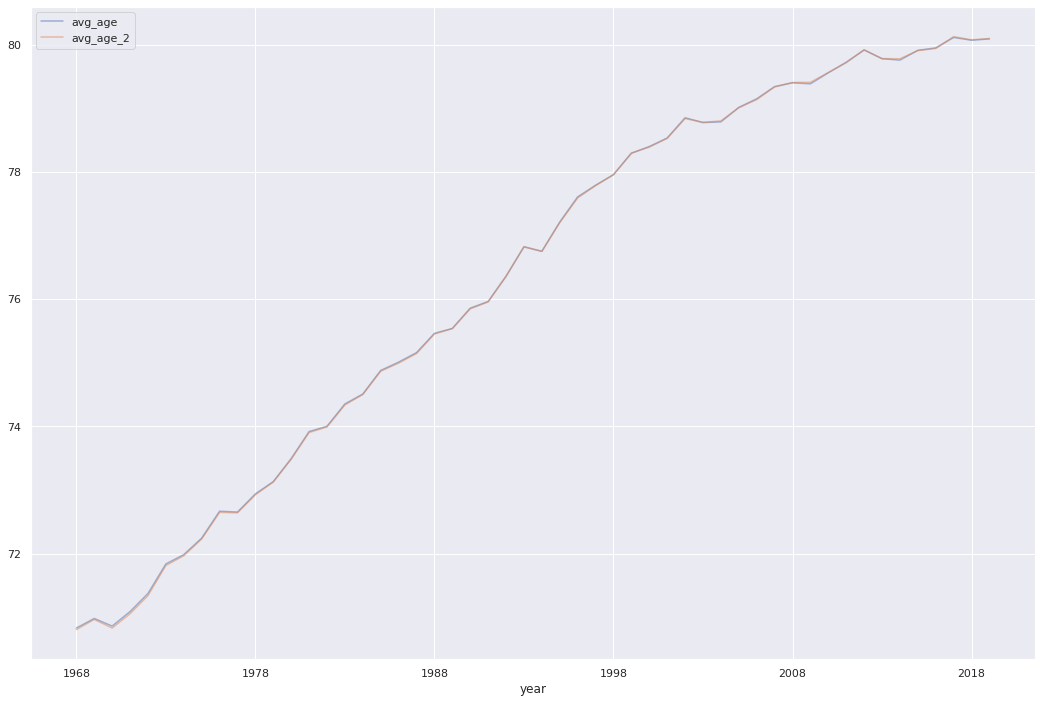

In [582]:
ax = avg_age.plot(alpha=0.5,figsize=(18,12),label='avg_age')

# by adding 1 to each age group, as above is test effect, the diff is significant

avg_age_2.plot(ax=ax,alpha=0.5,label='avg_age_2')
plt.legend(loc='upper left')

To get median from a frequency table, start by sorting the keys (age groups) into ascending scale. Then do a 
cumsum on the frequency (dead). Take the median (midpoint) of that cumsum, that is, the half value of the cumsum. Then find out which value in the cumsum column corresponds to that half cumsum (median)

https://support.sisense.com/hc/en-us/community/posts/360033174073-Calculating-Weighted-Median-Median-of-Data-in-Frequency-Table-Mean-Mode

In [583]:
g = dead_yearly_grp.groupby('year',group_keys=False)
g

In [584]:
sorted_dead = g.apply(lambda x : x.sort_index(level=[0,1],ascending=[True,True]))
sorted_dead

dead  years_lived
year age                   
1968 0    1349            0
     1     169          169
     2      79          158
     3      62          186
     4      50          200
...        ...          ...
2019 96   1760       168960
     97   1324       128428
     98   1160       113680
     99    868        85932
     100  1253       125300

[5252 rows x 2 columns]

In [585]:
cums = sorted_dead.groupby('year').cumsum()
cums.columns = ['cum_dead','cum_years_lived']
cums

cum_dead  cum_years_lived
year age                           
1968 0        1349                0
     1        1518              169
     2        1597              327
     3        1659              513
     4        1709              713
...            ...              ...
2019 96      84161          6656443
     97      85485          6784871
     98      86645          6898551
     99      87513          6984483
     100     88766          7109783

[5252 rows x 2 columns]

In [586]:
all_dead = sorted_dead.join(cums)
all_dead

dead  years_lived  cum_dead  cum_years_lived
year age                                              
1968 0    1349            0      1349                0
     1     169          169      1518              169
     2      79          158      1597              327
     3      62          186      1659              513
     4      50          200      1709              713
...        ...          ...       ...              ...
2019 96   1760       168960     84161          6656443
     97   1324       128428     85485          6784871
     98   1160       113680     86645          6898551
     99    868        85932     87513          6984483
     100  1253       125300     88766          7109783

[5252 rows x 4 columns]

In [587]:
all_dead.drop(['years_lived','cum_years_lived'],axis=1,inplace=True)
all_dead

dead  cum_dead
year age                
1968 0    1349      1349
     1     169      1518
     2      79      1597
     3      62      1659
     4      50      1709
...        ...       ...
2019 96   1760     84161
     97   1324     85485
     98   1160     86645
     99    868     87513
     100  1253     88766

[5252 rows x 2 columns]

In [588]:
# median is middle value of cum_dead #
medians = all_dead.groupby('year')['cum_dead'].apply(lambda x : x.iloc[-1] / 2 + 1) # ODD NR OF DATA POINTS
medians

year
1968    41233.0
1969    41670.0
1970    40009.0
1971    41368.0
1972    42029.0
1973    42821.0
1974    43159.0
1975    44105.0
1976    45339.5
1977    44101.0
1978    44841.5
1979    45538.0
1980    45899.5
1981    46018.0
1982    45336.0
1983    45396.0
1984    45242.0
1985    47017.0
1986    46648.5
1987    46654.0
1988    48370.0
1989    46055.5
1990    47581.5
1991    47601.0
1992    47356.0
1993    48504.5
1994    45923.0
1995    46978.5
1996    47067.5
1997    46664.0
1998    46636.5
1999    47364.0
2000    46731.5
2001    46877.0
2002    47505.5
2003    46481.5
2004    45267.0
2005    45856.0
2006    45589.5
2007    45865.5
2008    45725.5
2009    45041.0
2010    45244.5
2011    44970.0
2012    45970.0
2013    45202.0
2014    44489.0
2015    45454.5
2016    45492.0
2017    45987.0
2018    46093.5
2019    44384.0
Name: cum_dead, dtype: float64

In [589]:
foo = all_dead['cum_dead'].unstack()
foo = foo.T
foo

year   1968   1969   1970   1971   1972   1973   1974   1975   1976   1977  \
age                                                                          
0      1349   1151   1125   1170   1125   1011    963    813    745    696   
1      1518   1309   1243   1304   1255   1120   1093    935    844    799   
2      1597   1377   1315   1358   1312   1175   1152    992    888    843   
3      1659   1438   1368   1409   1362   1213   1192   1031    938    883   
4      1709   1495   1443   1451   1413   1248   1222   1072    960    920   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96    82057  82945  79614  82285  83546  85114  85739  87588  89999  87528   
97    82216  83099  79774  82458  83728  85321  85943  87805  90250  87776   
98    82306  83195  79871  82568  83853  85432  86097  87965  90410  87945   
99    82368  83267  79929  82639  83930  85515  86194  88056  90519  88060   
100   82464  83338  80016  82734  84056  85640  86316  88208  90677  88200   

year  ...   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
age   ...                                                                  
0     ...    254    202    261    262    219    250    254    245    202   
1     ...    307    248    303    315    264    295    302    285    254   
2     ...    330    268    320    326    279    315    322    300    274   
3     ...    341    274    330    337    288    326    333    311    287   
4     ...    353    287    344    350    299    333    344    322    302   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96    ...  86953  86280  88002  86509  85076  86847  86868  87304  87339   
97    ...  88068  87386  89161  87667  86270  88066  88179  88878  88866   
98    ...  88880  88260  90081  88546  87146  89021  89127  89914  90109   
99    ...  89433  88885  90734  89202  87753  89669  89770  90649  90837   
100   ...  90487  89938  91938  90402  88976  90907  90982  91972  92185   

year   2019  
age          
0       201  
1       247  
2       263  
3       277  
4       289  
..      ...  
96    84161  
97    85485  
98    86645  
99    87513  
100   88766  

[101 rows x 52 columns]

In [590]:
foo - medians

year     1968     1969     1970     1971     1972     1973     1974     1975  \
age                                                                            
0    -39884.0 -40519.0 -38884.0 -40198.0 -40904.0 -41810.0 -42196.0 -43292.0   
1    -39715.0 -40361.0 -38766.0 -40064.0 -40774.0 -41701.0 -42066.0 -43170.0   
2    -39636.0 -40293.0 -38694.0 -40010.0 -40717.0 -41646.0 -42007.0 -43113.0   
3    -39574.0 -40232.0 -38641.0 -39959.0 -40667.0 -41608.0 -41967.0 -43074.0   
4    -39524.0 -40175.0 -38566.0 -39917.0 -40616.0 -41573.0 -41937.0 -43033.0   
..        ...      ...      ...      ...      ...      ...      ...      ...   
96    40824.0  41275.0  39605.0  40917.0  41517.0  42293.0  42580.0  43483.0   
97    40983.0  41429.0  39765.0  41090.0  41699.0  42500.0  42784.0  43700.0   
98    41073.0  41525.0  39862.0  41200.0  41824.0  42611.0  42938.0  43860.0   
99    41135.0  41597.0  39920.0  41271.0  41901.0  42694.0  43035.0  43951.0   
100   41231.0  41668.0  40007.0  41366.0  42027.0  42819.0  43157.0  44103.0   

year     1976     1977  ...     2010     2011     2012     2013     2014  \
age                     ...                                                
0    -44594.5 -43405.0  ... -44990.5 -44768.0 -45709.0 -44940.0 -44270.0   
1    -44495.5 -43302.0  ... -44937.5 -44722.0 -45667.0 -44887.0 -44225.0   
2    -44451.5 -43258.0  ... -44914.5 -44702.0 -45650.0 -44876.0 -44210.0   
3    -44401.5 -43218.0  ... -44903.5 -44696.0 -45640.0 -44865.0 -44201.0   
4    -44379.5 -43181.0  ... -44891.5 -44683.0 -45626.0 -44852.0 -44190.0   
..        ...      ...  ...      ...      ...      ...      ...      ...   
96    44659.5  43427.0  ...  41708.5  41310.0  42032.0  41307.0  40587.0   
97    44910.5  43675.0  ...  42823.5  42416.0  43191.0  42465.0  41781.0   
98    45070.5  43844.0  ...  43635.5  43290.0  44111.0  43344.0  42657.0   
99    45179.5  43959.0  ...  44188.5  43915.0  44764.0  44000.0  43264.0   
100   45337.5  44099.0  ...  45242.5  44968.0  45968.0  45200.0  44487.0   

year     2015     2016     2017     2018     2019  
age                                                
0    -45204.5 -45238.0 -45742.0 -45891.5 -44183.0  
1    -45159.5 -45190.0 -45702.0 -45839.5 -44137.0  
2    -45139.5 -45170.0 -45687.0 -45819.5 -44121.0  
3    -45128.5 -45159.0 -45676.0 -45806.5 -44107.0  
4    -45121.5 -45148.0 -45665.0 -45791.5 -44095.0  
..        ...      ...      ...      ...      ...  
96    41392.5  41376.0  41317.0  41245.5  39777.0  
97    42611.5  42687.0  42891.0  42772.5  41101.0  
98    43566.5  43635.0  43927.0  44015.5  42261.0  
99    44214.5  44278.0  44662.0  44743.5  43129.0  
100   45452.5  45490.0  45985.0  46091.5  44382.0  

[101 rows x 52 columns]

In [591]:
baz = foo >= medians
median_age = len(foo) - baz.sum()
median_age

year
1968    75
1969    75
1970    75
1971    75
1972    75
1973    75
1974    75
1975    76
1976    76
1977    76
1978    76
1979    76
1980    77
1981    77
1982    77
1983    77
1984    77
1985    78
1986    78
1987    78
1988    79
1989    79
1990    79
1991    79
1992    80
1993    80
1994    80
1995    80
1996    81
1997    81
1998    81
1999    81
2000    81
2001    82
2002    82
2003    82
2004    82
2005    82
2006    83
2007    83
2008    83
2009    83
2010    83
2011    83
2012    83
2013    83
2014    83
2015    83
2016    83
2017    83
2018    83
2019    83
dtype: int64

In [592]:
mask = (foo - medians) >= 0
bar = foo[mask]

bar

year     1968     1969     1970     1971     1972     1973     1974     1975  \
age                                                                            
0         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
..        ...      ...      ...      ...      ...      ...      ...      ...   
96    82057.0  82945.0  79614.0  82285.0  83546.0  85114.0  85739.0  87588.0   
97    82216.0  83099.0  79774.0  82458.0  83728.0  85321.0  85943.0  87805.0   
98    82306.0  83195.0  79871.0  82568.0  83853.0  85432.0  86097.0  87965.0   
99    82368.0  83267.0  79929.0  82639.0  83930.0  85515.0  86194.0  88056.0   
100   82464.0  83338.0  80016.0  82734.0  84056.0  85640.0  86316.0  88208.0   

year     1976     1977  ...     2010     2011     2012     2013     2014  \
age                     ...                                                
0         NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
1         NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
2         NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
3         NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
4         NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
..        ...      ...  ...      ...      ...      ...      ...      ...   
96    89999.0  87528.0  ...  86953.0  86280.0  88002.0  86509.0  85076.0   
97    90250.0  87776.0  ...  88068.0  87386.0  89161.0  87667.0  86270.0   
98    90410.0  87945.0  ...  88880.0  88260.0  90081.0  88546.0  87146.0   
99    90519.0  88060.0  ...  89433.0  88885.0  90734.0  89202.0  87753.0   
100   90677.0  88200.0  ...  90487.0  89938.0  91938.0  90402.0  88976.0   

year     2015     2016     2017     2018     2019  
age                                                
0         NaN      NaN      NaN      NaN      NaN  
1         NaN      NaN      NaN      NaN      NaN  
2         NaN      NaN      NaN      NaN      NaN  
3         NaN      NaN      NaN      NaN      NaN  
4         NaN      NaN      NaN      NaN      NaN  
..        ...      ...      ...      ...      ...  
96    86847.0  86868.0  87304.0  87339.0  84161.0  
97    88066.0  88179.0  88878.0  88866.0  85485.0  
98    89021.0  89127.0  89914.0  90109.0  86645.0  
99    89669.0  89770.0  90649.0  90837.0  87513.0  
100   90907.0  90982.0  91972.0  92185.0  88766.0  

[101 rows x 52 columns]

In [593]:
for col in bar.columns:
    print (col,bar[col].argmin())

1968 75
1969 75
1970 75
1971 75
1972 75
1973 75
1974 75
1975 76
1976 76
1977 76
1978 76
1979 76
1980 77
1981 77
1982 77
1983 77
1984 77
1985 78
1986 78
1987 78
1988 79
1989 79
1990 79
1991 79
1992 80
1993 80
1994 80
1995 80
1996 81
1997 81
1998 81
1999 81
2000 81
2001 82
2002 82
2003 82
2004 82
2005 82
2006 83
2007 83
2008 83
2009 83
2010 83
2011 83
2012 83
2013 83
2014 83
2015 83
2016 83
2017 83
2018 83
2019 83


In [594]:
all_dead
all_dead_2019 = all_dead.loc['2019']
all_dead_2019

dead  cum_dead
age                
0     201       201
1      46       247
2      16       263
3      14       277
4      12       289
..    ...       ...
96   1760     84161
97   1324     85485
98   1160     86645
99    868     87513
100  1253     88766

[101 rows x 2 columns]

In [595]:
median = all_dead_2019.iloc[-1]['cum_dead'] / 2+1
median

44384.0

In [596]:
all_dead_2019.loc[all_dead_2019['cum_dead'] >= median]

dead  cum_dead
age                
83   2885     46005
84   2958     48963
85   3046     52009
86   3112     55121
87   3389     58510
88   3409     61919
89   3451     65370
90   3329     68699
91   3252     71951
92   2999     74950
93   2804     77754
94   2486     80240
95   2161     82401
96   1760     84161
97   1324     85485
98   1160     86645
99    868     87513
100  1253     88766

In [597]:
# simple ex 


df = pd.DataFrame({'score' : range(1,6),
                  'freq' :range(1,6)})

df['cum_freq'] = df['freq'].cumsum()
median_point = int(df['cum_freq'].iloc[-1] / 2 + 1)

print (median_point)

df
# so median is the 8th score, which falls in cum_freq value row 10, i.e the 8:th value is a score of 4

8


score  freq  cum_freq
0      1     1         1
1      2     2         3
2      3     3         6
3      4     4        10
4      5     5        15

In [598]:
flat_scores = pd.Series(np.repeat(df['score'],df['freq']))
flat_scores = flat_scores.reset_index(drop=True)
flat_scores.median()

4.0

In [599]:
# flat on real data

In [600]:
all_dead


dead  cum_dead
year age                
1968 0    1349      1349
     1     169      1518
     2      79      1597
     3      62      1659
     4      50      1709
...        ...       ...
2019 96   1760     84161
     97   1324     85485
     98   1160     86645
     99    868     87513
     100  1253     88766

[5252 rows x 2 columns]

In [601]:
all_dead['age_col'] = all_dead.index.get_level_values(1)
all_flat = all_dead.groupby('year',group_keys=False).apply(lambda row : np.repeat(row['age_col'],row['dead']))
all_flat

year  age
1968  0        0
      0        0
      0        0
      0        0
      0        0
            ... 
2019  100    100
      100    100
      100    100
      100    100
      100    100
Name: age_col, Length: 4729403, dtype: int64

In [602]:
flattened_medians = all_flat.groupby('year').median()
flattened_means = all_flat.groupby('year').mean()
flats = pd.concat([flattened_medians,flattened_means],axis=1)
flats.columns=['median','mean']
flats

median       mean
year                   
1968      75  70.807346
1969      75  70.968262
1970      75  70.832833
1971      75  71.058211
1972      75  71.341689
1973      75  71.815413
1974      75  71.968754
1975      76  72.232054
1976      76  72.649713
1977      76  72.642755
1978      76  72.925636
1979      76  73.127336
1980      77  73.484286
1981      77  73.905013
1982      77  73.991574
1983      77  74.338264
1984      77  74.501868
1985      78  74.867907
1986      78  74.995241
1987      78  75.145982
1988      79  75.451953
1989      79  75.537494
1990      79  75.847868
1991      79  75.956008
1992      80  76.354947
1993      80  76.825621
1994      80  76.751002
1995      80  77.201948
1996      81  77.590579
1997      81  77.782354
1998      81  77.957179
1999      81  78.295304
2000      81  78.388579
2001      82  78.526442
2002      82  78.836805
2003      82  78.778628
2004      82  78.800148
2005      82  79.006848
2006      83  79.135506
2007      83  79.334017
2008      83  79.404193
2009      83  79.406516
2010      83  79.561296
2011      83  79.714526
2012      83  79.917705
2013      83  79.779297
2014      83  79.776659
2015      83  79.905090
2016      83  79.938548
2017      83  80.124418
2018      83  80.073808
2019      83  80.095791

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

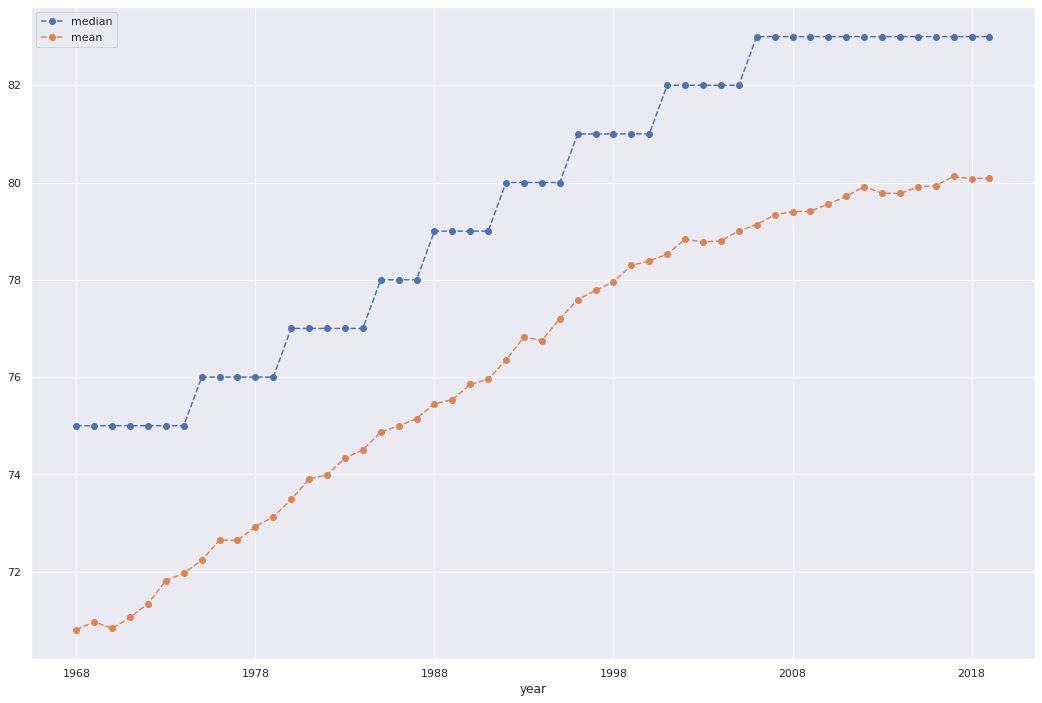

In [603]:
flats.plot(figsize=(18,12),style='o--')

In [604]:
all_dead.droplevel(1).groupby('year')['dead'].sum()

vals = [1,2,3,4,5]

np.random.choice(vals,5,replace=False)

array([1, 3, 2, 4, 5])

In [605]:
# general example of descriptive stats taken from a frequency table

np.random.seed(666)

vals = [0,1,2,3,4,5]

nr_categories = 5

df_freq = pd.DataFrame({'math' : np.random.choice(vals,nr_categories,replace=False),
                  'physics' : np.random.choice(vals,nr_categories,replace=False),
                  'chemistry' : np.random.choice(vals,nr_categories,replace=False),
                  'biology' : np.random.choice(vals,nr_categories,replace=False)},
                       index=range(1,nr_categories + 1))

df_freq.index.name='points'
df_freq.columns.name='subject'

df_freq.sort_index(inplace=True)

# taking mean & median does not give what we want - it gives values of freq, not of points

print ()
print ('mean',df_freq.mean())
print ()
print ('median',df_freq.median())
print ()
df_freq


mean subject
math         2.2
physics      2.8
chemistry    2.2
biology      3.0
dtype: float64

median subject
math         2.0
physics      3.0
chemistry    2.0
biology      3.0
dtype: float64



subject  math  physics  chemistry  biology
points                                    
1           3        0          0        2
2           0        3          3        4
3           5        2          1        1
4           1        5          2        3
5           2        4          5        5

In [606]:
df_freq.sum()

subject
math         11
physics      14
chemistry    11
biology      15
dtype: int64

In [607]:
df_freq_subgrps = pd.DataFrame(df_freq.unstack()) 
df_freq_subgrps.columns=['freq']
df_freq_subgrps['points'] = df_freq_subgrps.index.get_level_values(1)
df_freq_subgrps = df_freq_subgrps[['points','freq']]
df_freq_subgrps = df_freq_subgrps.droplevel(1)

df_freq_subgrps

points  freq
subject                
math            1     3
math            2     0
math            3     5
math            4     1
math            5     2
physics         1     0
physics         2     3
physics         3     2
physics         4     5
physics         5     4
chemistry       1     0
chemistry       2     3
chemistry       3     1
chemistry       4     2
chemistry       5     5
biology         1     2
biology         2     4
biology         3     1
biology         4     3
biology         5     5

In [608]:
serialized_points = df_freq_subgrps.groupby('subject',group_keys=False).apply(
        lambda row: np.repeat(row['points'],row['freq'])) # flat is a Series

serialized_points

subject
biology      1
biology      1
biology      2
biology      2
biology      2
biology      2
biology      3
biology      4
biology      4
biology      4
biology      5
biology      5
biology      5
biology      5
biology      5
chemistry    2
chemistry    2
chemistry    2
chemistry    3
chemistry    4
chemistry    4
chemistry    5
chemistry    5
chemistry    5
chemistry    5
chemistry    5
math         1
math         1
math         1
math         3
math         3
math         3
math         3
math         3
math         4
math         5
math         5
physics      2
physics      2
physics      2
physics      3
physics      3
physics      4
physics      4
physics      4
physics      4
physics      4
physics      5
physics      5
physics      5
physics      5
Name: points, dtype: int64

In [609]:
serialized_points['math'].agg(['median','mean'])

median    3.000000
mean      2.909091
Name: points, dtype: float64

In [610]:
stats = serialized_points.groupby('subject').agg(['median','mean','count','min','max'])
stats

median      mean  count  min  max
subject                                     
biology         4  3.333333     15    1    5
chemistry       4  3.818182     11    2    5
math            3  2.909091     11    1    5
physics         4  3.714286     14    2    5

In [611]:

dead_by_gender['age'] = dead_by_gender['age'].apply(lambda x : x.strip('+')).astype(int)
dead_by_gender

age gender  year  dead
0        0      1  1968   783
1        0      1  1969   712
2        0      1  1970   662
3        0      1  1971   689
4        0      1  1972   689
...    ...    ...   ...   ...
10499  100      2  2015  1025
10500  100      2  2016   979
10501  100      2  2017  1047
10502  100      2  2018  1070
10503  100      2  2019  1005

[10504 rows x 4 columns]

In [612]:
gender_groups = dead_by_gender.groupby(['year','age','gender']).apply(lambda row : np.repeat(row.age,row.dead))
gender_groups

year  age  gender       
1968  0    1       0          0
                   0          0
                   0          0
                   0          0
                   0          0
                           ... 
2019  100  2       10503    100
                   10503    100
                   10503    100
                   10503    100
                   10503    100
Name: age, Length: 4729403, dtype: int64

In [613]:
gender_stats = gender_groups.groupby(['year','gender']).agg(['median','mean','count'])
gender_stats

median       mean  count
year gender                          
1968 1           73  68.863281  44200
     2           77  73.053000  38264
1969 1           73  69.052110  45039
     2           77  73.221625  38299
1970 1           73  68.919625  43409
...             ...        ...    ...
2017 2           86  82.532855  47116
2018 1           80  77.577109  45416
     2           86  82.498279  46769
2019 1           80  77.730500  44026
     2           85  82.423335  44740

[104 rows x 3 columns]

In [614]:
unstacked_gender_stats = gender_stats.reset_index()
unstacked_gender_stats

year gender  median       mean  count
0    1968      1      73  68.863281  44200
1    1968      2      77  73.053000  38264
2    1969      1      73  69.052110  45039
3    1969      2      77  73.221625  38299
4    1970      1      73  68.919625  43409
..    ...    ...     ...        ...    ...
99   2017      2      86  82.532855  47116
100  2018      1      80  77.577109  45416
101  2018      2      86  82.498279  46769
102  2019      1      80  77.730500  44026
103  2019      2      85  82.423335  44740

[104 rows x 5 columns]

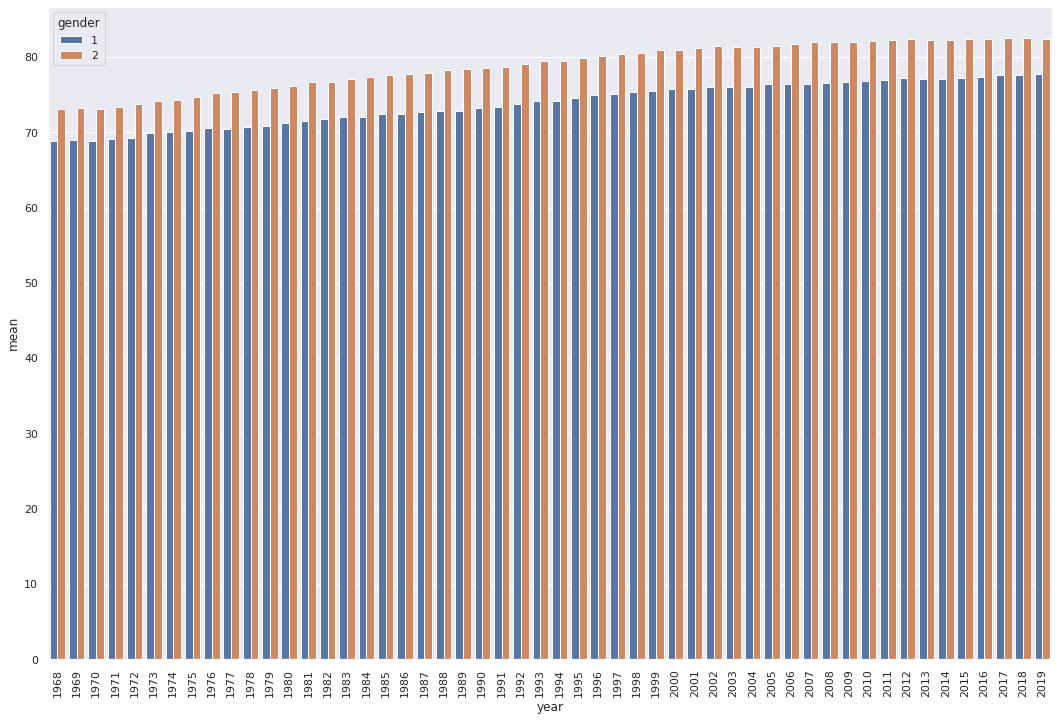

In [615]:
fig,ax = plt.subplots(figsize=(18,12))
sns.barplot(x='year',y='mean',hue='gender',data=unstacked_gender_stats,ax=ax)
_=plt.xticks(rotation=90)

In [616]:
common_stats = gender_groups.groupby('year').agg(['median','mean','count'])
common_stats

median       mean  count
year                          
1968      75  70.807346  82464
1969      75  70.968262  83338
1970      75  70.832833  80016
1971      75  71.058211  82734
1972      75  71.341689  84056
1973      75  71.815413  85640
1974      75  71.968754  86316
1975      76  72.232054  88208
1976      76  72.649713  90677
1977      76  72.642755  88200
1978      76  72.925636  89681
1979      76  73.127336  91074
1980      77  73.484286  91797
1981      77  73.905013  92034
1982      77  73.991574  90670
1983      77  74.338264  90790
1984      77  74.501868  90482
1985      78  74.867907  94032
1986      78  74.995241  93295
1987      78  75.145982  93306
1988      79  75.451953  96738
1989      79  75.537494  92109
1990      79  75.847868  95161
1991      79  75.956008  95200
1992      80  76.354947  94710
1993      80  76.825621  97007
1994      80  76.751002  91844
1995      80  77.201948  93955
1996      81  77.590579  94133
1997      81  77.782354  93326
1998      81  77.957179  93271
1999      81  78.295304  94726
2000      81  78.388579  93461
2001      82  78.526442  93752
2002      82  78.836805  95009
2003      82  78.778628  92961
2004      82  78.800148  90532
2005      82  79.006848  91710
2006      83  79.135506  91177
2007      83  79.334017  91729
2008      83  79.404193  91449
2009      83  79.406516  90080
2010      83  79.561296  90487
2011      83  79.714526  89938
2012      83  79.917705  91938
2013      83  79.779297  90402
2014      83  79.776659  88976
2015      83  79.905090  90907
2016      83  79.938548  90982
2017      83  80.124418  91972
2018      83  80.073808  92185
2019      83  80.095791  88766

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


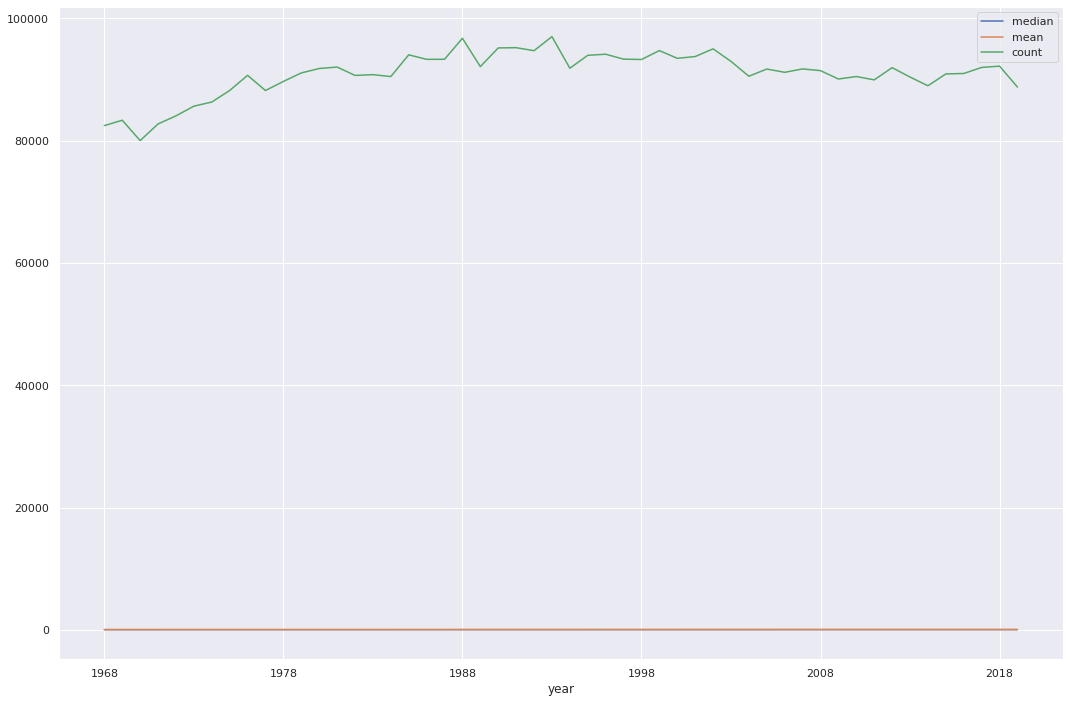

In [617]:
ax = common_stats.plot(figsize=(18,12))

#flats.plot(ax=ax)

In [618]:
yearly_deaths = yearly_deaths.set_index('year')
yearly_deaths

age  dead
year           
1968    0  1349
1968    1   169
1968    2    79
1968    3    62
1968    4    50
...   ...   ...
2019   96  1760
2019   97  1324
2019   98  1160
2019   99   868
2019  100  1253

[5252 rows x 2 columns]

In [619]:
#yearly_deaths.drop('years_lived',axis=1,inplace=True)

In [620]:
#yearly_deaths['age_num'] = yearly_deaths.index.get_level_values(1)
#yearly_deaths

<AxesSubplot:ylabel='Frequency'>

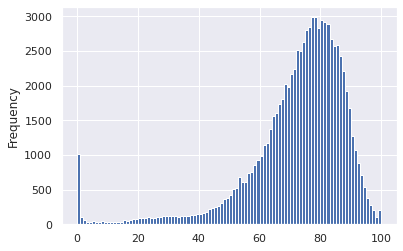

In [621]:
freq_1973 = yearly_deaths.loc['1973']
serialized_1973 = freq_1973.groupby('age',group_keys=False).apply(lambda row : np.repeat(row.age,row.dead))
serialized_1973.plot(kind='hist',bins=range(0,101))


In [622]:
# 1973 has max freq shared by 77 & 78 years, dual mode
serialized_1973.mode()

0    77
1    78
dtype: int64

In [623]:
serialized_yearly_deaths = yearly_deaths.groupby(
    'year',group_keys=False).apply(lambda row : np.repeat(row.age,row.dead))

print (serialized_yearly_deaths)

death_stats = serialized_yearly_deaths.groupby('year').agg(['mean','median','count'])
death_stats

year
1968      0
1968      0
1968      0
1968      0
1968      0
       ... 
2019    100
2019    100
2019    100
2019    100
2019    100
Name: age, Length: 4729403, dtype: int64


mean  median  count
year                          
1968  70.807346      75  82464
1969  70.968262      75  83338
1970  70.832833      75  80016
1971  71.058211      75  82734
1972  71.341689      75  84056
1973  71.815413      75  85640
1974  71.968754      75  86316
1975  72.232054      76  88208
1976  72.649713      76  90677
1977  72.642755      76  88200
1978  72.925636      76  89681
1979  73.127336      76  91074
1980  73.484286      77  91797
1981  73.905013      77  92034
1982  73.991574      77  90670
1983  74.338264      77  90790
1984  74.501868      77  90482
1985  74.867907      78  94032
1986  74.995241      78  93295
1987  75.145982      78  93306
1988  75.451953      79  96738
1989  75.537494      79  92109
1990  75.847868      79  95161
1991  75.956008      79  95200
1992  76.354947      80  94710
1993  76.825621      80  97007
1994  76.751002      80  91844
1995  77.201948      80  93955
1996  77.590579      81  94133
1997  77.782354      81  93326
1998  77.957179      81  93271
1999  78.295304      81  94726
2000  78.388579      81  93461
2001  78.526442      82  93752
2002  78.836805      82  95009
2003  78.778628      82  92961
2004  78.800148      82  90532
2005  79.006848      82  91710
2006  79.135506      83  91177
2007  79.334017      83  91729
2008  79.404193      83  91449
2009  79.406516      83  90080
2010  79.561296      83  90487
2011  79.714526      83  89938
2012  79.917705      83  91938
2013  79.779297      83  90402
2014  79.776659      83  88976
2015  79.905090      83  90907
2016  79.938548      83  90982
2017  80.124418      83  91972
2018  80.073808      83  92185
2019  80.095791      83  88766

In [624]:
# since 1973 has dual mode, we take the last (highest) value

death_mode = serialized_yearly_deaths.groupby('year').apply(lambda row : row.mode().iloc[-1])

death_mode



year
1968    80
1969    81
1970    77
1971    80
1972    77
1973    78
1974    79
1975    80
1976    81
1977    79
1978    78
1979    79
1980    79
1981    80
1982    80
1983    82
1984    82
1985    83
1986    82
1987    80
1988    80
1989    84
1990    81
1991    82
1992    83
1993    84
1994    84
1995    85
1996    85
1997    85
1998    85
1999    87
2000    87
2001    81
2002    82
2003    83
2004    84
2005    85
2006    86
2007    87
2008    88
2009    89
2010    89
2011    88
2012    89
2013    89
2014    88
2015    87
2016    88
2017    89
2018    90
2019    89
Name: age, dtype: int64

In [625]:
death_stats['mode'] = death_mode
death_stats

mean  median  count  mode
year                                
1968  70.807346      75  82464    80
1969  70.968262      75  83338    81
1970  70.832833      75  80016    77
1971  71.058211      75  82734    80
1972  71.341689      75  84056    77
1973  71.815413      75  85640    78
1974  71.968754      75  86316    79
1975  72.232054      76  88208    80
1976  72.649713      76  90677    81
1977  72.642755      76  88200    79
1978  72.925636      76  89681    78
1979  73.127336      76  91074    79
1980  73.484286      77  91797    79
1981  73.905013      77  92034    80
1982  73.991574      77  90670    80
1983  74.338264      77  90790    82
1984  74.501868      77  90482    82
1985  74.867907      78  94032    83
1986  74.995241      78  93295    82
1987  75.145982      78  93306    80
1988  75.451953      79  96738    80
1989  75.537494      79  92109    84
1990  75.847868      79  95161    81
1991  75.956008      79  95200    82
1992  76.354947      80  94710    83
1993  76.825621      80  97007    84
1994  76.751002      80  91844    84
1995  77.201948      80  93955    85
1996  77.590579      81  94133    85
1997  77.782354      81  93326    85
1998  77.957179      81  93271    85
1999  78.295304      81  94726    87
2000  78.388579      81  93461    87
2001  78.526442      82  93752    81
2002  78.836805      82  95009    82
2003  78.778628      82  92961    83
2004  78.800148      82  90532    84
2005  79.006848      82  91710    85
2006  79.135506      83  91177    86
2007  79.334017      83  91729    87
2008  79.404193      83  91449    88
2009  79.406516      83  90080    89
2010  79.561296      83  90487    89
2011  79.714526      83  89938    88
2012  79.917705      83  91938    89
2013  79.779297      83  90402    89
2014  79.776659      83  88976    88
2015  79.905090      83  90907    87
2016  79.938548      83  90982    88
2017  80.124418      83  91972    89
2018  80.073808      83  92185    90
2019  80.095791      83  88766    89

In [626]:
excel = pd.ExcelFile('fhm_excel.xlsx')
excel.sheet_names

['Antal per dag region',
 'Antal avlidna per dag',
 'Antal intensivvårdade per dag',
 'Totalt antal per region',
 'Totalt antal per kön',
 'Totalt antal per åldersgrupp',
 'Veckodata Region',
 'Veckodata Kommun_stadsdel',
 'FOHM  8 Jan 2021']

In [627]:
age_df = excel.parse('Totalt antal per åldersgrupp')
age_df = age_df[:-1]
age_grp_median = np.arange(5,100,10)
age_df['age_num'] = age_grp_median
age_df


Åldersgrupp  Totalt_antal_fall  Totalt_antal_intensivvårdade  \
0      Ålder_0_9               6185                            16   
1    Ålder_10_19              49052                            30   
2    Ålder_20_29              86436                           133   
3    Ålder_30_39              85594                           171   
4    Ålder_40_49              89230                           423   
5    Ålder_50_59              82010                           980   
6    Ålder_60_69              43381                          1252   
7    Ålder_70_79              21648                          1031   
8    Ålder_80_89              17319                           272   
9  Ålder_90_plus               8564                             6   

   Totalt_antal_avlidna  age_num  
0                     5        5  
1                     3       15  
2                    13       25  
3                    27       35  
4                    67       45  
5                   206       55  
6                   556       65  
7                  1979       75  
8                  3976       85  
9                  2601       95

In [628]:
fhm_dead_serialized = age_df.groupby('Åldersgrupp').apply(
    lambda row : np.repeat(row['age_num'],row['Totalt_antal_avlidna']))

fhm_dead_serialized = fhm_dead_serialized.droplevel(1)
fhm_dead_serialized

Åldersgrupp
Ålder_0_9         5
Ålder_0_9         5
Ålder_0_9         5
Ålder_0_9         5
Ålder_0_9         5
                 ..
Ålder_90_plus    95
Ålder_90_plus    95
Ålder_90_plus    95
Ålder_90_plus    95
Ålder_90_plus    95
Name: age_num, Length: 9433, dtype: int64

In [629]:
fhm_dead_mode = fhm_dead_serialized.mode()
fhm_dead_mode

0    85
dtype: int64

In [630]:
fhm_dead_stats = fhm_dead_serialized.agg(['mean','median','count'])
fhm_dead_stats

mean        83.250822
median      85.000000
count     9433.000000
Name: age_num, dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


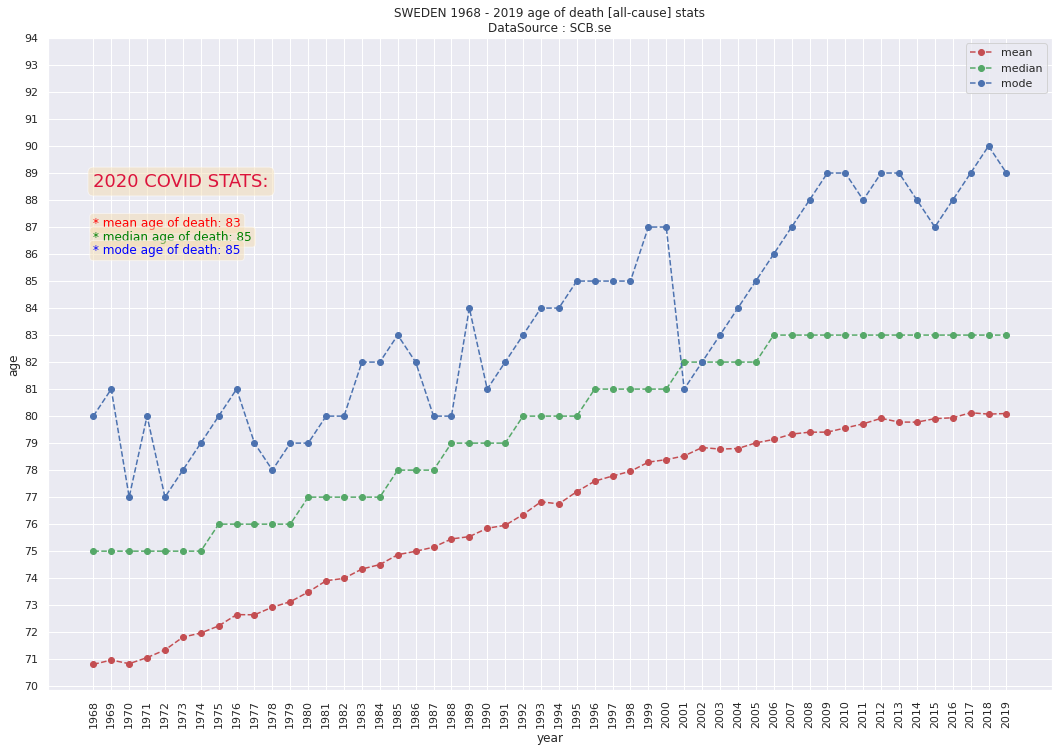

In [631]:
colors = ['red','green','blue']

ax = death_stats.plot(figsize=(18,12),style=['ro--','go--','bo--'],y=['mean','median','mode'],
                 title='SWEDEN 1968 - 2019 age of death [all-cause] stats\nDataSource : SCB.se')


xtick_pos = plt.xticks()
xtick_pos[0]

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)



plt.text(0,88.5,'2020 COVID STATS:',color='crimson',size=18,bbox=props)
plt.text(0,87,'* mean age of death: {:.0f}'.format(fhm_dead_stats['mean']),color='red',bbox = props)
plt.text(0,86.5,'* median age of death: {:.0f}'.format(fhm_dead_stats['median']),color='green',bbox=props)
plt.text(0,86,'* mode age of death: {:.0f}'.format(fhm_dead_mode.iloc[0]),color='blue',bbox=props)

plt.ylabel('age')

plt.yticks(range(70,95,1))
_= plt.xticks(range(len(death_stats)),death_stats.index,rotation=90)

plt.savefig('swe_median_mean_mode_age_of_death_cmp_covid.jpg',format='jpg')

In [632]:
all_dead

dead  cum_dead  age_col
year age                         
1968 0    1349      1349        0
     1     169      1518        1
     2      79      1597        2
     3      62      1659        3
     4      50      1709        4
...        ...       ...      ...
2019 96   1760     84161       96
     97   1324     85485       97
     98   1160     86645       98
     99    868     87513       99
     100  1253     88766      100

[5252 rows x 3 columns]

In [633]:
dead_2001 = all_dead.loc['2001']
dead_2000 = all_dead.loc['2000']
dead_2001

dead  cum_dead  age_col
age                         
0     291       291        0
1      60       351        1
2      20       371        2
3      14       385        3
4      10       395        4
..    ...       ...      ...
96   1086     91230       96
97    827     92057       97
98    615     92672       98
99    390     93062       99
100   690     93752      100

[101 rows x 3 columns]

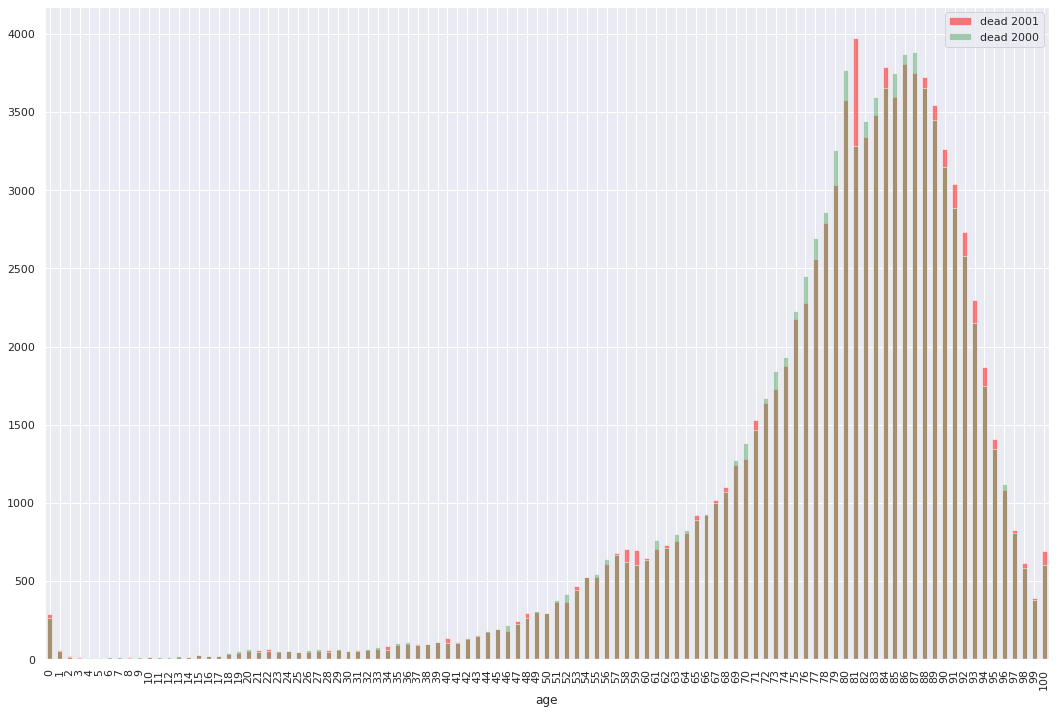

In [634]:
ax = dead_2001.plot(kind='bar',figsize=(18,12),y='dead',color='red',alpha=0.5)
dead_2000.plot(kind='bar',y='dead',ax=ax,color='g',alpha=0.5)
plt.legend(['dead 2001','dead 2000'])

Text(0, 0.5, 'nr deaths')

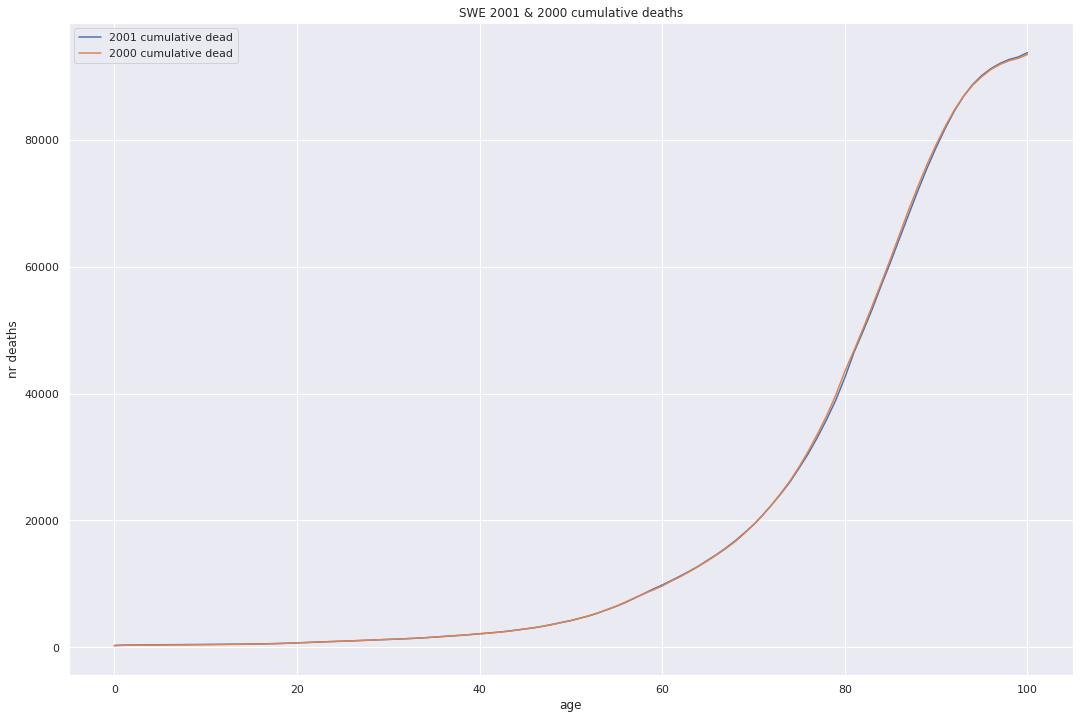

In [635]:
ax = dead_2001['cum_dead'].plot(figsize=(18,12),title='SWE 2001 & 2000 cumulative deaths')
dead_2000['cum_dead'].plot(ax=ax)
plt.legend(['2001 cumulative dead','2000 cumulative dead'])
plt.ylabel('nr deaths')

In [636]:
unstacked_gender_stats


year gender  median       mean  count
0    1968      1      73  68.863281  44200
1    1968      2      77  73.053000  38264
2    1969      1      73  69.052110  45039
3    1969      2      77  73.221625  38299
4    1970      1      73  68.919625  43409
..    ...    ...     ...        ...    ...
99   2017      2      86  82.532855  47116
100  2018      1      80  77.577109  45416
101  2018      2      86  82.498279  46769
102  2019      1      80  77.730500  44026
103  2019      2      85  82.423335  44740

[104 rows x 5 columns]

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


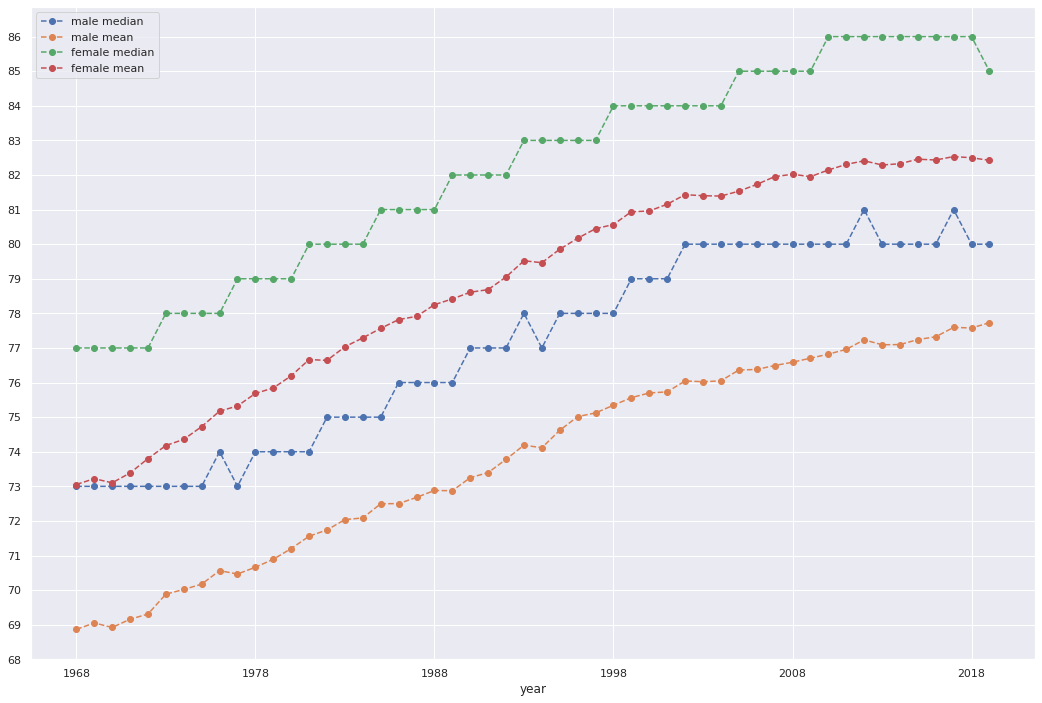

In [637]:
male = unstacked_gender_stats.loc[unstacked_gender_stats['gender'] == '1']
female = unstacked_gender_stats.loc[unstacked_gender_stats['gender'] == '2']

ax = male.plot(x='year',figsize=(18,12),style='o--',y=['median','mean'])
female.plot(ax=ax,x='year',style='o--',y=['median','mean'])

plt.yticks(range(68,87))
ax.legend(['male median','male mean','female median','female mean'])

In [638]:
pop_df

pop
year age          
1968 -4     597032
     5-9    531146
     10-14  530129
     15-19  564895
     20-24  665878
...            ...
2019 80-84  273050
     85-89  163629
     90-94   76644
     95-99   20776
     100+     2207

[1092 rows x 1 columns]

In [639]:
flat_pop = pop_df.unstack()
flat_pop = flat_pop.droplevel(0,axis=1)
flat_pop

age    -4      5-9     10-14   15-19   20-24   25-29   30-34   35-39   40-44  \
year                                                                           
1968  597032  531146  530129  564895  665878  552477  458109  450855  488911   
1969  586290  552093  532454  554702  665231  591561  475465  447840  478670   
1970  576611  575113  530305  551425  657940  633897  490115  444821  471902   
1971  566322  592510  527780  547449  632548  665881  502993  445331  464825   
1972  556143  604627  527802  542707  607365  678669  524335  447024  459240   
1973  549591  603028  535229  537206  585424  679860  552347  456973  448689   
1974  552598  587735  552802  537510  568530  670662  586392  470990  443588   
1975  549137  574712  573550  533552  561234  655126  624410  482459  438653   
1976  536562  566708  591760  531362  561524  634777  658058  495691  439477   
1977  522387  558950  606098  532728  561092  618345  677094  520133  442935   
1978  505702  555839  606111  540946  557606  602341  682878  550614  454174   
1979  491129  559303  590914  558890  558250  587383  675298  585145  468399   
1980  483836  554348  577167  579130  553928  579451  659898  622378  479249   
1981  478764  539616  567615  595571  548732  576752  637820  655065  491864   
1982  475018  523062  558229  608087  546195  572723  618799  672274  515404   
1983  473365  505855  554708  607423  551500  566347  601570  677076  545377   
1984  471501  491474  558154  592192  568271  564996  585933  669269  579462   
1985  473514  484731  553756  578733  588153  559911  578231  654310  616782   
1986  482438  481000  540278  570039  606281  556630  577413  633480  649584   
1987  495227  479649  525808  561969  620412  558382  576281  616369  667448   
1988  516289  481250  510549  560356  622595  568863  574337  601929  673850   
1989  539767  483200  498879  566471  612508  592051  577843  590076  667833   
1990  565965  487844  494393  563296  600985  615525  576950  585299  654890   
1991  586698  497932  492495  550200  591351  634718  575758  586710  635298   
1992  603584  510332  492058  536057  581888  648114  578064  586314  618403   
1993  608613  532015  494890  522146  579466  649533  589279  585391  604798   
1994  605711  557977  498977  512229  585109  636698  611780  589654  593926   
1995  582319  581184  501859  506750  580171  620877  630745  586388  587929   
1996  551490  599413  510522  503473  565649  609045  646933  583167  588796   
1997  518532  613504  522416  502625  549462  597992  658337  584485  588035   
1998  491356  614869  542237  504015  533317  592883  657571  593246  585567   
1999  468716  608010  562975  504692  520371  595159  641382  611618  586363   
2000  457850  585912  587036  508580  516722  592158  627790  632088  584563   
2001  455767  557400  607108  519061  515633  580920  619124  651076  583214   
2002  462499  527036  622390  532226  517004  568748  611611  664918  586350   
2003  472886  501599  624505  553300  520017  555951  609103  665896  596567   
2004  485558  479919  618104  574697  522312  545719  612637  651152  615765   
2005  496345  468687  595744  598380  527268  544061  610276  638015  636164   
2006  512583  468021  568983  619722  541577  547734  602045  631447  656262   
2007  525305  476238  540190  637028  557526  554452  593201  626492  671687   
2008  536982  488735  516685  641408  580335  562889  585237  626711  674250   
2009  548222  503934  497286  638533  605453  571759  580069  634498  663060   
2010  561788  515657  487514  618605  632016  581923  581869  633882  652226   
2011  567369  530937  485964  592376  650862  595136  585111  625948  645713   
2012  573583  543993  494283  564627  667153  609060  591487  616777  640696   
2013  579019  557950  509132  543627  671940  631255  599989  608912  641199   
2014  584157  571614  526262  527236  671529  655755  609378  604368  650114   
2015  586218  589118  541807  522472  656448  682413  619071  608570  651944   


In [640]:
age_grp_y2y_growth = flat_pop / flat_pop.shift()
age_grp_y2y_growth

age      -4        5-9       10-14     15-19     20-24     25-29     30-34  \
year                                                                         
1968       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1969  0.982008  1.039437  1.004386  0.981956  0.999028  1.070743  1.037886   
1970  0.983491  1.041696  0.995964  0.994092  0.989040  1.071567  1.030812   
1971  0.982156  1.030250  0.995239  0.992790  0.961407  1.050456  1.026275   
1972  0.982026  1.020450  1.000042  0.991338  0.960188  1.019205  1.042430   
1973  0.988219  0.997355  1.014072  0.989864  0.963875  1.001755  1.053424   
1974  1.005471  0.974640  1.032833  1.000566  0.971142  0.986471  1.061637   
1975  0.993737  0.977842  1.037532  0.992636  0.987167  0.976835  1.064834   
1976  0.977100  0.986073  1.031750  0.995895  1.000517  0.968939  1.053888   
1977  0.973582  0.986310  1.024229  1.002571  0.999231  0.974114  1.028928   
1978  0.968060  0.994434  1.000021  1.015426  0.993787  0.974118  1.008542   
1979  0.971183  1.006232  0.974927  1.033172  1.001155  0.975167  0.988900   
1980  0.985151  0.991141  0.976736  1.036215  0.992258  0.986496  0.977195   
1981  0.989517  0.973425  0.983450  1.028389  0.990620  0.995342  0.966543   
1982  0.992176  0.969323  0.983464  1.021015  0.995377  0.993014  0.970178   
1983  0.996520  0.967103  0.993693  0.998908  1.009713  0.988867  0.972157   
1984  0.996062  0.971571  1.006212  0.974925  1.030410  0.997615  0.974006   
1985  1.004269  0.986280  0.992120  0.977273  1.034987  0.991000  0.986855   
1986  1.018846  0.992303  0.975661  0.984978  1.030822  0.994140  0.998585   
1987  1.026509  0.997191  0.973217  0.985843  1.023308  1.003148  0.998040   
1988  1.042530  1.003338  0.970980  0.997130  1.003519  1.018770  0.996627   
1989  1.045475  1.004052  0.977142  1.010913  0.983798  1.040762  1.006104   
1990  1.048536  1.009611  0.991008  0.994395  0.981187  1.039649  0.998455   
1991  1.036633  1.020679  0.996161  0.976751  0.983970  1.031182  0.997934   
1992  1.028781  1.024903  0.999113  0.974295  0.983998  1.021105  1.004005   
1993  1.008332  1.042488  1.005755  0.974049  0.995838  1.002189  1.019401   
1994  0.995232  1.048799  1.008258  0.981007  1.009738  0.980240  1.038184   
1995  0.961381  1.041591  1.005776  0.989304  0.991561  0.975151  1.031000   
1996  0.947058  1.031365  1.017262  0.993533  0.974969  0.980943  1.025665   
1997  0.940238  1.023508  1.023298  0.998316  0.971383  0.981852  1.017628   
1998  0.947591  1.002225  1.037941  1.002765  0.970617  0.991456  0.998836   
1999  0.953923  0.988845  1.038245  1.001343  0.975726  1.003839  0.975381   
2000  0.976818  0.963655  1.042739  1.007704  0.992988  0.994958  0.978808   
2001  0.995450  0.951337  1.034192  1.020608  0.997892  0.981022  0.986196   
2002  1.014771  0.945526  1.025172  1.025363  1.002659  0.979047  0.987865   
2003  1.022458  0.951736  1.003398  1.039596  1.005828  0.977500  0.995899   
2004  1.026797  0.956778  0.989750  1.038672  1.004413  0.981596  1.005802   
2005  1.022216  0.976596  0.963825  1.041210  1.009489  0.996962  0.996146   
2006  1.032715  0.998579  0.955080  1.035666  1.027138  1.006751  0.986513   
2007  1.024819  1.017557  0.949396  1.027925  1.029449  1.012265  0.985310   
2008  1.022229  1.026241  0.956488  1.006876  1.040911  1.015217  0.986575   
2009  1.020932  1.031099  0.962455  0.995518  1.043282  1.015758  0.991169   
2010  1.024745  1.023263  0.980349  0.968791  1.043873  1.017777  1.003103   
2011  1.009934  1.029632  0.996821  0.957600  1.029819  1.022706  1.005572   
2012  1.010952  1.024590  1.017119  0.953156  1.025030  1.023396  1.010897   
2013  1.009477  1.025657  1.030041  0.962807  1.007175  1.036441  1.014374   
2014  1.008874  1.024490  1.033645  0.969849  0.999388  1.038812  1.015649   
2015  1.003528  1.030622  1.029539  0.990964  0.977542  1.040652  1.015906   
2016  1.018462  1.019920  1.039300  1.013666  0.975217  1.042898  1.035707   
2017  1.008380  1.0188

In [641]:
growth_stats = age_grp_y2y_growth.agg(['min','max','mean','argmin','argmax'],axis=1)
growth_stats

min       max      mean  argmin  argmax
1968       NaN       NaN       NaN    -1.0    -1.0
1969  0.979053  1.104129  1.021081     8.0    19.0
1970  0.960937  1.144144  1.025010     9.0    20.0
1971  0.961407  1.121594  1.021536     4.0    19.0
1972  0.960188  1.091549  1.012690     4.0    20.0
1973  0.963875  1.116129  1.017821     4.0    20.0
1974  0.971142  1.225434  1.024872     4.0    20.0
1975  0.959216  1.064834  1.011186    10.0     6.0
1976  0.964676  1.057692  1.010413    10.0    20.0
1977  0.973582  1.190909  1.021302     0.0    20.0
1978  0.968060  1.099237  1.016521     0.0    20.0
1979  0.971183  1.098924  1.015167     0.0    19.0
1980  0.959173  1.063630  1.010387    11.0     7.0
1981  0.965246  1.075000  1.012137    11.0    20.0
1982  0.969323  1.101744  1.014216     1.0    20.0
1983  0.967103  1.084433  1.011168     1.0    20.0
1984  0.971571  1.104623  1.014326     1.0    20.0
1985  0.960391  1.064405  1.010518    12.0     8.0
1986  0.966390  1.090147  1.014171    12.0    20.0
1987  0.972989  1.113462  1.015407     7.0    20.0
1988  0.970980  1.059960  1.008233     2.0     9.0
1989  0.977142  1.064856  1.014776     2.0     9.0
1990  0.963379  1.065426  1.014488    13.0     9.0
1991  0.967815  1.058749  1.012393    13.0    19.0
1992  0.973406  1.059486  1.013147     8.0    20.0
1993  0.974049  1.059617  1.011425     3.0    10.0
1994  0.980240  1.064935  1.015236     5.0    10.0
1995  0.961381  1.114525  1.015129     0.0    20.0
1996  0.947058  1.053052  1.006154     0.0    10.0
1997  0.940238  1.105927  1.010754     0.0    20.0
1998  0.947591  1.081879  1.008954     0.0    19.0
1999  0.953923  1.063296  1.005762     0.0    11.0
2000  0.963655  1.081878  1.010322     1.0    20.0
2001  0.951337  1.058567  1.009268     1.0    19.0
2002  0.945526  1.084534  1.009697     1.0    20.0
2003  0.951736  1.062888  1.009663     1.0    20.0
2004  0.956778  1.065000  1.011403     1.0    20.0
2005  0.963825  1.069973  1.010386     2.0    17.0
2006  0.955080  1.055064  1.011684     2.0    12.0
2007  0.949396  1.050703  1.010955     2.0    13.0
2008  0.956488  1.060145  1.012093     2.0    13.0
2009  0.962455  1.066282  1.013476     2.0    13.0
2010  0.968791  1.086066  1.011704     3.0    18.0
2011  0.957600  1.066908  1.012531     3.0    20.0
2012  0.953156  1.052714  1.009941     3.0    14.0
2013  0.962807  1.062086  1.011175     3.0    14.0
2014  0.969849  1.067792  1.014331     3.0    14.0
2015  0.970814  1.116665  1.013531    20.0    19.0
2016  0.973401  1.060691  1.017768    13.0    19.0
2017  0.963666  1.055535  1.014235     4.0    15.0
2018  0.968673  1.063779  1.011382     4.0    15.0
2019  0.983137  1.069839  1.015296    13.0    15.0

In [642]:
max_growth_grp = growth_stats['argmax'].apply(lambda x : age_grp_y2y_growth.columns[int(x)])
min_growth_grp = growth_stats['argmin'].apply(lambda x : age_grp_y2y_growth.columns[int(x)])
print (min_growth_grp)
print()

print(max_growth_grp)

1968     100+
1969    40-44
1970    45-49
1971    20-24
1972    20-24
1973    20-24
1974    20-24
1975    50-54
1976    50-54
1977       -4
1978       -4
1979       -4
1980    55-59
1981    55-59
1982      5-9
1983      5-9
1984      5-9
1985    60-64
1986    60-64
1987    35-39
1988    10-14
1989    10-14
1990    65-69
1991    65-69
1992    40-44
1993    15-19
1994    25-29
1995       -4
1996       -4
1997       -4
1998       -4
1999       -4
2000      5-9
2001      5-9
2002      5-9
2003      5-9
2004      5-9
2005    10-14
2006    10-14
2007    10-14
2008    10-14
2009    10-14
2010    15-19
2011    15-19
2012    15-19
2013    15-19
2014    15-19
2015     100+
2016    65-69
2017    20-24
2018    20-24
2019    65-69
Name: argmin, dtype: object

1968     100+
1969    95-99
1970     100+
1971    95-99
1972     100+
1973     100+
1974     100+
1975    30-34
1976     100+
1977     100+
1978     100+
1979    95-99
1980    35-39
1981     100+
1982     100+
1983     100+
1984     100+
1985 

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

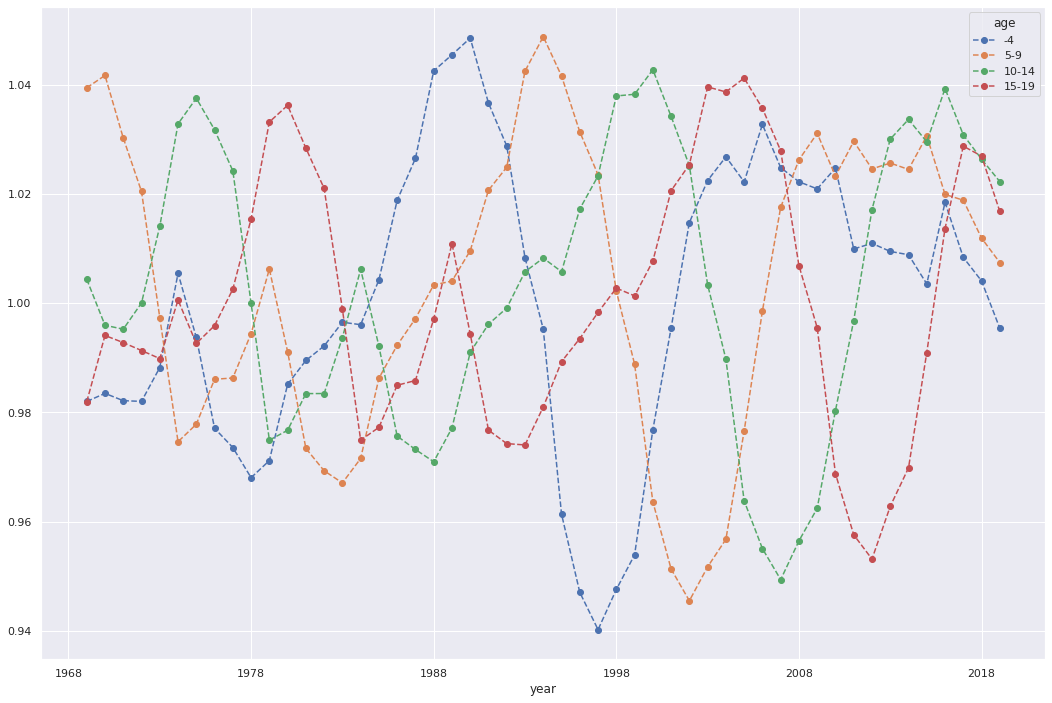

In [643]:
age_grp_y2y_growth.loc[:,'-4':'15-19'].plot(figsize=(18,12),style='o--')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

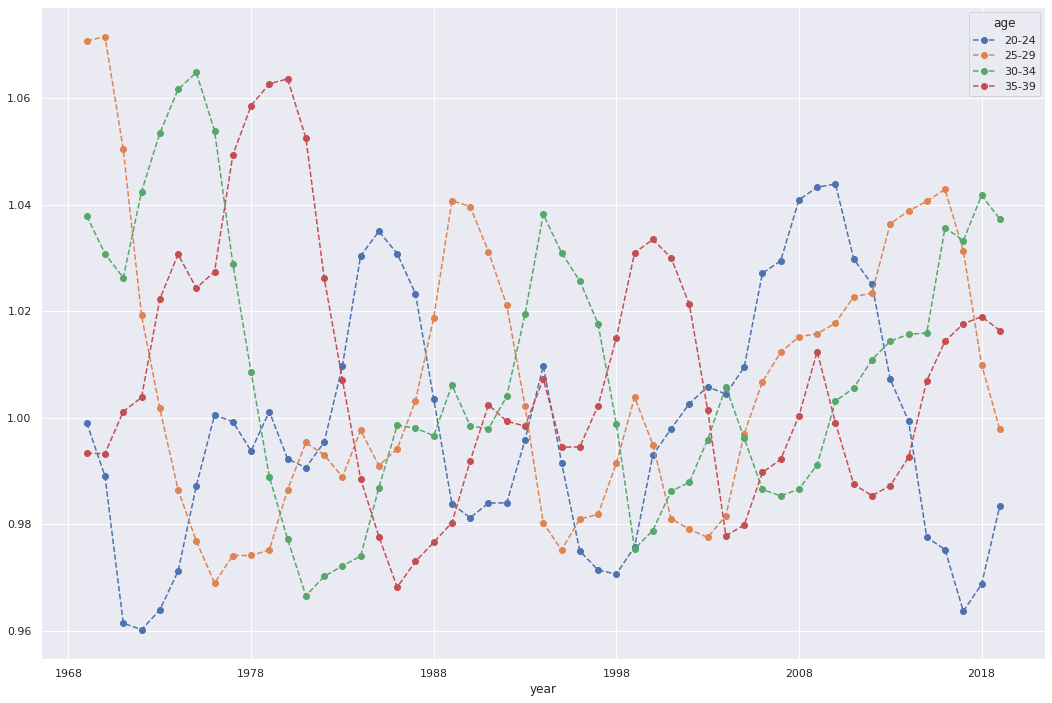

In [644]:
age_grp_y2y_growth.loc[:,'20-24' : '35-39'].plot(figsize=(18,12),style='o--')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

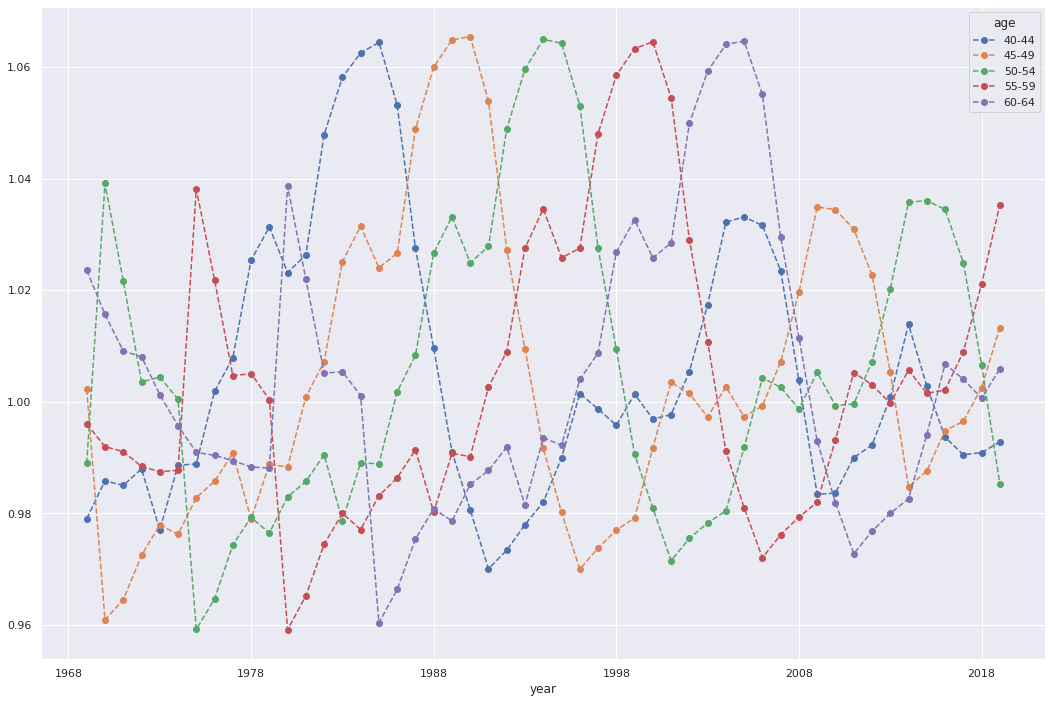

In [645]:
age_grp_y2y_growth.loc[:,'40-44' : '60-64'].plot(figsize=(18,12),style='o--')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

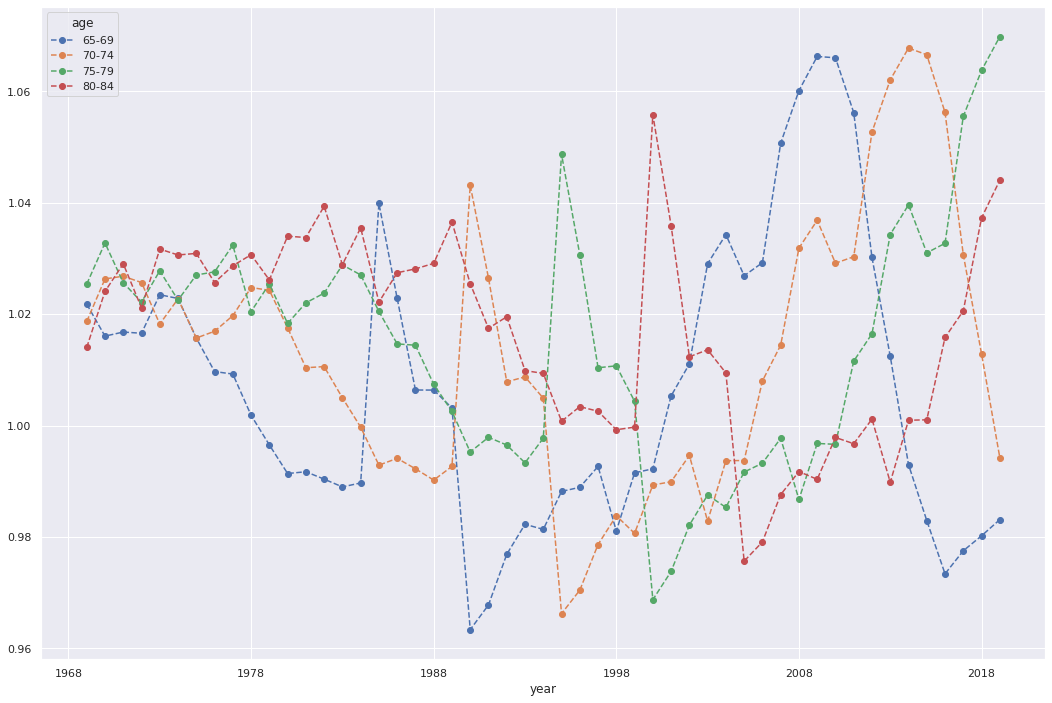

In [646]:
age_grp_y2y_growth.loc[:,'65-69' : '80-84'].plot(figsize=(18,12),style='o--')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

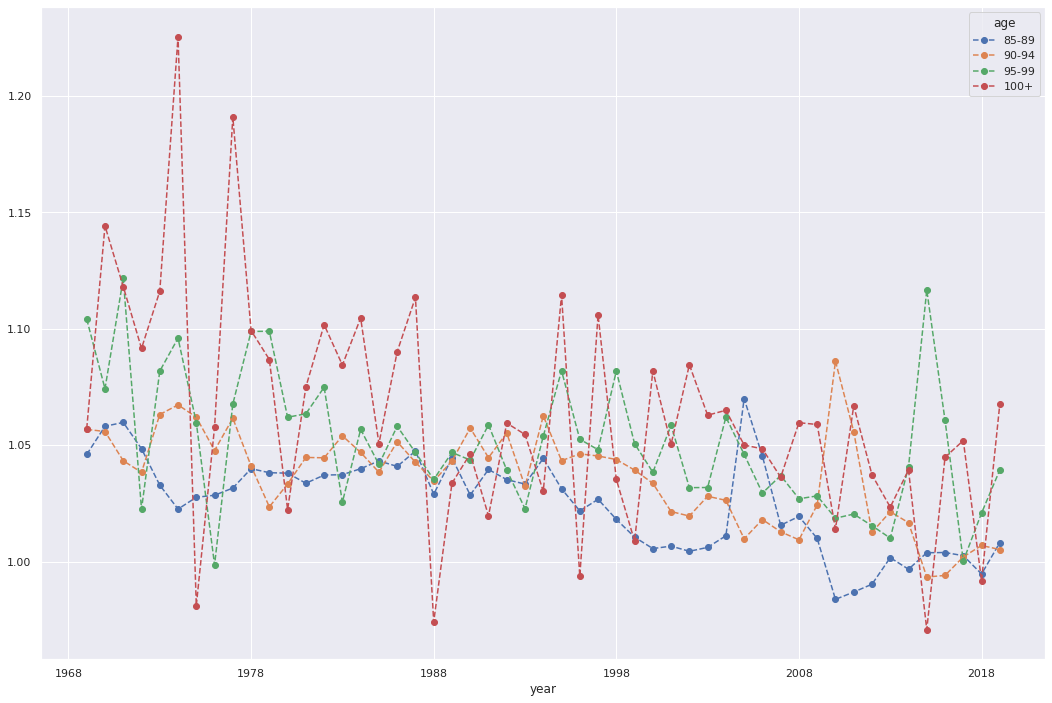

In [647]:
age_grp_y2y_growth.loc[:,'85-89': '100+'].plot(figsize=(18,12),style='o--')

In [648]:
age_grp_y2y_growth

age      -4        5-9       10-14     15-19     20-24     25-29     30-34  \
year                                                                         
1968       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1969  0.982008  1.039437  1.004386  0.981956  0.999028  1.070743  1.037886   
1970  0.983491  1.041696  0.995964  0.994092  0.989040  1.071567  1.030812   
1971  0.982156  1.030250  0.995239  0.992790  0.961407  1.050456  1.026275   
1972  0.982026  1.020450  1.000042  0.991338  0.960188  1.019205  1.042430   
1973  0.988219  0.997355  1.014072  0.989864  0.963875  1.001755  1.053424   
1974  1.005471  0.974640  1.032833  1.000566  0.971142  0.986471  1.061637   
1975  0.993737  0.977842  1.037532  0.992636  0.987167  0.976835  1.064834   
1976  0.977100  0.986073  1.031750  0.995895  1.000517  0.968939  1.053888   
1977  0.973582  0.986310  1.024229  1.002571  0.999231  0.974114  1.028928   
1978  0.968060  0.994434  1.000021  1.015426  0.993787  0.974118  1.008542   
1979  0.971183  1.006232  0.974927  1.033172  1.001155  0.975167  0.988900   
1980  0.985151  0.991141  0.976736  1.036215  0.992258  0.986496  0.977195   
1981  0.989517  0.973425  0.983450  1.028389  0.990620  0.995342  0.966543   
1982  0.992176  0.969323  0.983464  1.021015  0.995377  0.993014  0.970178   
1983  0.996520  0.967103  0.993693  0.998908  1.009713  0.988867  0.972157   
1984  0.996062  0.971571  1.006212  0.974925  1.030410  0.997615  0.974006   
1985  1.004269  0.986280  0.992120  0.977273  1.034987  0.991000  0.986855   
1986  1.018846  0.992303  0.975661  0.984978  1.030822  0.994140  0.998585   
1987  1.026509  0.997191  0.973217  0.985843  1.023308  1.003148  0.998040   
1988  1.042530  1.003338  0.970980  0.997130  1.003519  1.018770  0.996627   
1989  1.045475  1.004052  0.977142  1.010913  0.983798  1.040762  1.006104   
1990  1.048536  1.009611  0.991008  0.994395  0.981187  1.039649  0.998455   
1991  1.036633  1.020679  0.996161  0.976751  0.983970  1.031182  0.997934   
1992  1.028781  1.024903  0.999113  0.974295  0.983998  1.021105  1.004005   
1993  1.008332  1.042488  1.005755  0.974049  0.995838  1.002189  1.019401   
1994  0.995232  1.048799  1.008258  0.981007  1.009738  0.980240  1.038184   
1995  0.961381  1.041591  1.005776  0.989304  0.991561  0.975151  1.031000   
1996  0.947058  1.031365  1.017262  0.993533  0.974969  0.980943  1.025665   
1997  0.940238  1.023508  1.023298  0.998316  0.971383  0.981852  1.017628   
1998  0.947591  1.002225  1.037941  1.002765  0.970617  0.991456  0.998836   
1999  0.953923  0.988845  1.038245  1.001343  0.975726  1.003839  0.975381   
2000  0.976818  0.963655  1.042739  1.007704  0.992988  0.994958  0.978808   
2001  0.995450  0.951337  1.034192  1.020608  0.997892  0.981022  0.986196   
2002  1.014771  0.945526  1.025172  1.025363  1.002659  0.979047  0.987865   
2003  1.022458  0.951736  1.003398  1.039596  1.005828  0.977500  0.995899   
2004  1.026797  0.956778  0.989750  1.038672  1.004413  0.981596  1.005802   
2005  1.022216  0.976596  0.963825  1.041210  1.009489  0.996962  0.996146   
2006  1.032715  0.998579  0.955080  1.035666  1.027138  1.006751  0.986513   
2007  1.024819  1.017557  0.949396  1.027925  1.029449  1.012265  0.985310   
2008  1.022229  1.026241  0.956488  1.006876  1.040911  1.015217  0.986575   
2009  1.020932  1.031099  0.962455  0.995518  1.043282  1.015758  0.991169   
2010  1.024745  1.023263  0.980349  0.968791  1.043873  1.017777  1.003103   
2011  1.009934  1.029632  0.996821  0.957600  1.029819  1.022706  1.005572   
2012  1.010952  1.024590  1.017119  0.953156  1.025030  1.023396  1.010897   
2013  1.009477  1.025657  1.030041  0.962807  1.007175  1.036441  1.014374   
2014  1.008874  1.024490  1.033645  0.969849  0.999388  1.038812  1.015649   
2015  1.003528  1.030622  1.029539  0.990964  0.977542  1.040652  1.015906   
2016  1.018462  1.019920  1.039300  1.013666  0.975217  1.042898  1.035707   
2017  1.008380  1.0188

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


year
1969    1.039437
1970    1.041696
1971    1.030250
1972    1.020450
1973    0.997355
1974    0.974640
1975    0.977842
1976    0.986073
1977    0.986310
1978    0.994434
1979    1.006232
1980    0.991141
1981    0.973425
1982    0.969323
1983    0.967103
1984    0.971571
1985    0.986280
1986    0.992303
1987    0.997191
1988    1.003338
1989    1.004052
1990    1.009611
1991    1.020679
1992    1.024903
1993    1.042488
1994    1.048799
1995    1.041591
1996    1.031365
1997    1.023508
1998    1.002225
1999    0.988845
2000    0.963655
2001    0.951337
2002    0.945526
2003    0.951736
2004    0.956778
2005    0.976596
2006    0.998579
2007    1.017557
2008    1.026241
2009    1.031099
2010    1.023263
2011    1.029632
2012    1.024590
2013    1.025657
2014    1.024490
2015    1.030622
2016    1.019920
2017    1.018852
2018    1.011913
2019    1.007443
Name: 5-9, dtype: float64

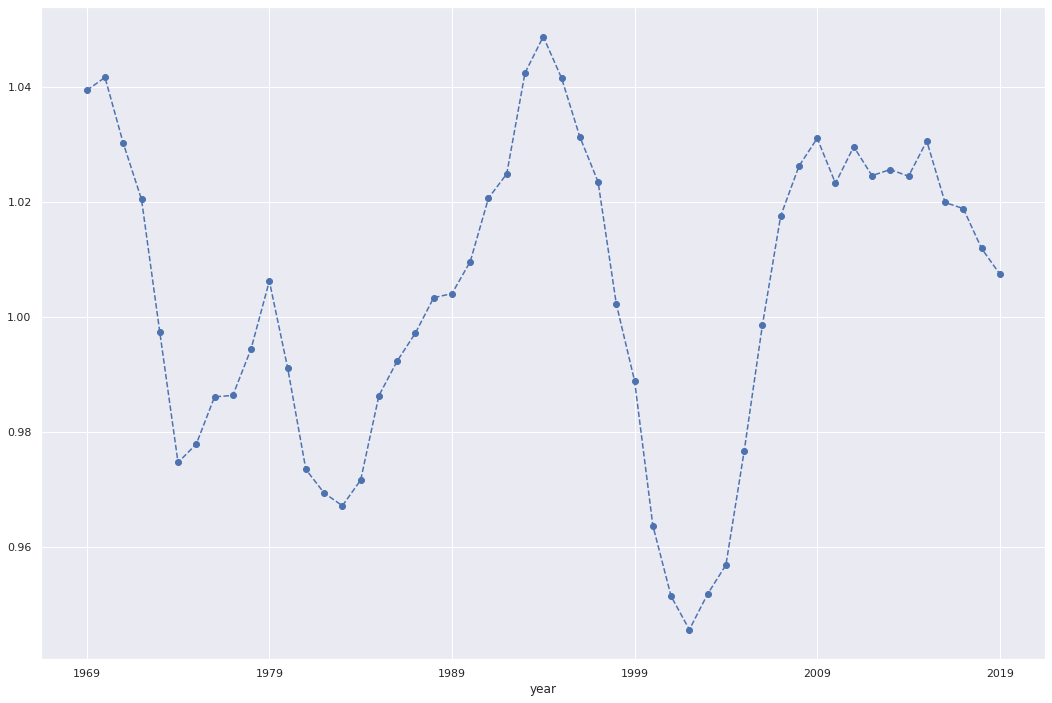

In [649]:
from scipy.fft import rfft,rfftfreq

age_grp = '5-9'

signal = age_grp_y2y_growth[age_grp]
signal = signal.dropna()

plt.figure(figsize=(18,12))
signal.plot(style='o--')
signal

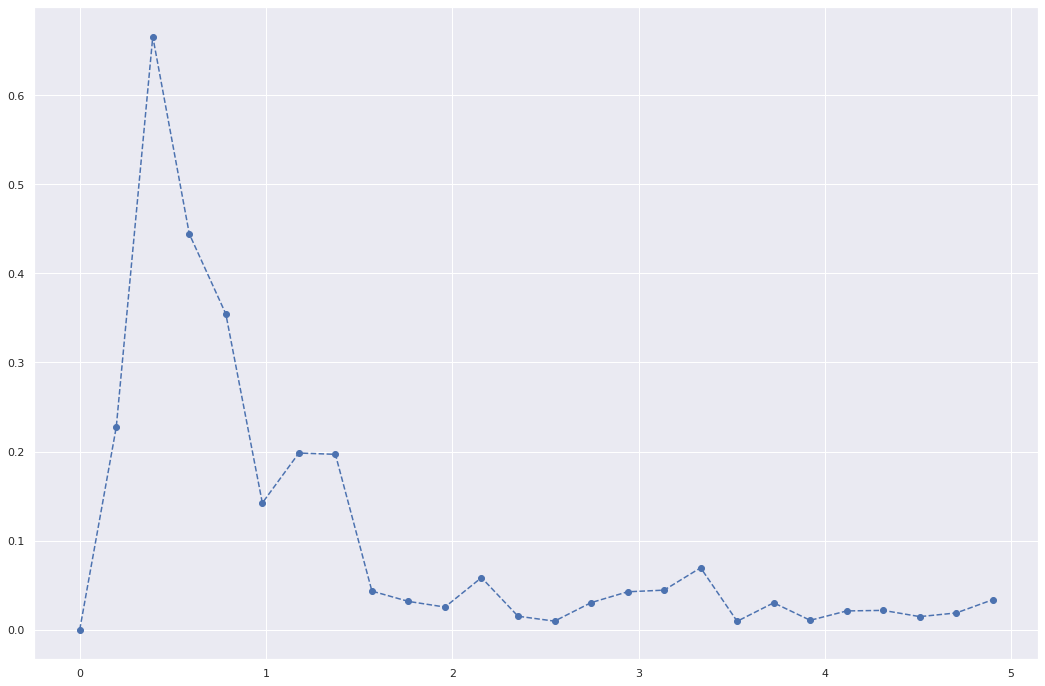

In [650]:
sample_rate = 10 # 10 samples per decade

signal = signal - signal.mean() #remove the DC component

yf = rfft(signal.values) 

xf = rfftfreq(len(signal),1 / sample_rate)

plt.figure(figsize=(18,12))

plt.plot(xf,np.abs(yf),'o--')
#_= plt.xticks(range(len(xf)))

In [651]:
def plot_signal_period(signal,age_grp,param='population'):
    
    fig,axes = plt.subplots(2,1,figsize=(18,12))
    
    signal = signal.dropna()

    axes[0].plot(signal,'o--')
    axes[0].set_xticklabels(signal.index.values,rotation=90)
    axes[0].set_xlabel('year')
    axes[0].set_ylabel('growth factor')
    axes[0].set_title('SWEDEN {} Y2Y growth factor for age group {}'.format(param,age_grp))
    
    ### FFT 
    sample_rate = 10 # 10 samples per decade

    signal = signal - signal.mean() #remove the DC component

    yf = rfft(signal.values) 

    xf = rfftfreq(len(signal),1 / sample_rate)

    axes[1].plot(xf,np.abs(yf),'o--')
    axes[1].set_xlabel('Frequency [1 / Decade]')
    axes[1].set_ylabel('Power')
    axes[1].set_title('Frequency Spectrum for age group {} {} growth factor periodicity [1 / Decade]'.format(
        age_grp,param))
    
    plt.tight_layout()
    
    plt.savefig('fft_signal_freq_spectrum_{}_{}.jpg'.format(age_grp,param),format='jpg')

    

<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.

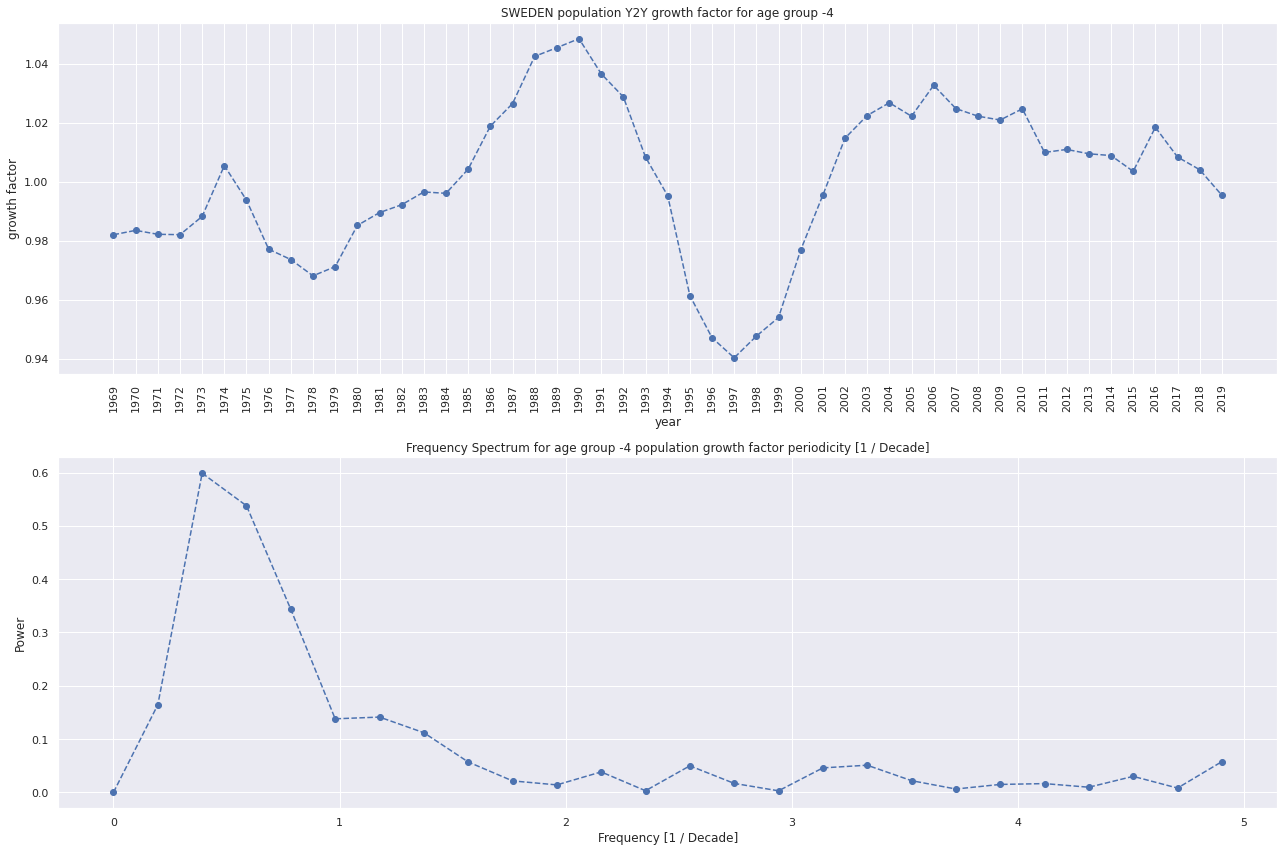

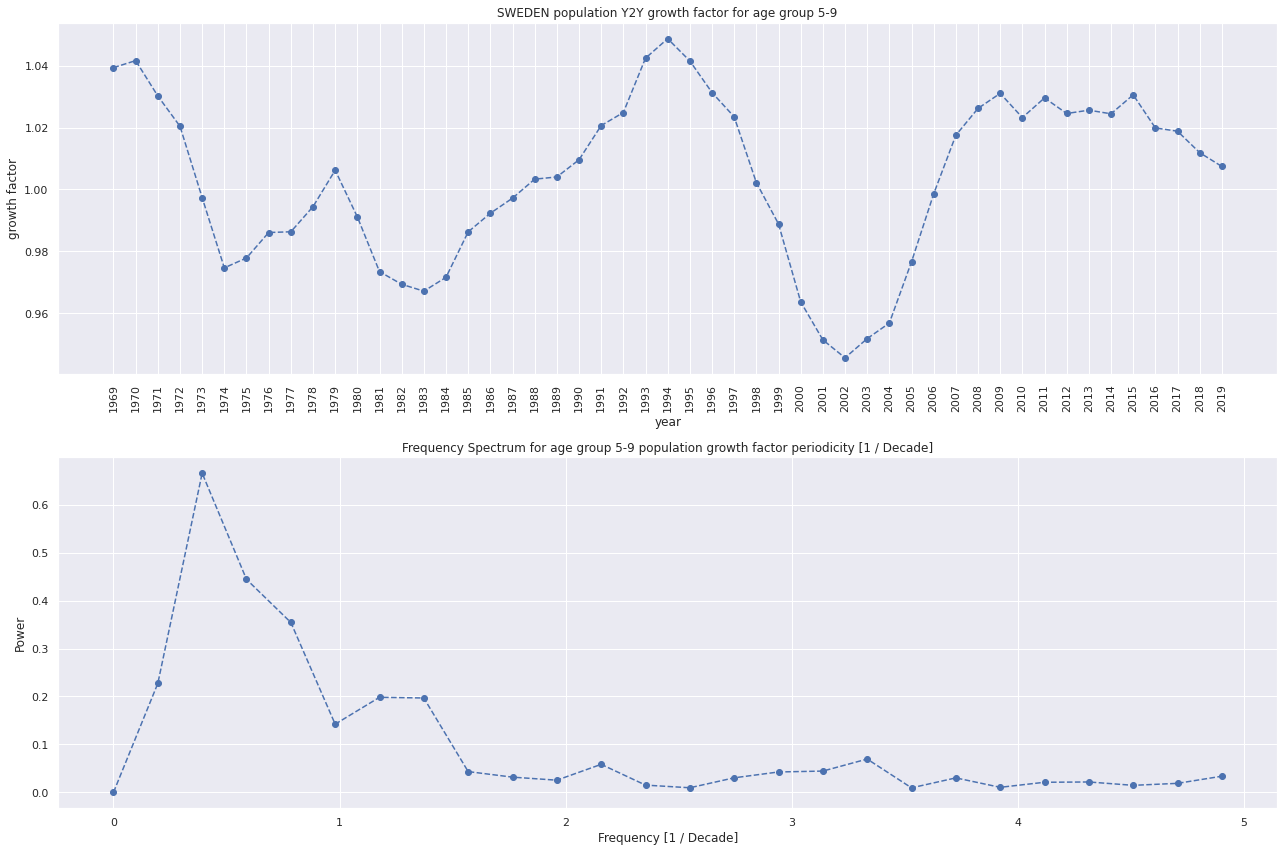

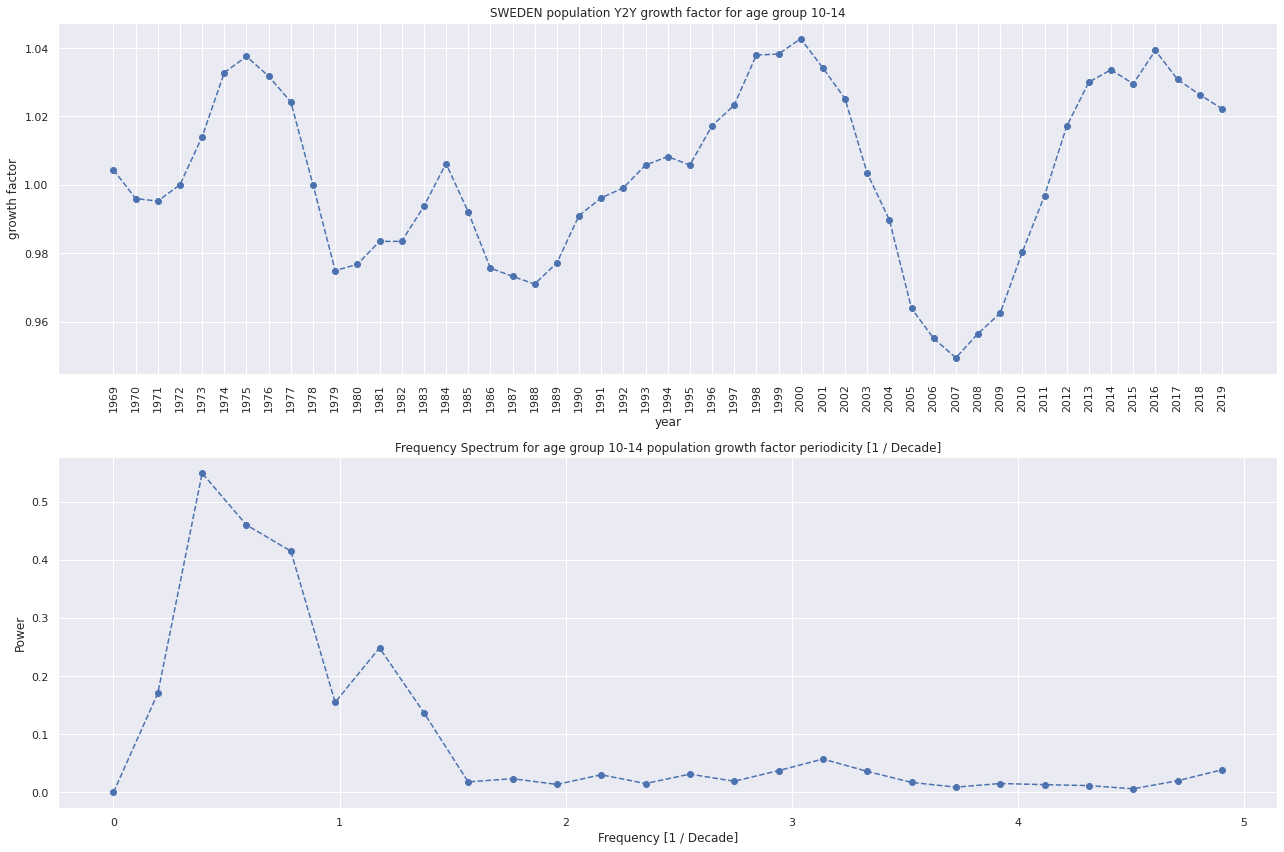

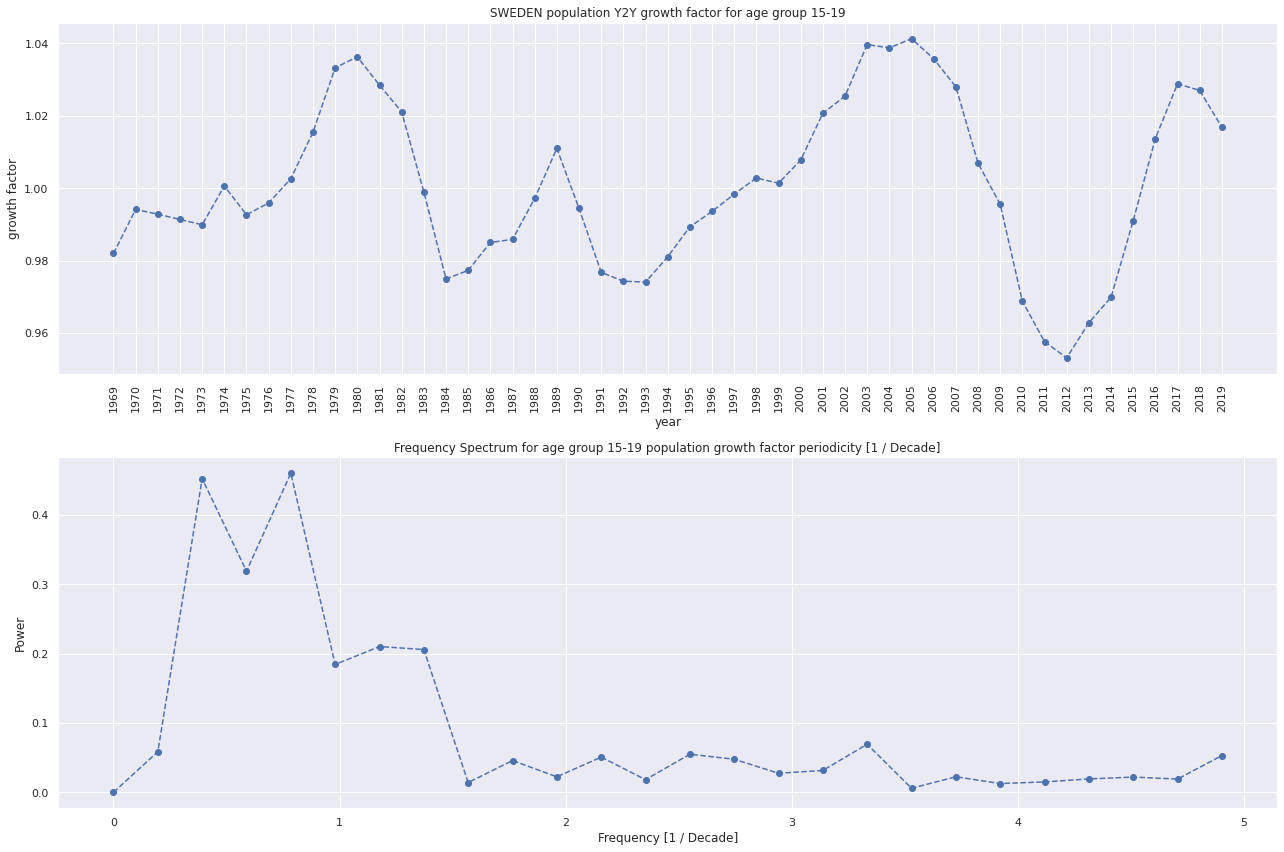

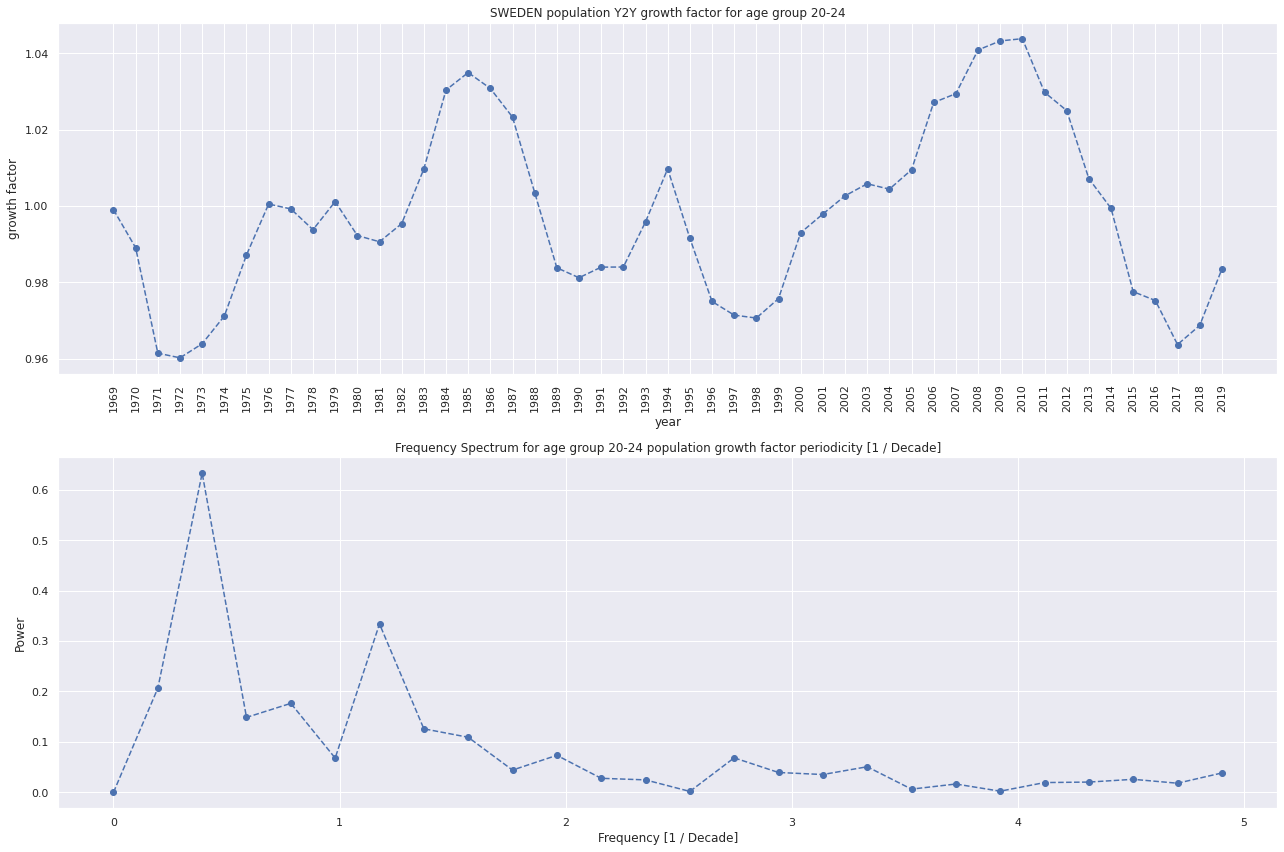

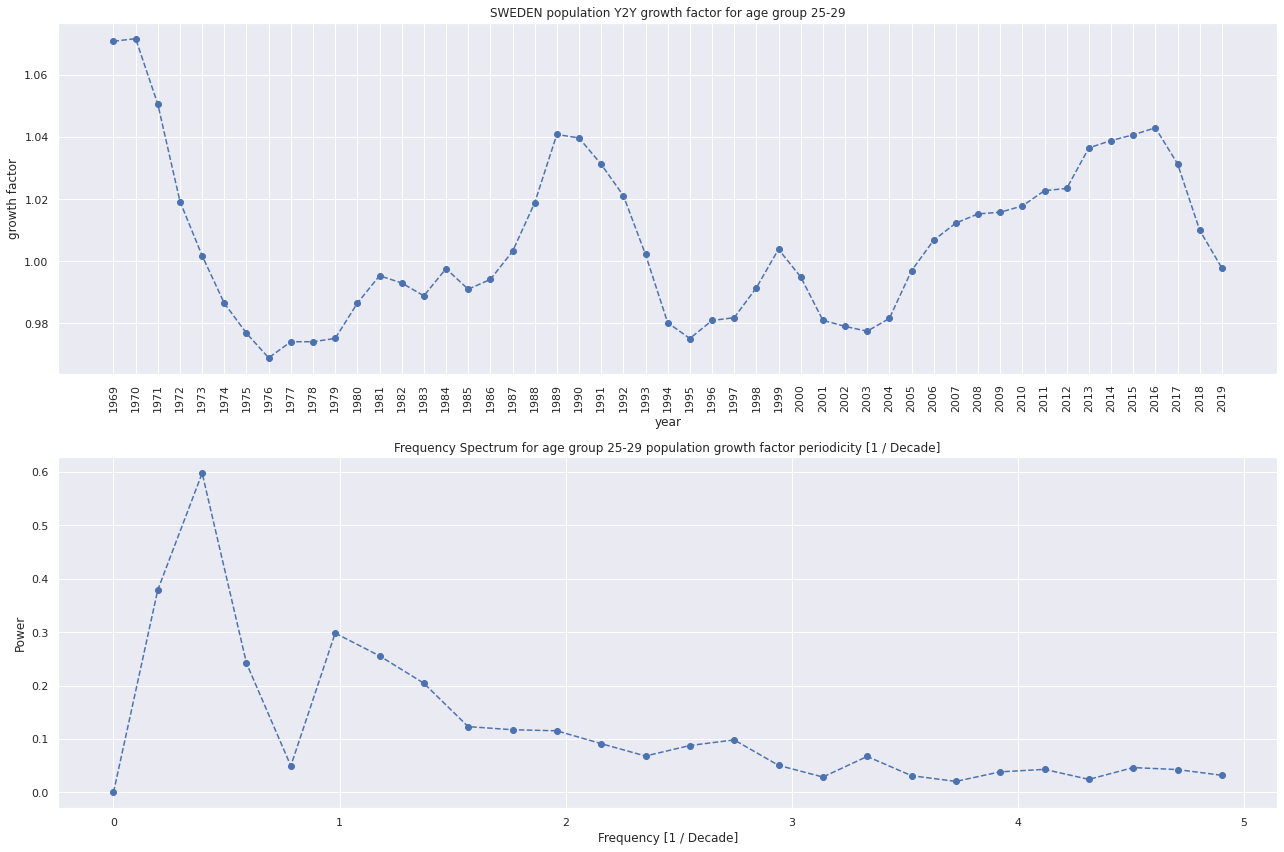

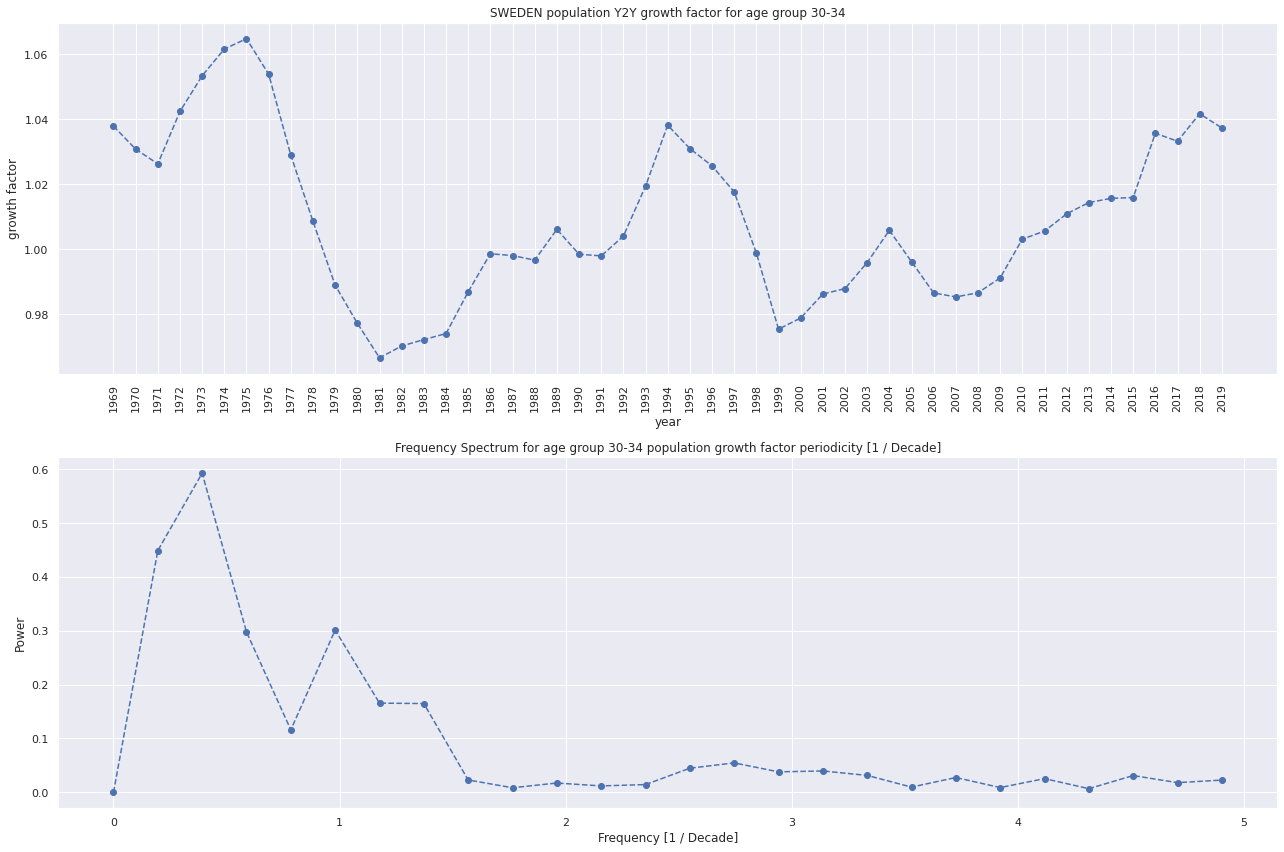

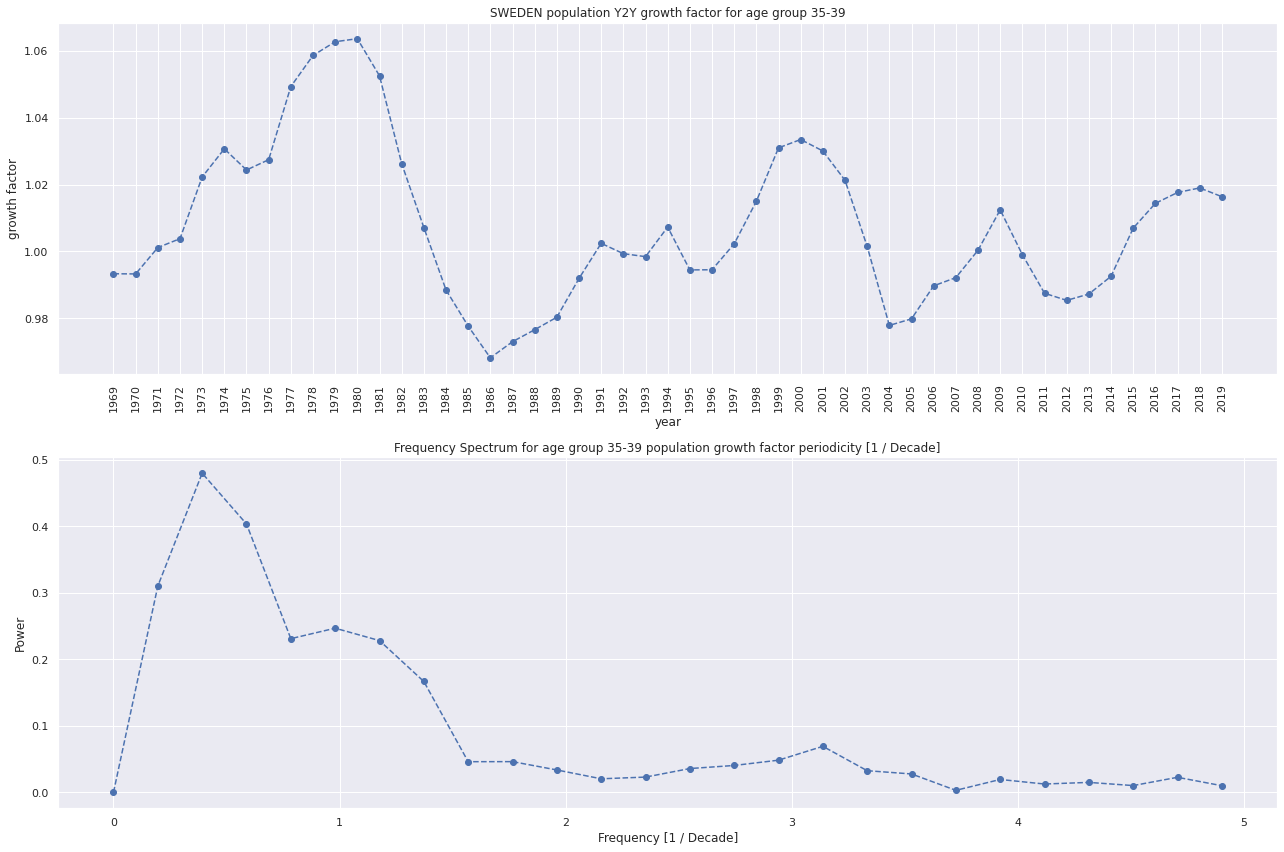

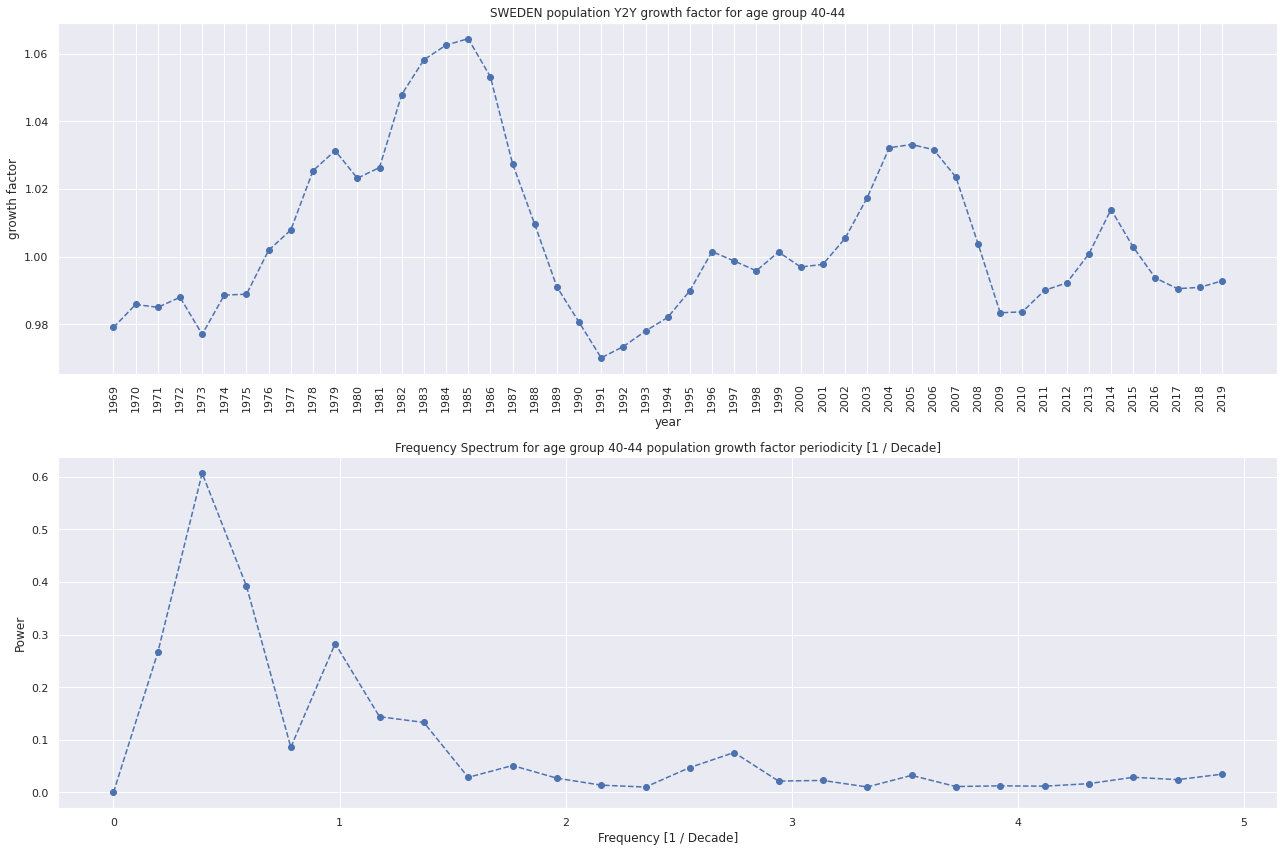

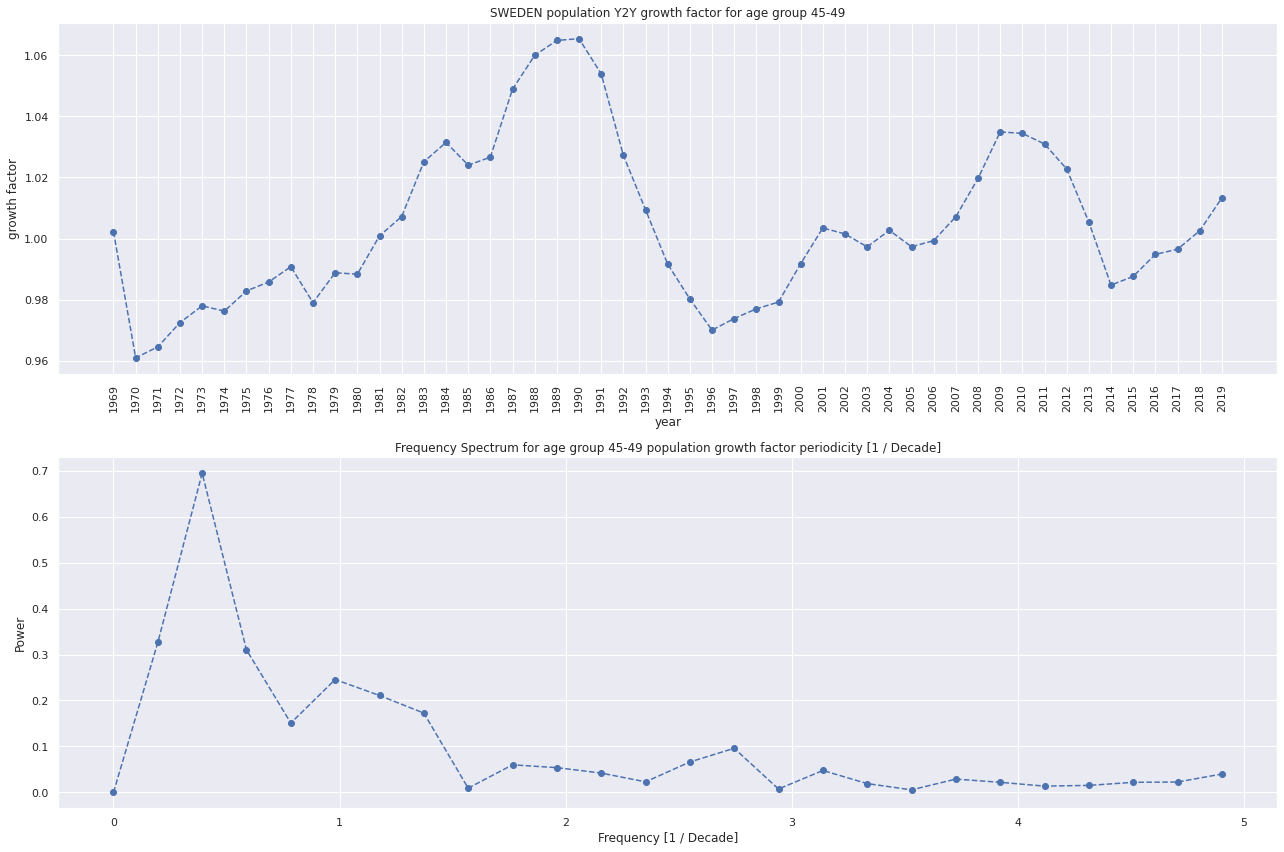

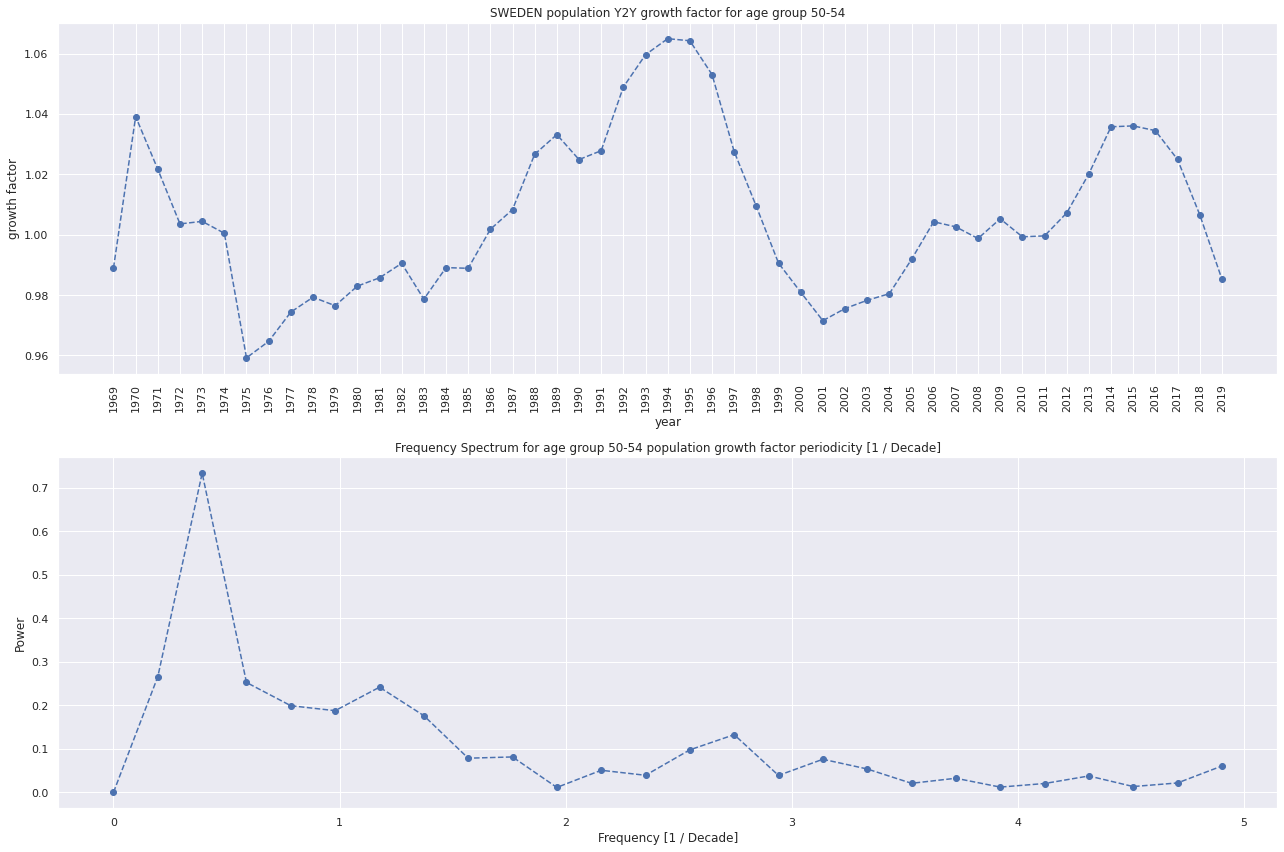

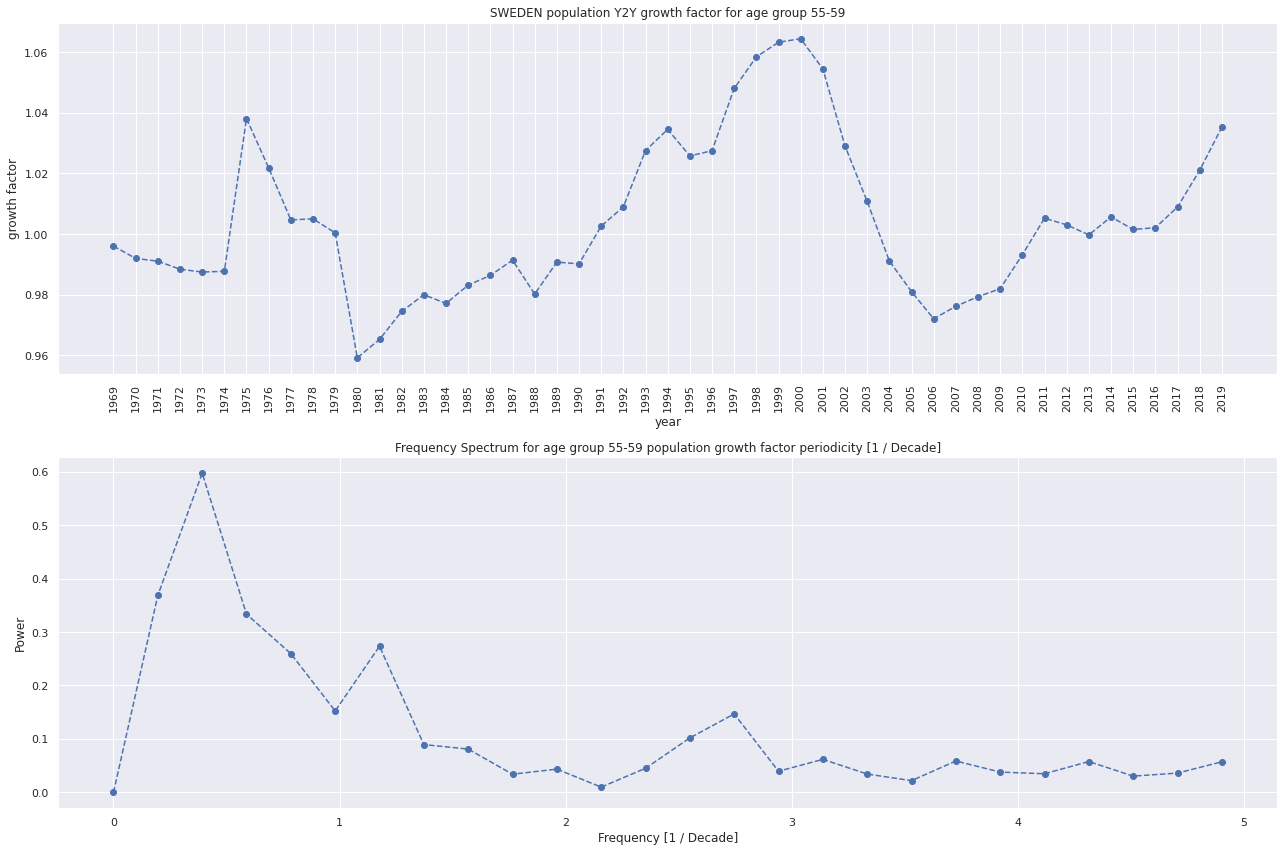

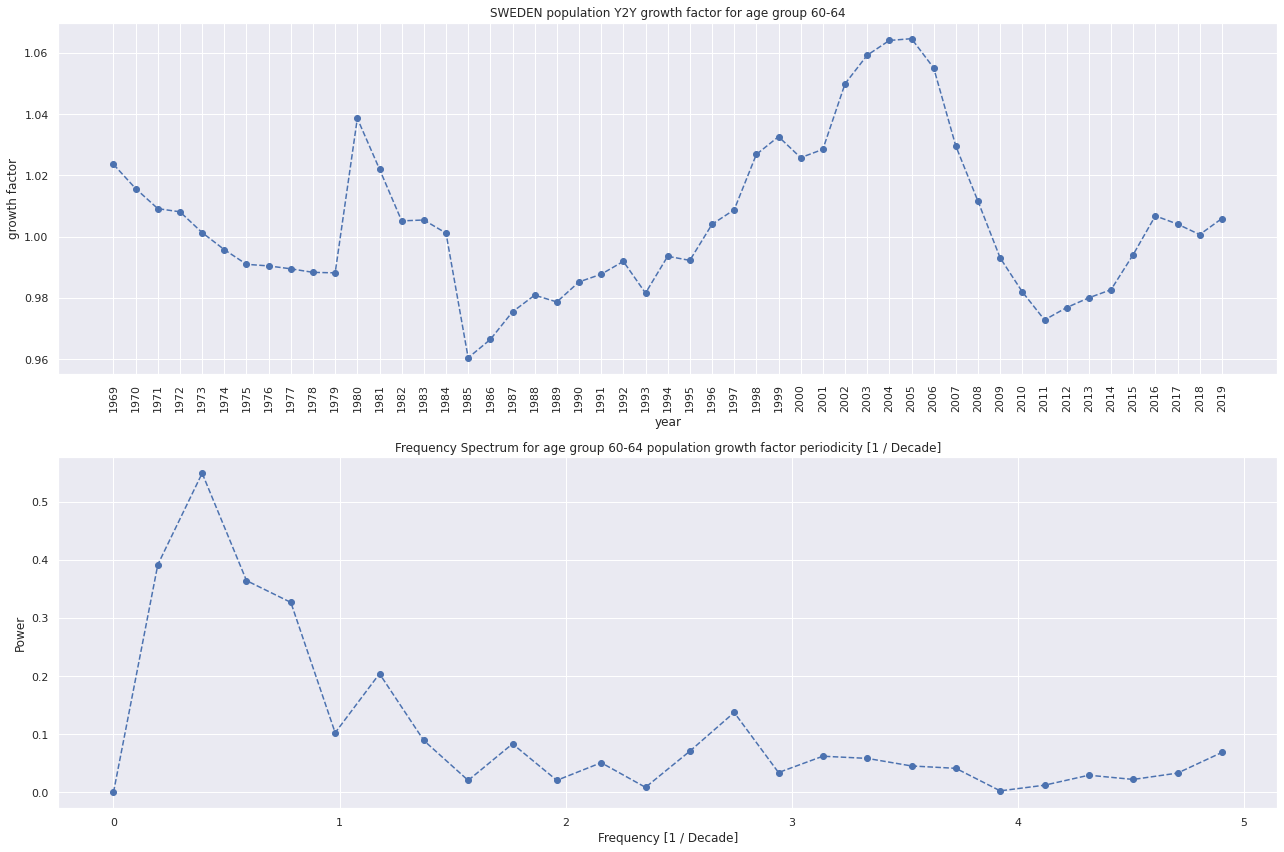

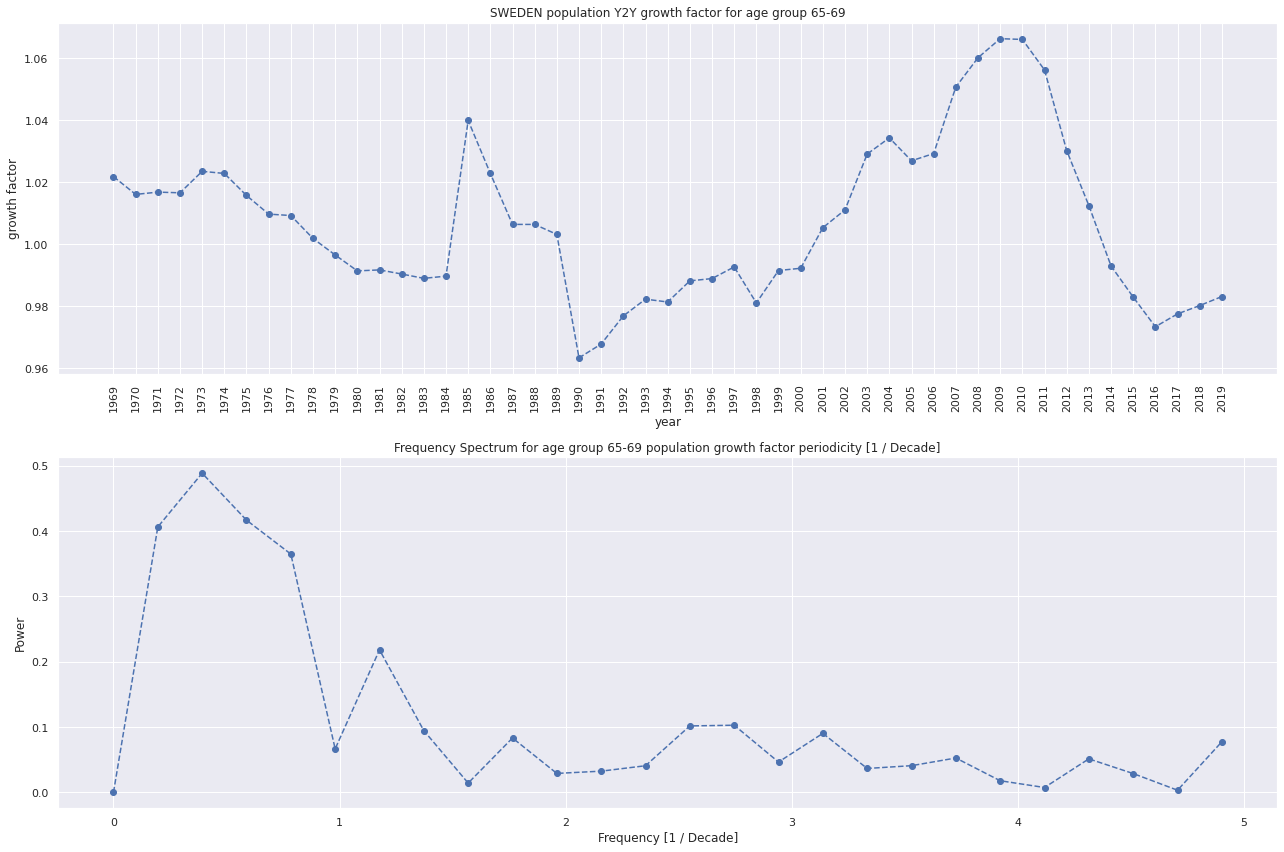

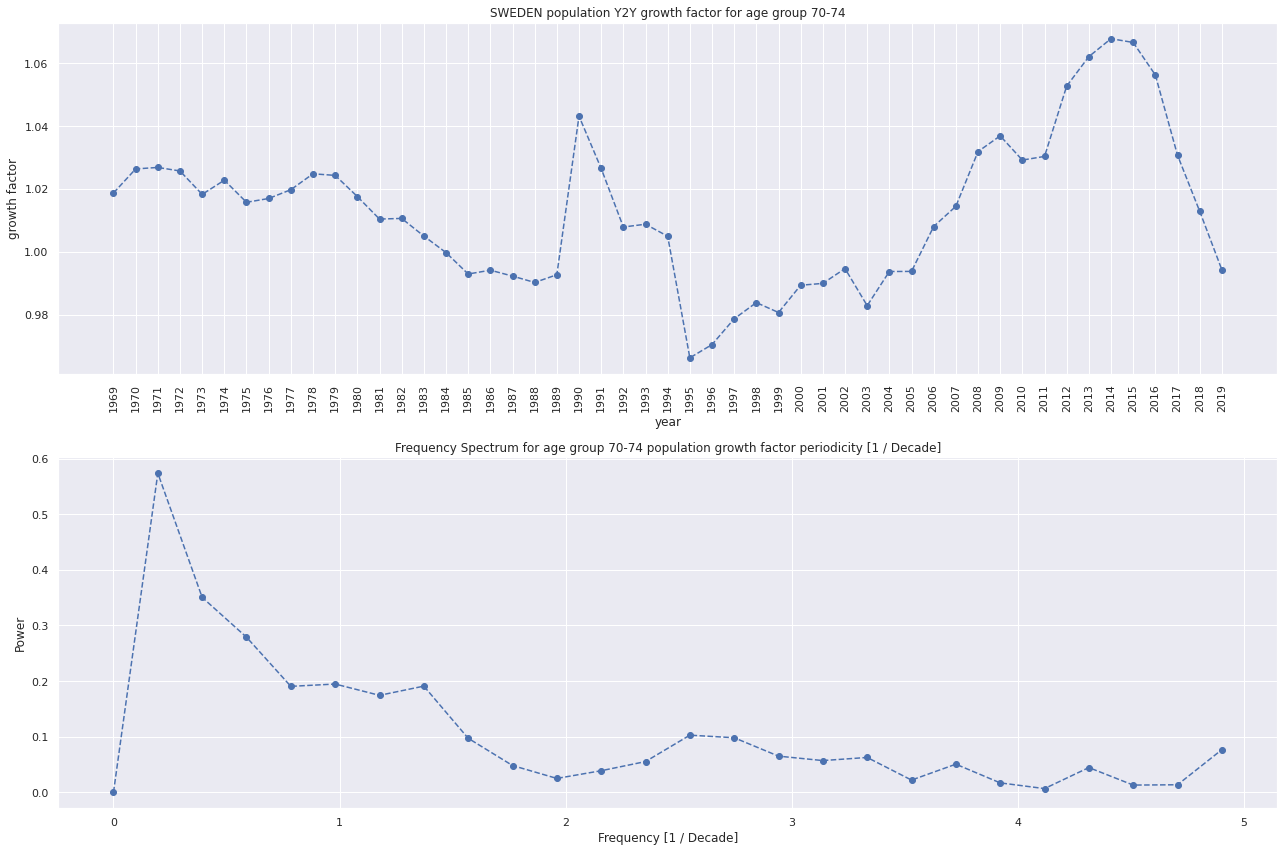

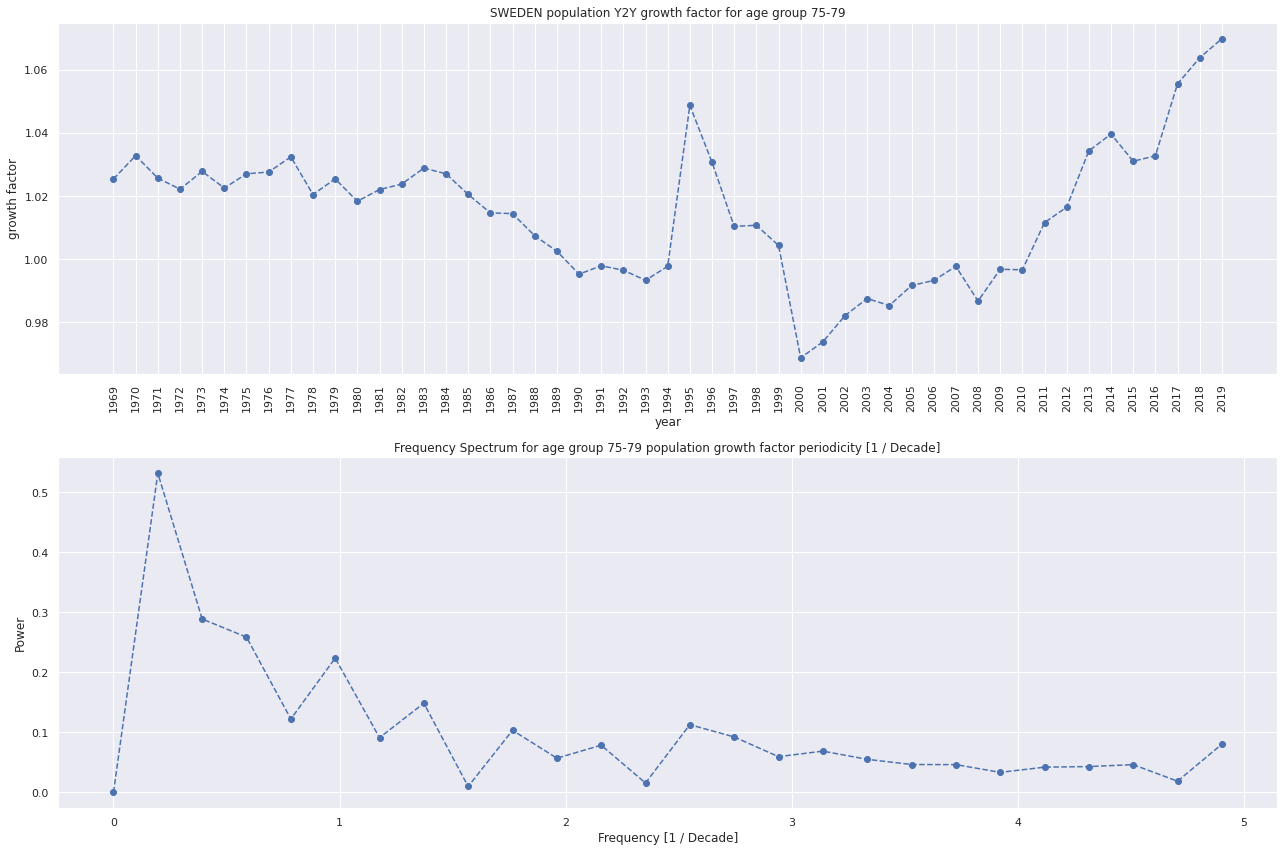

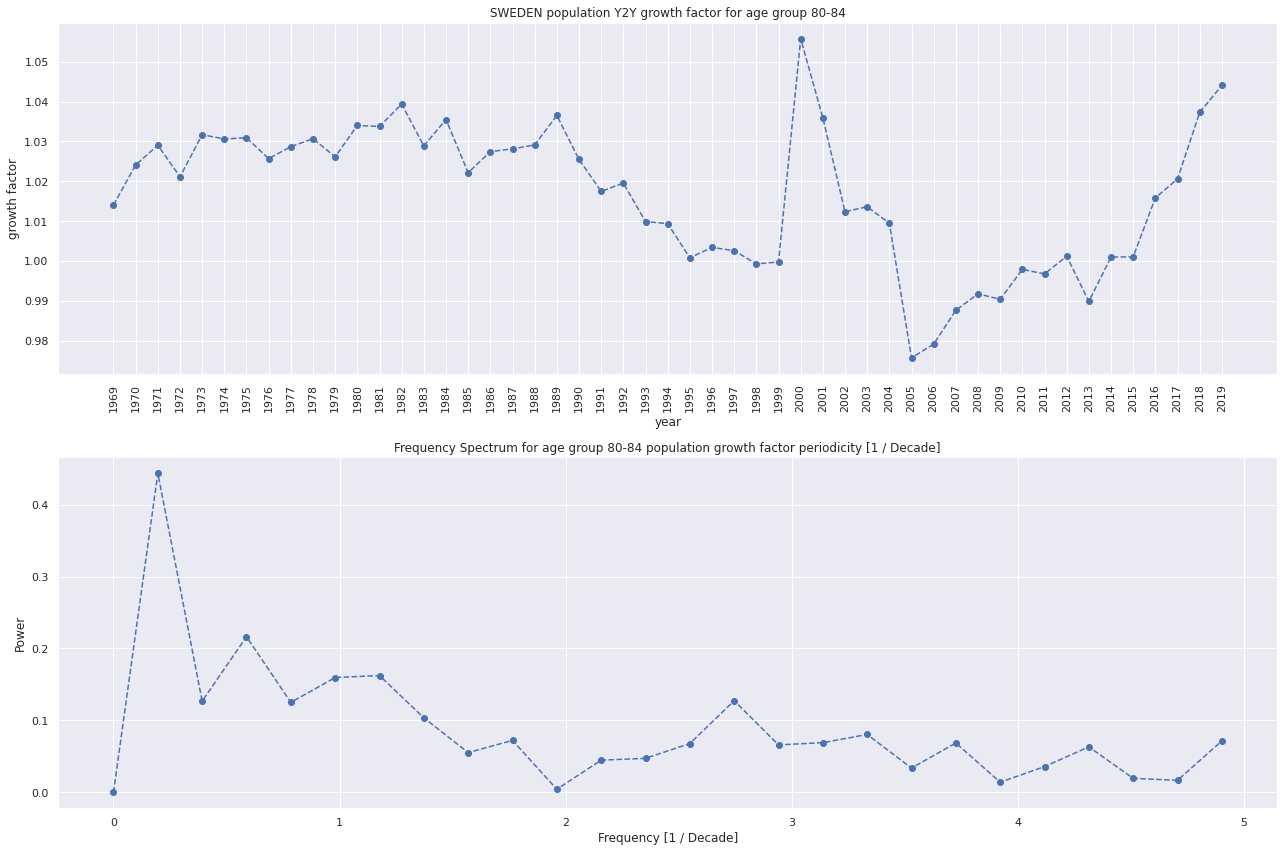

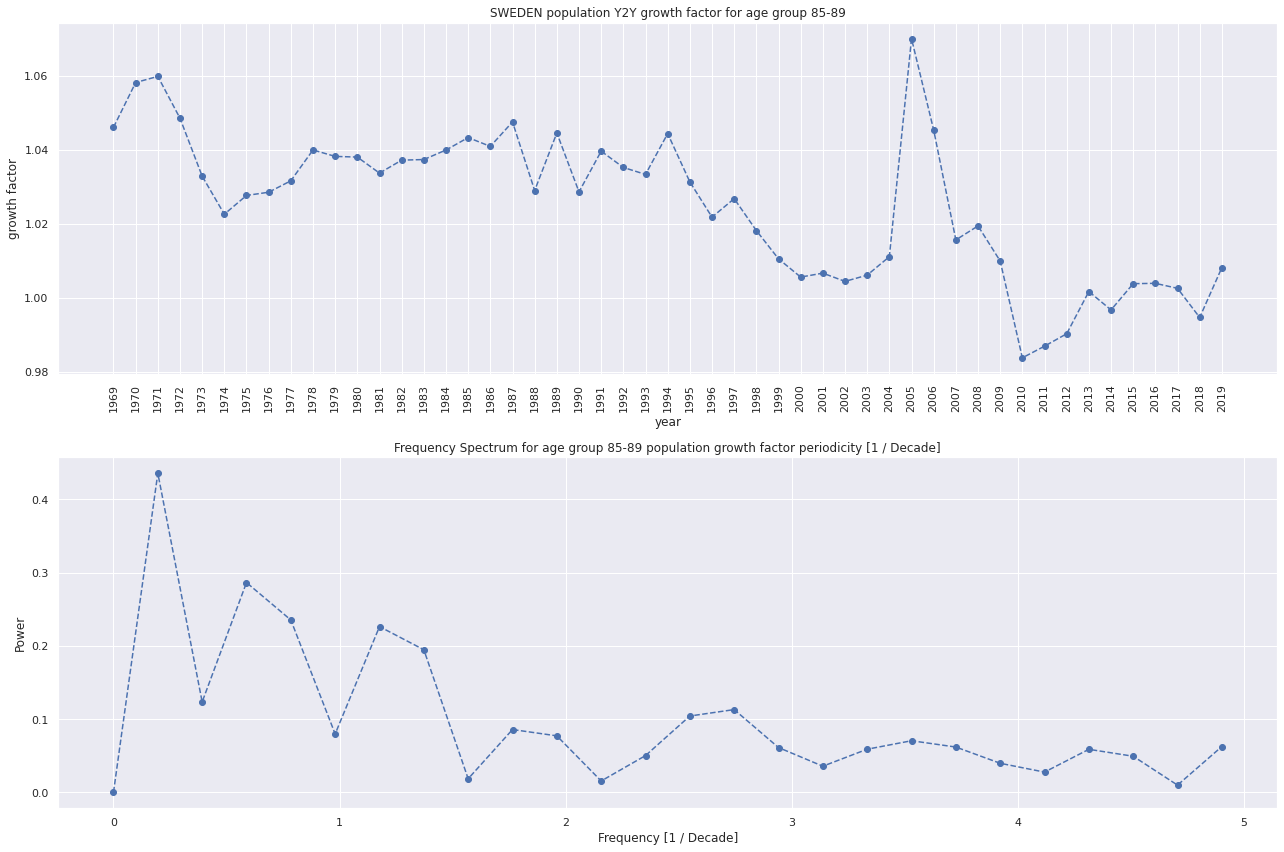

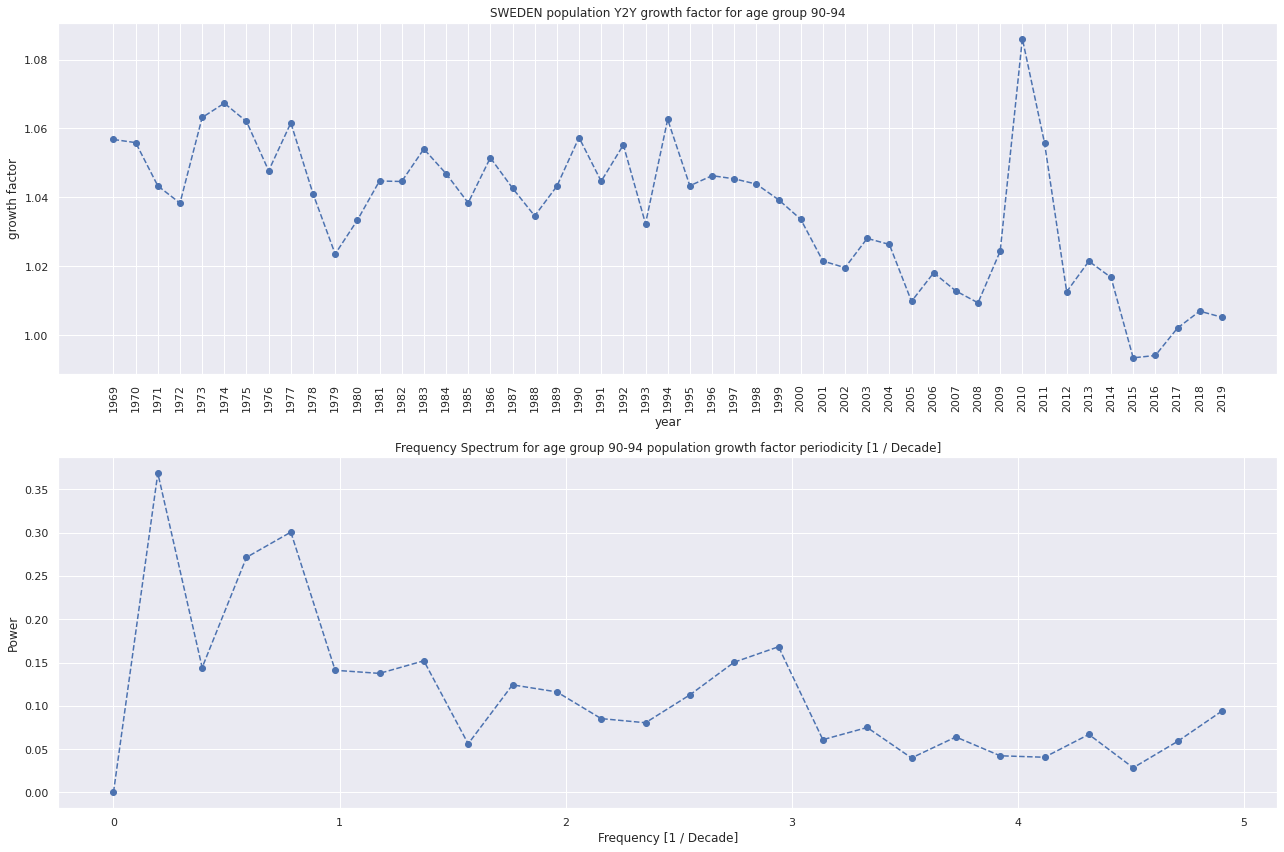

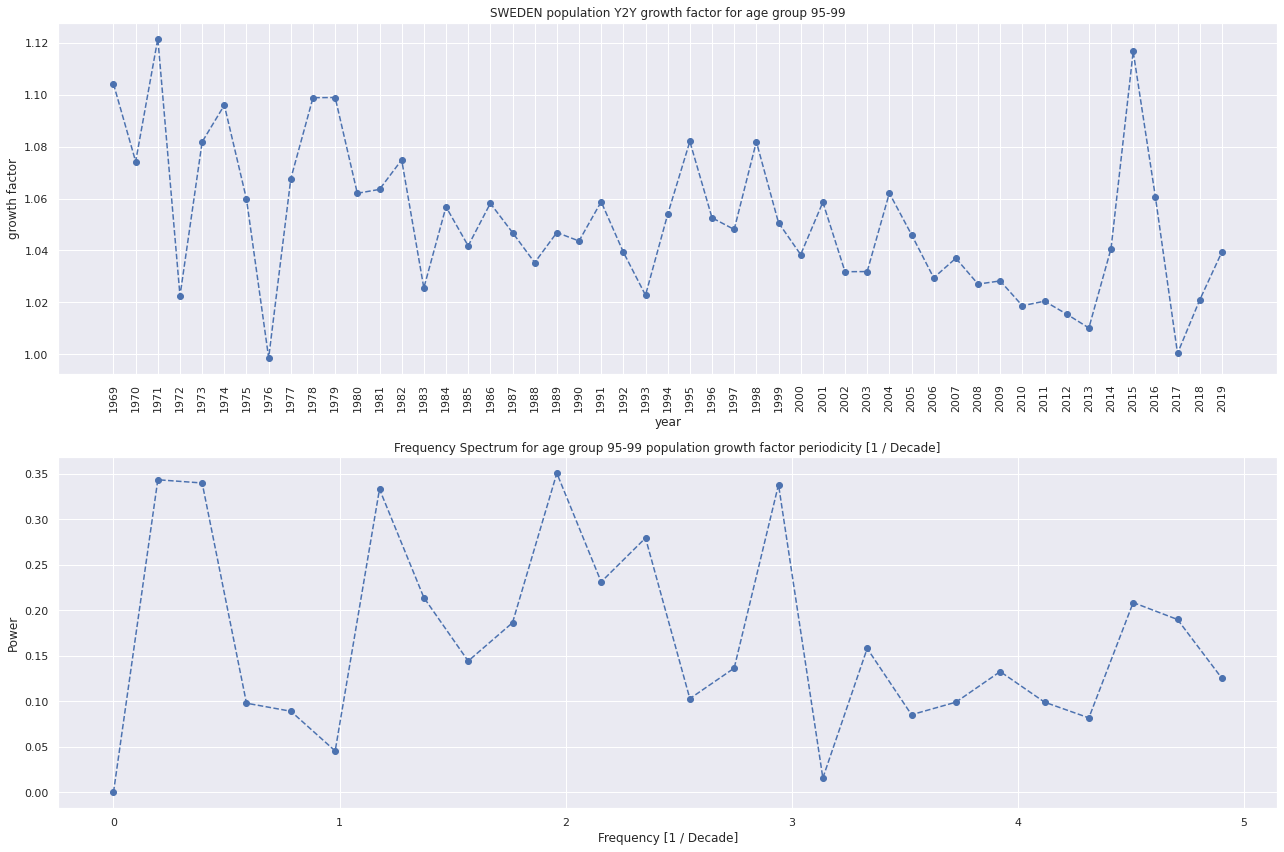

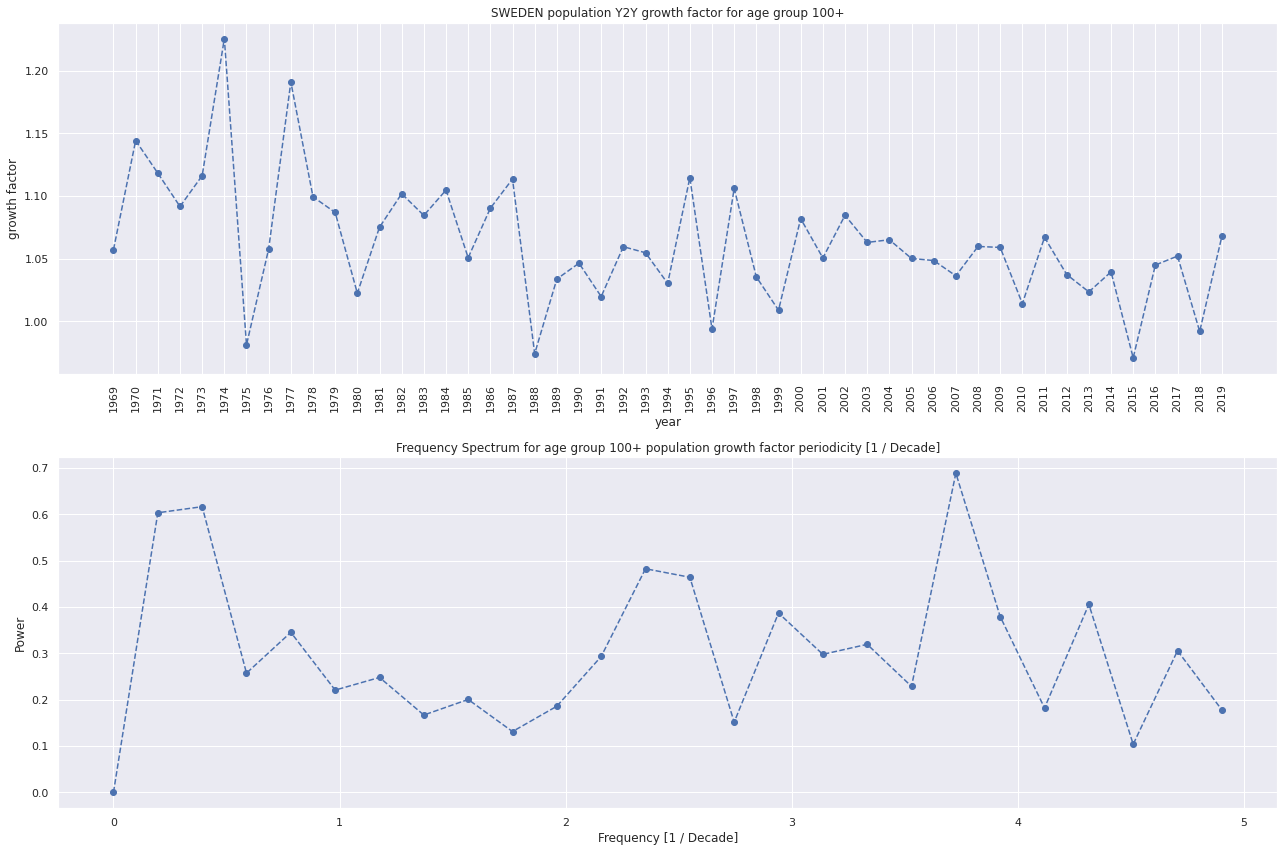

In [652]:
for ag in age_grp_y2y_growth.columns:
    
    signal = age_grp_y2y_growth[ag]

    plot_signal_period(signal,ag)
    
    

In [653]:
pop_60 = flat_pop.T.loc['-4' : '55-59'].sum()
pop_60_70 = flat_pop.T.loc['60-64' : '65-69'].sum()
pop_70_80 = flat_pop.T.loc['70-74' : '75-79'].sum()
pop_80_90 = flat_pop.T.loc['80-84' : '85-89'].sum()
pop_90_plus = flat_pop.T.loc['90-94':].sum()

pop_coarse_grps = pd.concat([pop_60,pop_60_70,pop_70_80,pop_80_90,pop_90_plus],axis=1)
pop_coarse_grps.columns = ['-59','60-69','70-79','80-89','90+']
pop_coarse_grps

-59    60-69   70-79   80-89    90+
year                                         
1968  6408393   845646  498278  164689  14187
1969  6446856   864899  508952  168491  15072
1970  6488760   878605  523696  174210  15958
1971  6490316   889681  537497  180857  16814
1972  6474661   900323  550539  186175  17431
1973  6460322   910652  562728  192143  18583
1974  6465513   918209  575483  197554  19932
1975  6476030   920598  587204  203465  21145
1976  6485318   920243  599733  208869  22016
1977  6494604   919320  614723  215051  23418
1978  6494111   914633  628862  222260  24571
1979  6496700   907552  644438  228900  25420
1980  6477126   921500  655970  236971  26370
1981  6456081   928373  665978  244968  27633
1982  6440640   926661  676725  254447  29011
1983  6426171   924535  686934  262470  30463
1984  6423042   920666  694798  272154  31961
1985  6428669   918050  698217  279993  33210
1986  6445024   912182  700458  288879  34972
1987  6472987   903784  701981  298807  36524
1988  6514934   898114  700585  307498  37757
1989  6579300   890182  698617  319532  39405
1990  6640688   866964  713400  328002  41576
1991  6693843   847482  723174  336113  43507
1992  6742340   834182  725250  344435  45806
1993  6801525   819094  726701  350553  47236
1994  6871425   808803  728021  358023  50109
1995  6892475   800880  729402  362117  52622
1996  6897910   798067  727735  365720  55067
1997  6898430   798706  723001  369851  57637
1998  6898934   802199  720556  372136  60497
1999  6897508   812575  714861  373524  62958
2000  6909428   820736  700066  387393  65169
2001  6921987   835356  687574  397220  66991
2002  6929214   862271  679777  401019  68507
2003  6928342   901751  669639  405424  70514
2004  6918573   947732  662750  409495  72842
2005  6909093   993543  657953  413097  74066
2006  6926971  1037403  658629  414657  75597
2007  6951811  1077189  662965  414034  76928
2008  6981407  1111680  670147  415141  77972
2009  7024450  1139212  682635  414404  79981
2010  7064179  1161830  692657  411161  85743
2011  7100766  1175884  707987  408208  90010
2012  7144043  1179498  734204  406916  91232
2013  7200762  1175251  771134  404702  93015
2014  7272509  1161100  814338  404412  94996
2015  7345143  1147578  856646  405287  96363
2016  7455874  1135688  896697  409775  97119
2017  7549389  1125099  933084  415286  97384
2018  7629408  1114377  964267  423830  98303
2019  7693832  1108438  989013  436679  99627

In [654]:
pop_coarse_y2y_growth = pop_coarse_grps / pop_coarse_grps.shift()
pop_coarse_y2y_growth.dropna(inplace=True)
pop_coarse_y2y_growth

-59     60-69     70-79     80-89       90+
year                                                  
1969  1.006002  1.022767  1.021422  1.023086  1.062381
1970  1.006500  1.015847  1.028969  1.033942  1.058785
1971  1.000240  1.012606  1.026353  1.038155  1.053641
1972  0.997588  1.011962  1.024264  1.029404  1.036696
1973  0.997785  1.011473  1.022140  1.032056  1.066089
1974  1.000804  1.008298  1.022666  1.028161  1.072593
1975  1.001627  1.002602  1.020367  1.029921  1.060857
1976  1.001434  0.999614  1.021337  1.026560  1.041192
1977  1.001432  0.998997  1.024994  1.029597  1.063681
1978  0.999924  0.994902  1.023001  1.033522  1.049236
1979  1.000399  0.992258  1.024769  1.029875  1.034553
1980  0.996987  1.015369  1.017895  1.035260  1.037372
1981  0.996751  1.007458  1.015257  1.033747  1.047895
1982  0.997608  0.998156  1.016137  1.038695  1.049868
1983  0.997753  0.997706  1.015086  1.031531  1.050050
1984  0.999513  0.995815  1.011448  1.036896  1.049174
1985  1.000876  0.997159  1.004921  1.028804  1.039079
1986  1.002544  0.993608  1.003210  1.031737  1.053056
1987  1.004339  0.990794  1.002174  1.034367  1.044378
1988  1.006480  0.993726  0.998011  1.029086  1.033759
1989  1.009880  0.991168  0.997191  1.039135  1.043648
1990  1.009330  0.973918  1.021160  1.026508  1.055095
1991  1.008004  0.977528  1.013701  1.024729  1.046445
1992  1.007245  0.984306  1.002871  1.024760  1.052842
1993  1.008778  0.981913  1.002001  1.017762  1.031219
1994  1.010277  0.987436  1.001816  1.021309  1.060822
1995  1.003063  0.990204  1.001897  1.011435  1.050151
1996  1.000789  0.996488  0.997715  1.009950  1.046463
1997  1.000075  1.000801  0.993495  1.011296  1.046670
1998  1.000073  1.004373  0.996618  1.006178  1.049621
1999  0.999793  1.012934  0.992096  1.003730  1.040680
2000  1.001728  1.010043  0.979304  1.037130  1.035119
2001  1.001818  1.017813  0.982156  1.025367  1.027958
2002  1.001044  1.032220  0.988660  1.009564  1.022630
2003  0.999874  1.045786  0.985086  1.010985  1.029296
2004  0.998590  1.050991  0.989712  1.010041  1.033015
2005  0.998630  1.048338  0.992762  1.008796  1.016803
2006  1.002588  1.044145  1.001027  1.003776  1.020671
2007  1.003586  1.038352  1.006583  0.998498  1.017607
2008  1.004257  1.032019  1.010833  1.002674  1.013571
2009  1.006165  1.024766  1.018635  0.998225  1.025766
2010  1.005656  1.019854  1.014681  0.992174  1.072042
2011  1.005179  1.012096  1.022132  0.992818  1.049765
2012  1.006095  1.003073  1.037030  0.996835  1.013576
2013  1.007939  0.996399  1.050299  0.994559  1.019544
2014  1.009964  0.987959  1.056027  0.999283  1.021298
2015  1.009987  0.988354  1.051954  1.002164  1.014390
2016  1.015075  0.989639  1.046753  1.011074  1.007845
2017  1.012542  0.990676  1.040579  1.013449  1.002729
2018  1.010599  0.990470  1.033419  1.020574  1.009437
2019  1.008444  0.994671  1.025663  1.030316  1.013469

<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)


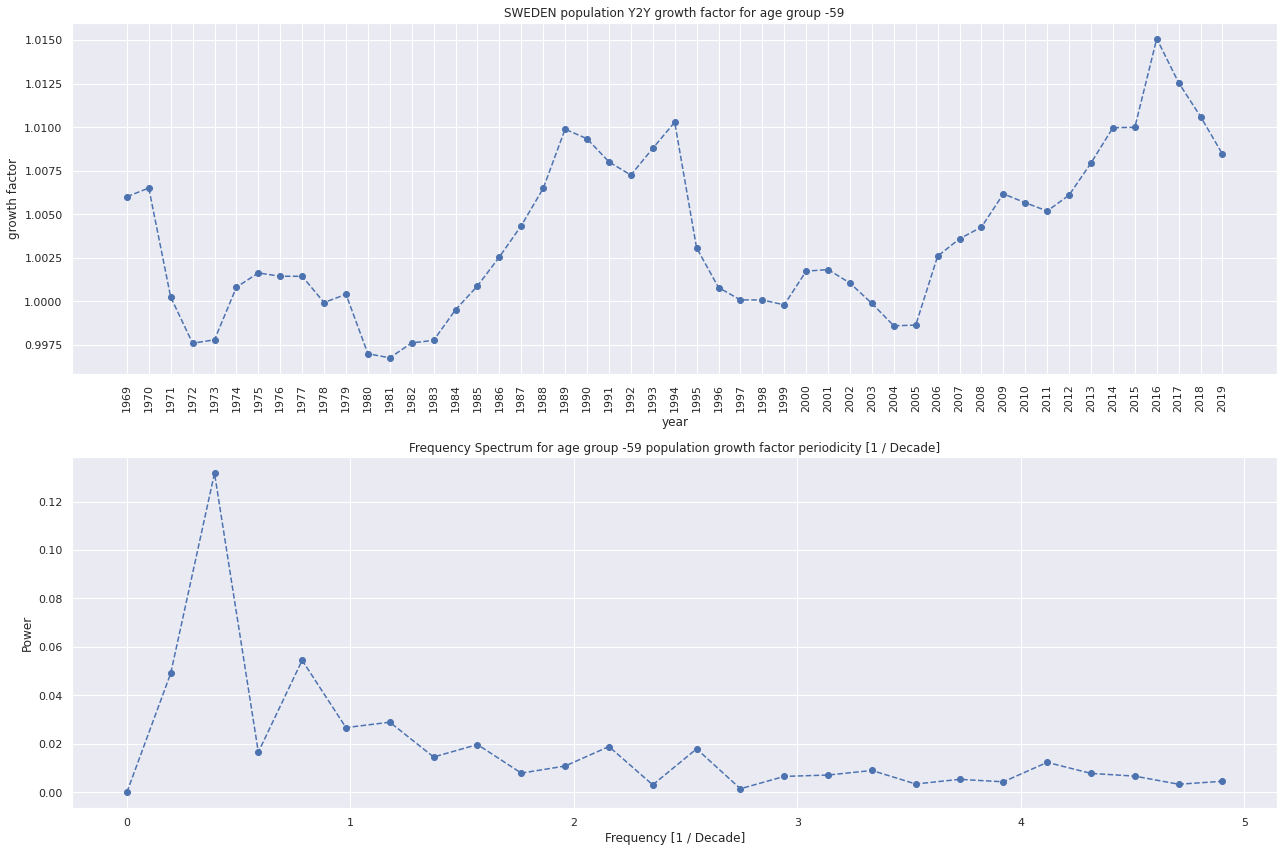

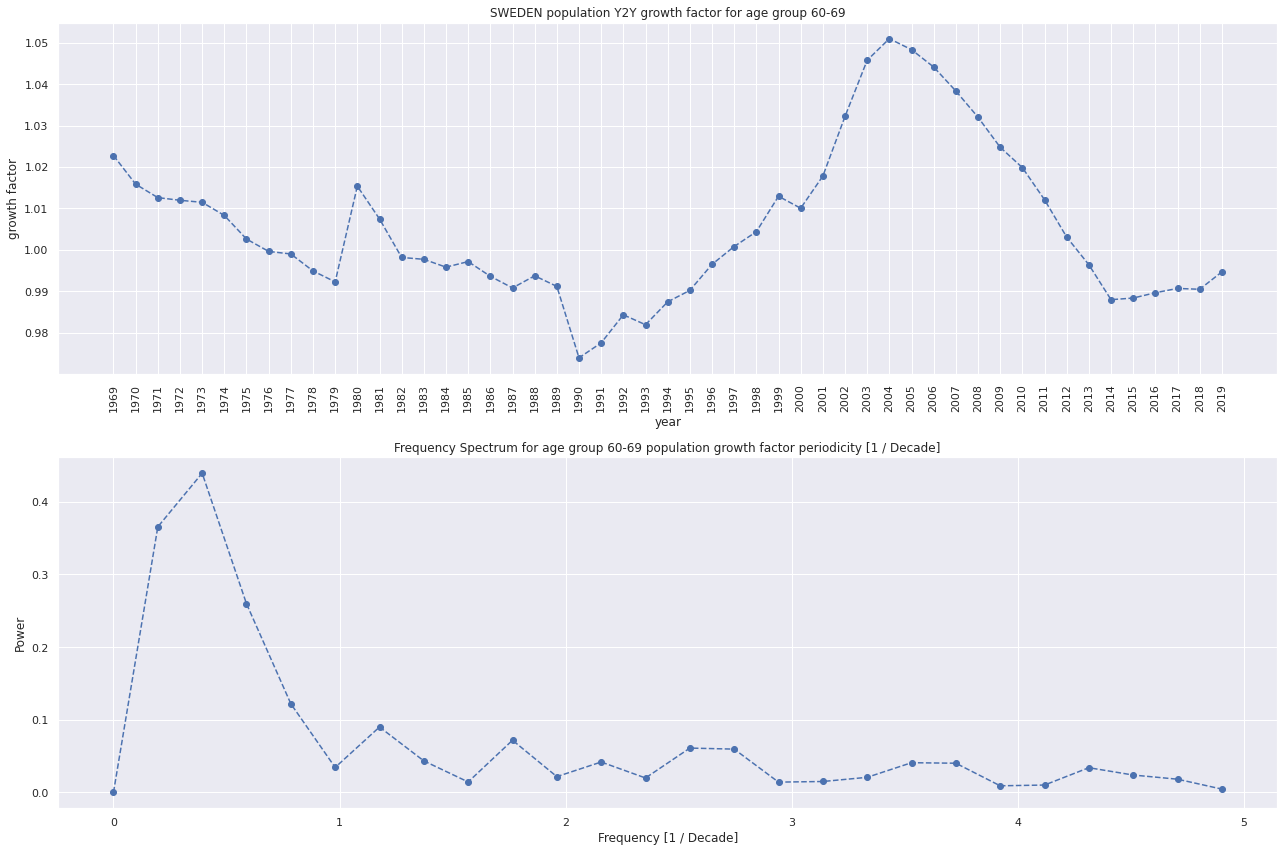

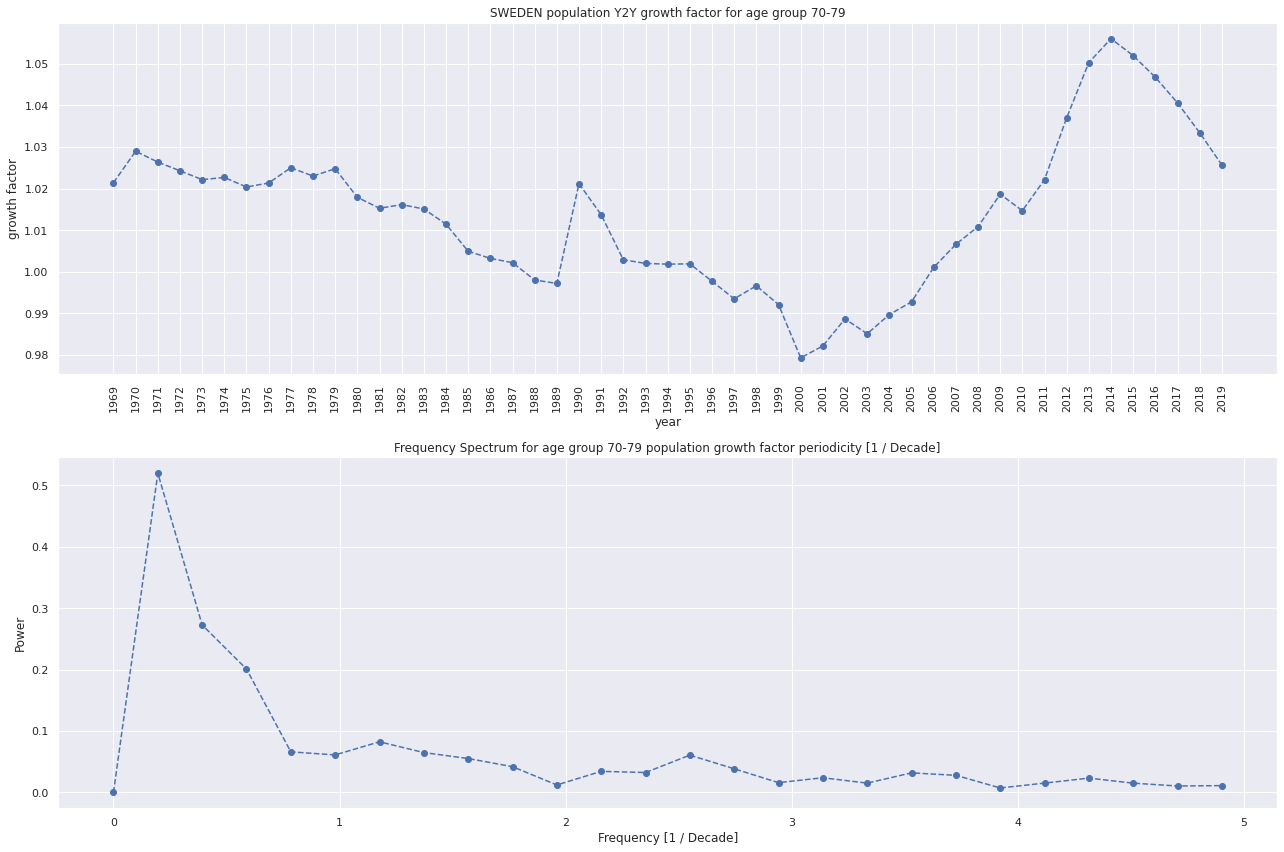

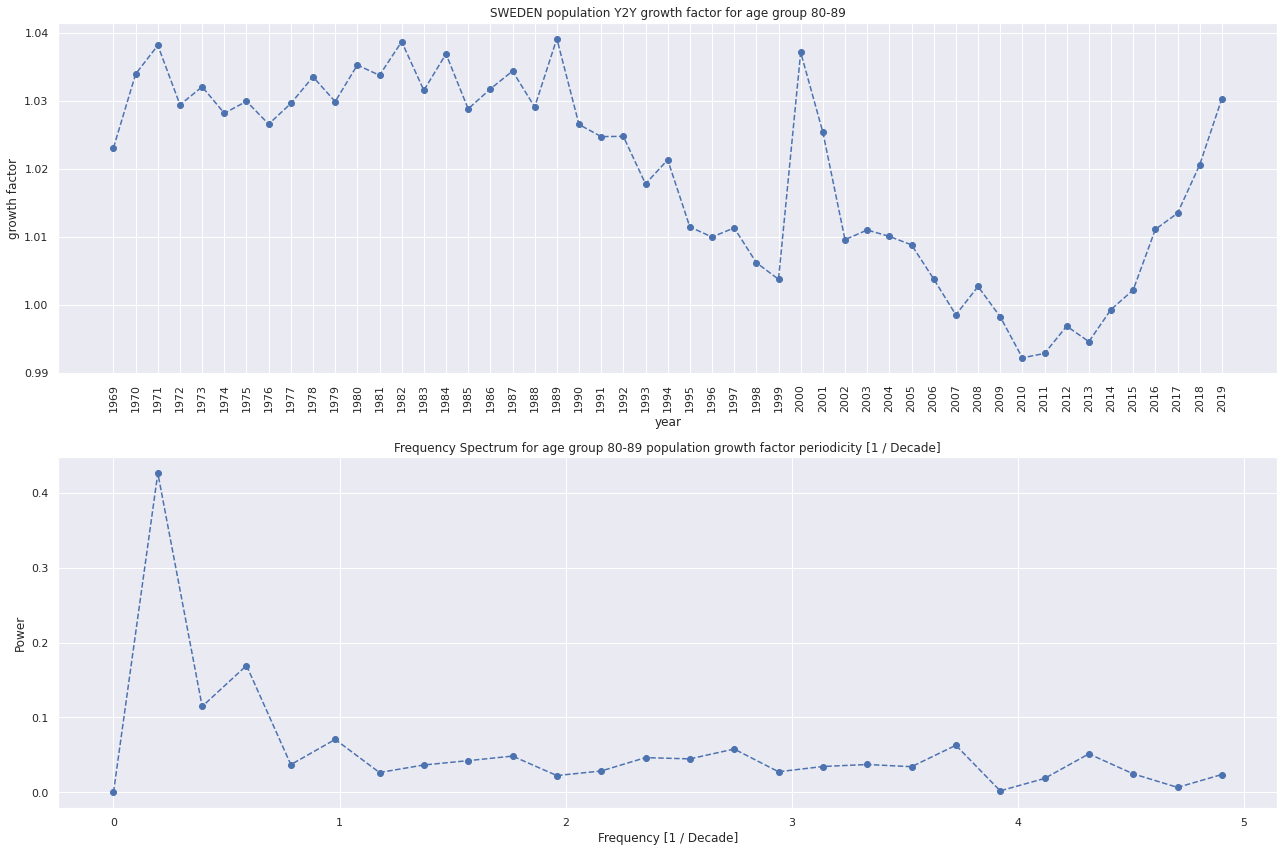

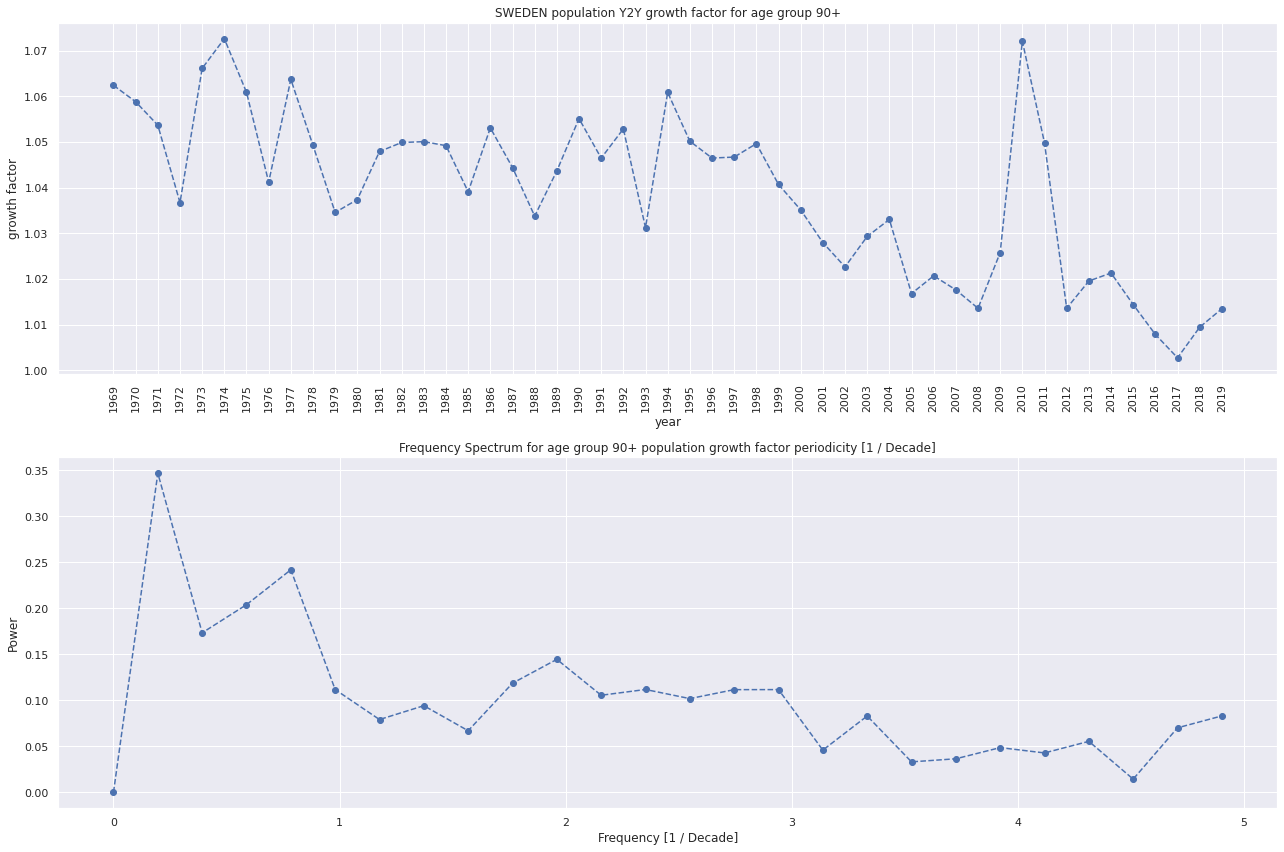

In [655]:
for ag in pop_coarse_y2y_growth.columns:
    
    signal = pop_coarse_y2y_growth[ag]

    plot_signal_period(signal,ag)    

In [656]:
all_dead['coarse_bin'] = pd.cut(
    all_dead['age_col'],[-1,59,69,79,89,100],labels=['-59','60-69','70-79','80-89','90+'])

all_dead

dead  cum_dead  age_col coarse_bin
year age                                    
1968 0    1349      1349        0        -59
     1     169      1518        1        -59
     2      79      1597        2        -59
     3      62      1659        3        -59
     4      50      1709        4        -59
...        ...       ...      ...        ...
2019 96   1760     84161       96        90+
     97   1324     85485       97        90+
     98   1160     86645       98        90+
     99    868     87513       99        90+
     100  1253     88766      100        90+

[5252 rows x 4 columns]

In [657]:
coarse_dead = all_dead.groupby(['year','coarse_bin'])['dead'].sum()
coarse_dead

year  coarse_bin
1968  -59           14239
      60-69         14575
      70-79         25301
      80-89         23470
      90+            4879
                    ...  
2019  -59            6469
      60-69          8430
      70-79         20251
      80-89         30220
      90+           23396
Name: dead, Length: 260, dtype: int64

In [658]:
coarse_dead_flat = coarse_dead.unstack()
coarse_dead_flat

coarse_bin  -59    60-69  70-79  80-89  90+  
year                                         
1968        14239  14575  25301  23470   4879
1969        13995  15280  25891  23154   5018
1970        13736  14786  24441  22180   4873
1971        13865  15092  25471  23163   5143
1972        13749  14985  26287  23504   5531
1973        13266  15384  26511  24823   5656
1974        13258  15332  26902  24745   6079
1975        13267  15457  27349  25764   6371
1976        13140  15560  28067  26843   7067
1977        12886  15212  27244  26003   6855
1978        12642  15036  28062  26863   7078
1979        12802  14685  28570  27503   7514
1980        12222  14907  28444  28301   7923
1981        11462  14694  28608  29105   8165
1982        11210  14381  28061  28795   8223
1983        10762  13934  27846  29476   8772
1984        10590  13501  28069  29406   8916
1985        10609  13759  28431  31431   9802
1986        10461  13435  27763  31806   9830
1987        10490  12950  27524  32115  10227
1988        10582  13217  27650  34119  11170
1989        10239  12188  26038  32715  10929
1990        10226  11783  26859  34663  11630
1991        10360  11614  26334  34623  12269
1992         9838  11278  25941  34888  12765
1993         9780  10796  25911  36718  13802
1994         9716  10010  24327  34687  13104
1995         9441   9975  24643  35899  13997
1996         9256   9655  24118  36142  14962
1997         9088   9419  23692  35639  15488
1998         9006   9305  23329  35809  15822
1999         9043   9066  23129  36371  17117
2000         9044   8906  21791  36363  17357
2001         9177   8865  20895  36593  18222
2002         8872   8931  20663  37348  19195
2003         8703   9131  19777  36647  18703
2004         8477   9283  18749  35396  18627
2005         8255   9758  18410  35987  19300
2006         8046   9783  17926  35740  19682
2007         7832  10114  17480  35902  20401
2008         7711  10298  17050  35770  20620
2009         7654  10097  17054  34814  20461
2010         7211  10506  17199  34033  21538
2011         7169  10312  16935  33183  22339
2012         7138  10325  17354  33554  23567
2013         7091  10247  17634  32005  23425
2014         7024   9900  17988  30999  23065
2015         6968   9710  18879  31267  24083
2016         6840   9480  19564  30791  24307
2017         6858   9008  19995  31333  24778
2018         6741   9039  20625  31238  24542
2019         6469   8430  20251  30220  23396

In [659]:
coarse_dead_y2y_growth = coarse_dead_flat / coarse_dead_flat.shift()
coarse_dead_y2y_growth.dropna(inplace=True)
coarse_dead_y2y_growth

coarse_bin     -59       60-69     70-79     80-89     90+  
year                                                        
1969        0.982864  1.048370  1.023319  0.986536  1.028489
1970        0.981493  0.967670  0.943996  0.957934  0.971104
1971        1.009391  1.020695  1.042142  1.044319  1.055407
1972        0.991634  0.992910  1.032036  1.014722  1.075442
1973        0.964870  1.026627  1.008521  1.056118  1.022600
1974        0.999397  0.996620  1.014749  0.996858  1.074788
1975        1.000679  1.008153  1.016616  1.041180  1.048034
1976        0.990427  1.006664  1.026253  1.041880  1.109245
1977        0.980670  0.977635  0.970677  0.968707  0.970001
1978        0.981065  0.988430  1.030025  1.033073  1.032531
1979        1.012656  0.976656  1.018103  1.023825  1.061599
1980        0.954695  1.015117  0.995590  1.029015  1.054432
1981        0.937817  0.985711  1.005766  1.028409  1.030544
1982        0.978014  0.978699  0.980879  0.989349  1.007103
1983        0.960036  0.968917  0.992338  1.023650  1.066764
1984        0.984018  0.968925  1.008008  0.997625  1.016416
1985        1.001794  1.019110  1.012897  1.068863  1.099372
1986        0.986050  0.976452  0.976505  1.011931  1.002857
1987        1.002772  0.963900  0.991391  1.009715  1.040387
1988        1.008770  1.020618  1.004578  1.062401  1.092207
1989        0.967586  0.922146  0.941700  0.958850  0.978424
1990        0.998730  0.966771  1.031531  1.059545  1.064141
1991        1.013104  0.985657  0.980453  0.998846  1.054944
1992        0.949614  0.971069  0.985076  1.007654  1.040427
1993        0.994104  0.957262  0.998844  1.052454  1.081238
1994        0.993456  0.927195  0.938868  0.944687  0.949428
1995        0.971696  0.996503  1.012990  1.034941  1.068147
1996        0.980405  0.967920  0.978696  1.006769  1.068943
1997        0.981850  0.975557  0.982337  0.986083  1.035156
1998        0.990977  0.987897  0.984678  1.004770  1.021565
1999        1.004108  0.974315  0.991427  1.015694  1.081848
2000        1.000111  0.982352  0.942151  0.999780  1.014021
2001        1.014706  0.995396  0.958882  1.006325  1.049836
2002        0.966765  1.007445  0.988897  1.020632  1.053397
2003        0.980951  1.022394  0.957121  0.981231  0.974368
2004        0.974032  1.016647  0.948020  0.965864  0.995936
2005        0.973811  1.051169  0.981919  1.016697  1.036130
2006        0.974682  1.002562  0.973710  0.993136  1.019793
2007        0.973403  1.033834  0.975120  1.004533  1.036531
2008        0.984551  1.018193  0.975400  0.996323  1.010735
2009        0.992608  0.980482  1.000235  0.973274  0.992289
2010        0.942122  1.040507  1.008502  0.977566  1.052637
2011        0.994176  0.981534  0.984650  0.975024  1.037190
2012        0.995676  1.001261  1.024742  1.011180  1.054971
2013        0.993416  0.992446  1.016135  0.953836  0.993975
2014        0.990551  0.966136  1.020075  0.968567  0.984632
2015        0.992027  0.980808  1.049533  1.008645  1.044136
2016        0.981630  0.976313  1.036284  0.984776  1.009301
2017        1.002632  0.950211  1.022030  1.017603  1.019377
2018        0.982940  1.003441  1.031508  0.996968  0.990475
2019        0.959650  0.932625  0.981867  0.967411  0.953305

<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)
<ipython-input-651-7aea99f19e89>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(signal.index.values,rotation=90)


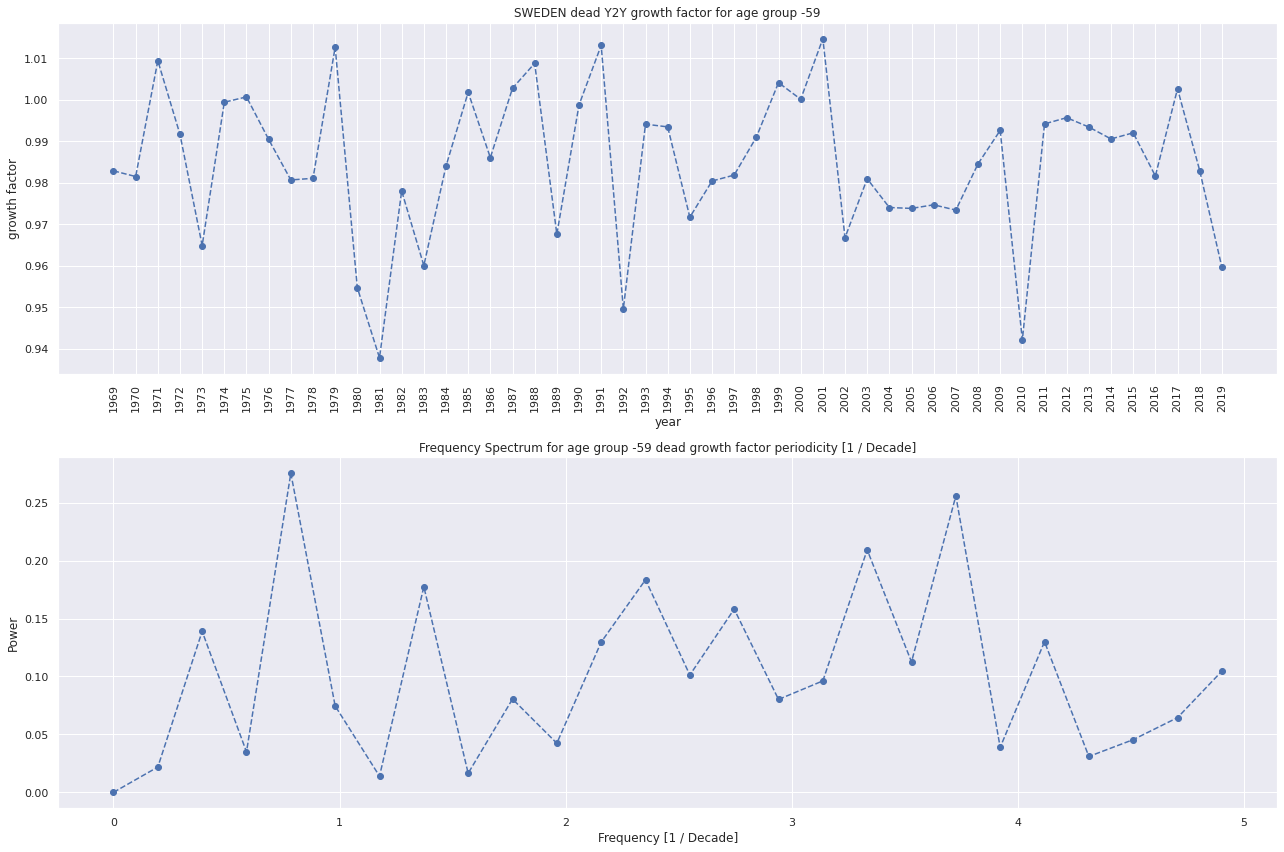

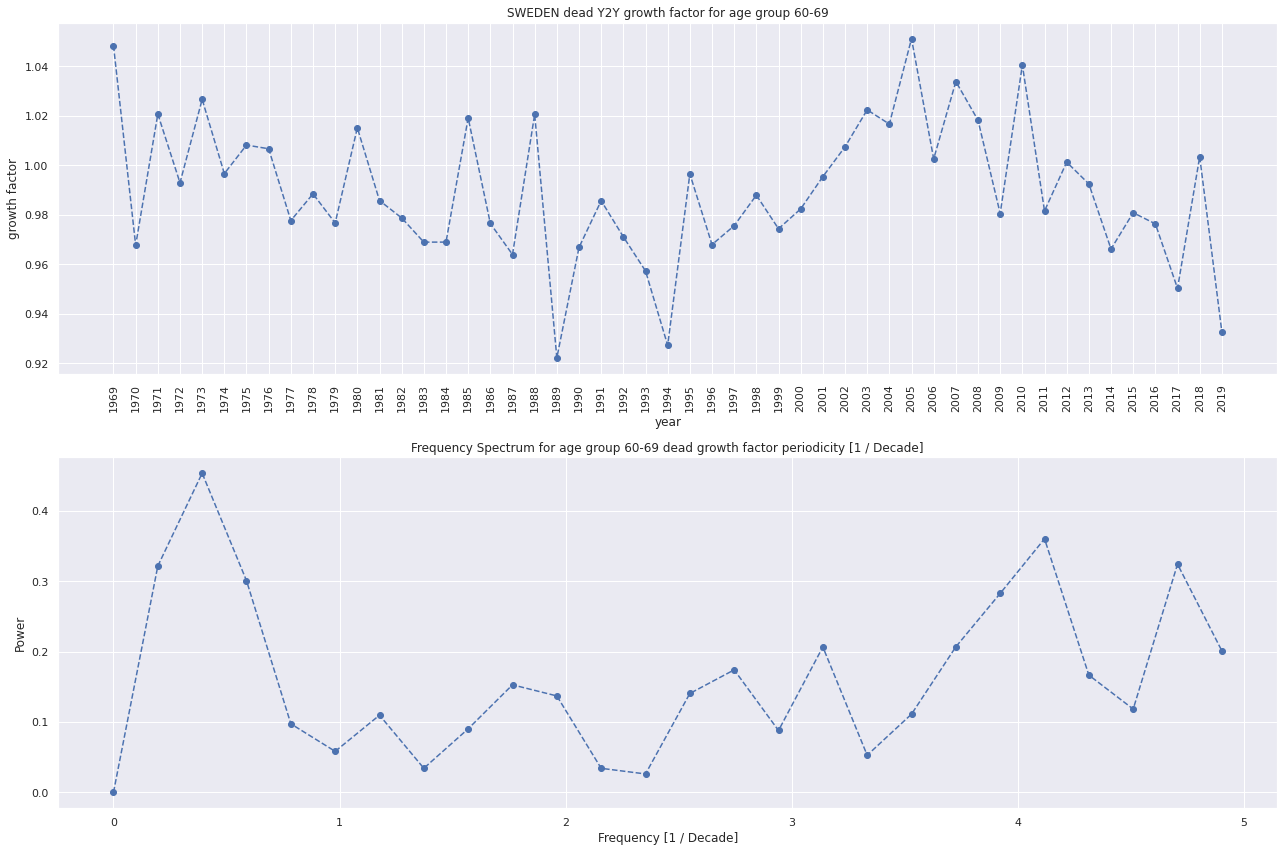

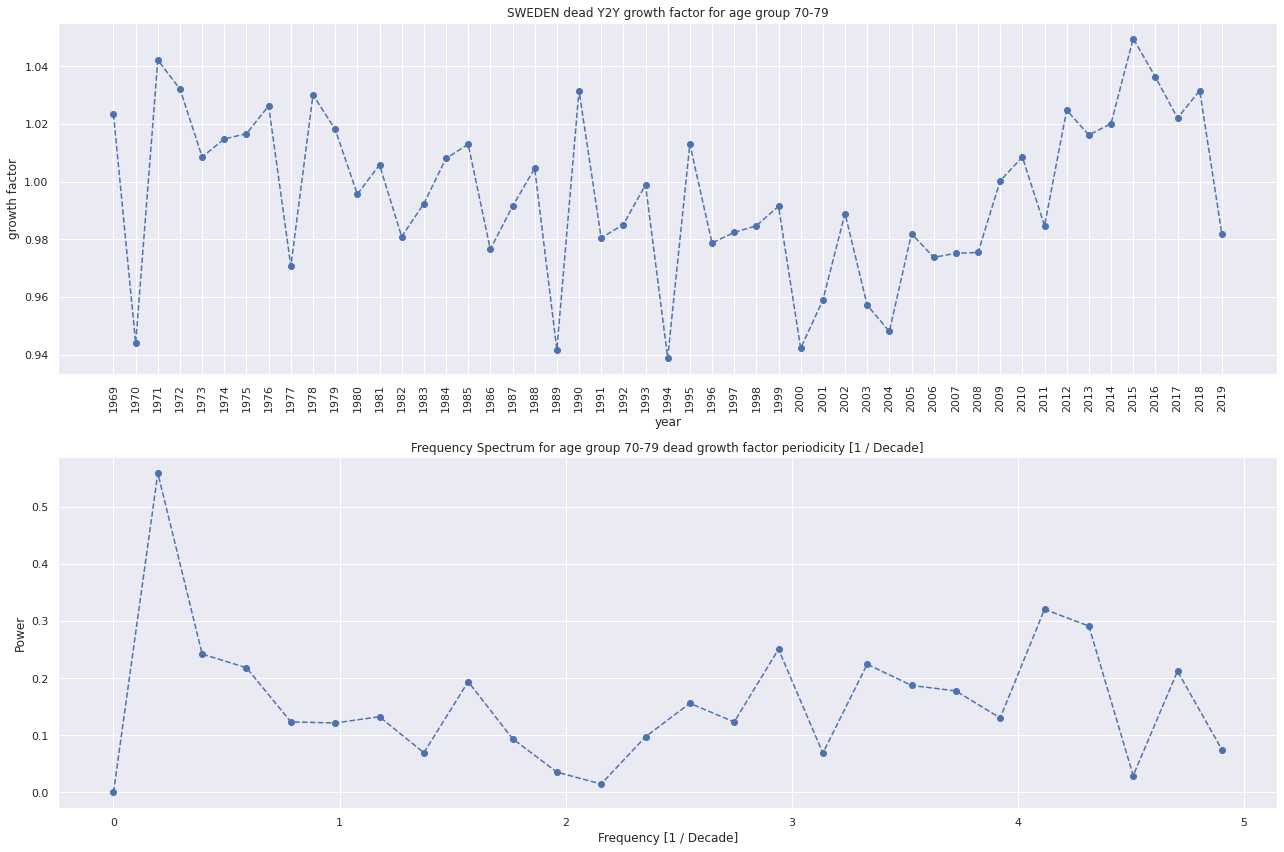

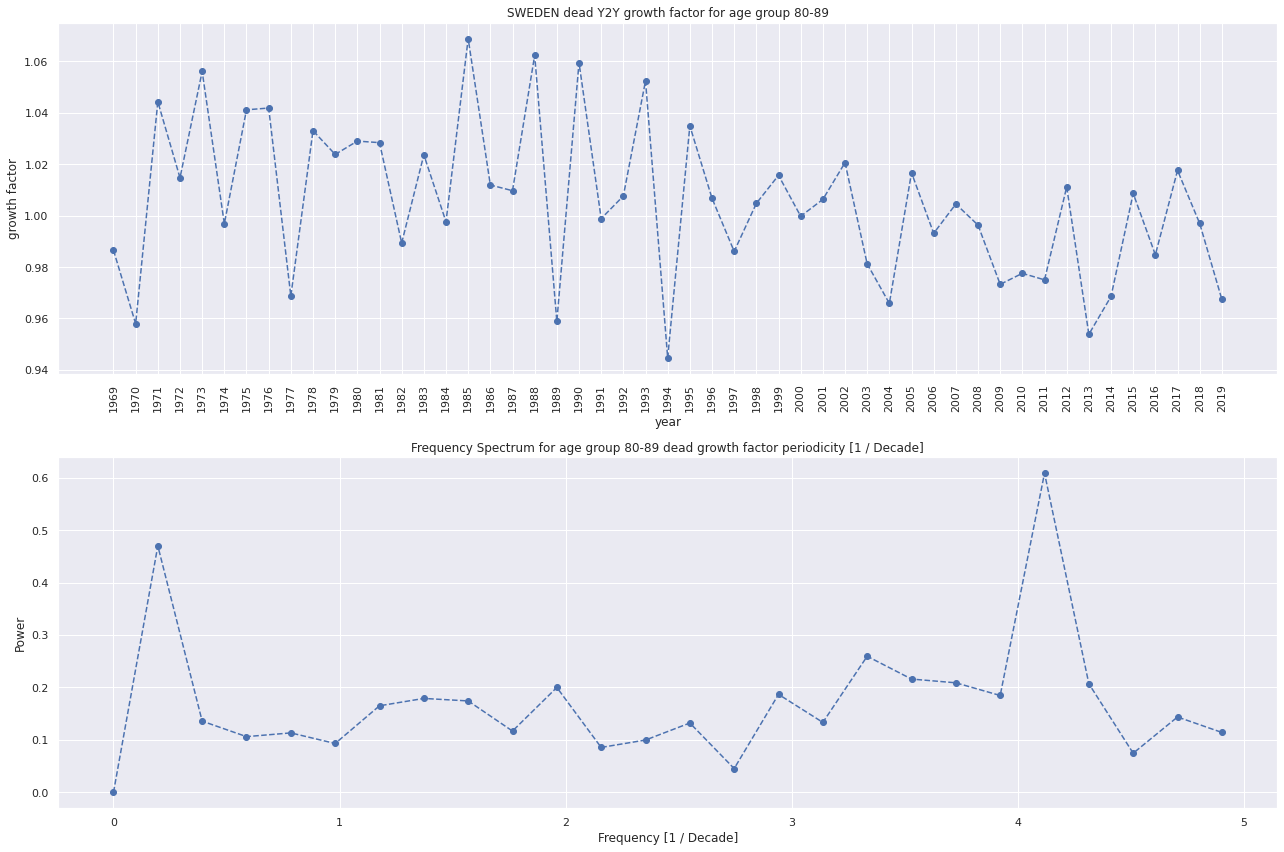

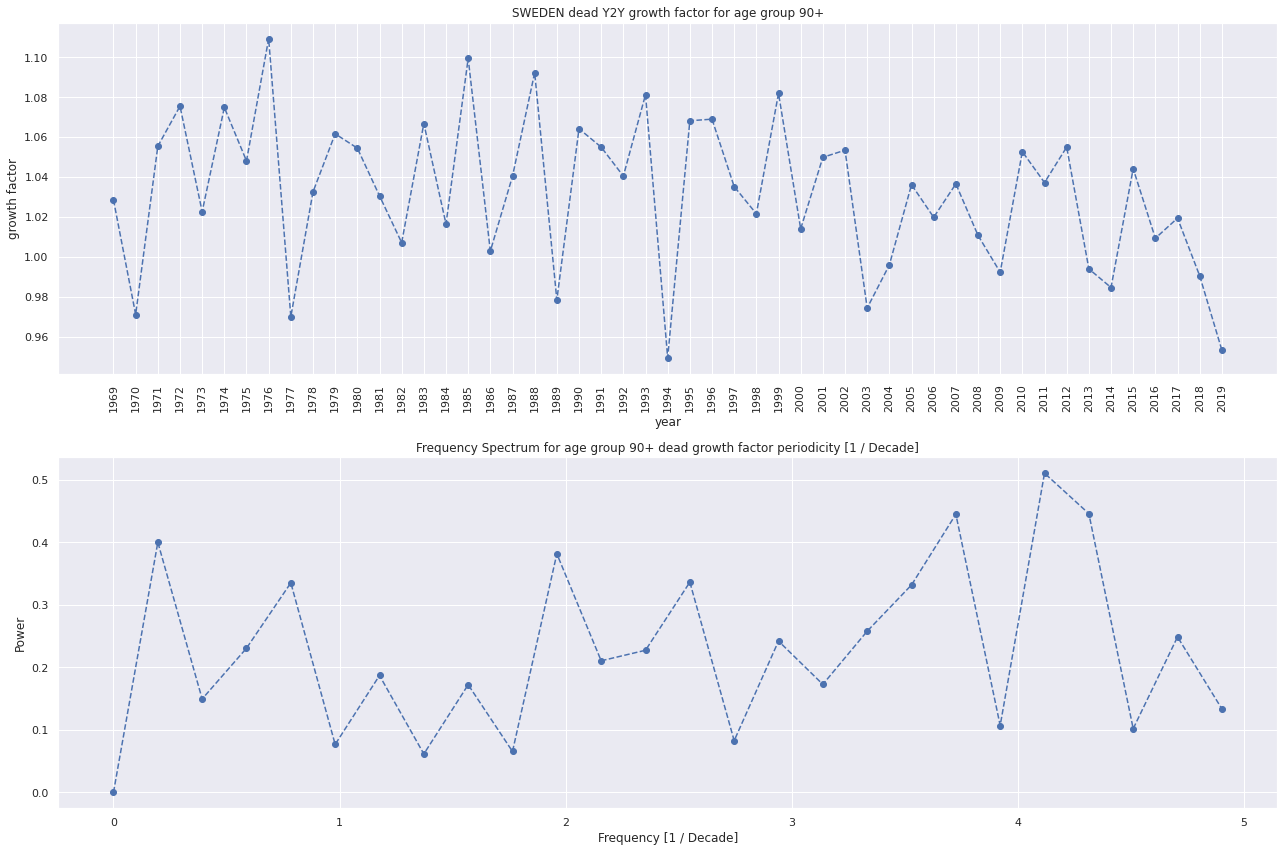

In [660]:
for ag in coarse_dead_y2y_growth.columns:
    
    signal = coarse_dead_y2y_growth[ag]
    plot_signal_period(signal,ag,'dead') 

In [661]:
##### Life expectancy - proportion of age group dead
pop_coarse_grps

-59    60-69   70-79   80-89    90+
year                                         
1968  6408393   845646  498278  164689  14187
1969  6446856   864899  508952  168491  15072
1970  6488760   878605  523696  174210  15958
1971  6490316   889681  537497  180857  16814
1972  6474661   900323  550539  186175  17431
1973  6460322   910652  562728  192143  18583
1974  6465513   918209  575483  197554  19932
1975  6476030   920598  587204  203465  21145
1976  6485318   920243  599733  208869  22016
1977  6494604   919320  614723  215051  23418
1978  6494111   914633  628862  222260  24571
1979  6496700   907552  644438  228900  25420
1980  6477126   921500  655970  236971  26370
1981  6456081   928373  665978  244968  27633
1982  6440640   926661  676725  254447  29011
1983  6426171   924535  686934  262470  30463
1984  6423042   920666  694798  272154  31961
1985  6428669   918050  698217  279993  33210
1986  6445024   912182  700458  288879  34972
1987  6472987   903784  701981  298807  36524
1988  6514934   898114  700585  307498  37757
1989  6579300   890182  698617  319532  39405
1990  6640688   866964  713400  328002  41576
1991  6693843   847482  723174  336113  43507
1992  6742340   834182  725250  344435  45806
1993  6801525   819094  726701  350553  47236
1994  6871425   808803  728021  358023  50109
1995  6892475   800880  729402  362117  52622
1996  6897910   798067  727735  365720  55067
1997  6898430   798706  723001  369851  57637
1998  6898934   802199  720556  372136  60497
1999  6897508   812575  714861  373524  62958
2000  6909428   820736  700066  387393  65169
2001  6921987   835356  687574  397220  66991
2002  6929214   862271  679777  401019  68507
2003  6928342   901751  669639  405424  70514
2004  6918573   947732  662750  409495  72842
2005  6909093   993543  657953  413097  74066
2006  6926971  1037403  658629  414657  75597
2007  6951811  1077189  662965  414034  76928
2008  6981407  1111680  670147  415141  77972
2009  7024450  1139212  682635  414404  79981
2010  7064179  1161830  692657  411161  85743
2011  7100766  1175884  707987  408208  90010
2012  7144043  1179498  734204  406916  91232
2013  7200762  1175251  771134  404702  93015
2014  7272509  1161100  814338  404412  94996
2015  7345143  1147578  856646  405287  96363
2016  7455874  1135688  896697  409775  97119
2017  7549389  1125099  933084  415286  97384
2018  7629408  1114377  964267  423830  98303
2019  7693832  1108438  989013  436679  99627

In [662]:
coarse_dead_flat


coarse_bin  -59    60-69  70-79  80-89  90+  
year                                         
1968        14239  14575  25301  23470   4879
1969        13995  15280  25891  23154   5018
1970        13736  14786  24441  22180   4873
1971        13865  15092  25471  23163   5143
1972        13749  14985  26287  23504   5531
1973        13266  15384  26511  24823   5656
1974        13258  15332  26902  24745   6079
1975        13267  15457  27349  25764   6371
1976        13140  15560  28067  26843   7067
1977        12886  15212  27244  26003   6855
1978        12642  15036  28062  26863   7078
1979        12802  14685  28570  27503   7514
1980        12222  14907  28444  28301   7923
1981        11462  14694  28608  29105   8165
1982        11210  14381  28061  28795   8223
1983        10762  13934  27846  29476   8772
1984        10590  13501  28069  29406   8916
1985        10609  13759  28431  31431   9802
1986        10461  13435  27763  31806   9830
1987        10490  12950  27524  32115  10227
1988        10582  13217  27650  34119  11170
1989        10239  12188  26038  32715  10929
1990        10226  11783  26859  34663  11630
1991        10360  11614  26334  34623  12269
1992         9838  11278  25941  34888  12765
1993         9780  10796  25911  36718  13802
1994         9716  10010  24327  34687  13104
1995         9441   9975  24643  35899  13997
1996         9256   9655  24118  36142  14962
1997         9088   9419  23692  35639  15488
1998         9006   9305  23329  35809  15822
1999         9043   9066  23129  36371  17117
2000         9044   8906  21791  36363  17357
2001         9177   8865  20895  36593  18222
2002         8872   8931  20663  37348  19195
2003         8703   9131  19777  36647  18703
2004         8477   9283  18749  35396  18627
2005         8255   9758  18410  35987  19300
2006         8046   9783  17926  35740  19682
2007         7832  10114  17480  35902  20401
2008         7711  10298  17050  35770  20620
2009         7654  10097  17054  34814  20461
2010         7211  10506  17199  34033  21538
2011         7169  10312  16935  33183  22339
2012         7138  10325  17354  33554  23567
2013         7091  10247  17634  32005  23425
2014         7024   9900  17988  30999  23065
2015         6968   9710  18879  31267  24083
2016         6840   9480  19564  30791  24307
2017         6858   9008  19995  31333  24778
2018         6741   9039  20625  31238  24542
2019         6469   8430  20251  30220  23396

In [663]:
coarse_mort = coarse_dead_flat / pop_coarse_grps
coarse_mort

coarse_bin     -59       60-69     70-79     80-89     90+  
year                                                        
1968        0.002222  0.017235  0.050777  0.142511  0.343906
1969        0.002171  0.017667  0.050871  0.137420  0.332935
1970        0.002117  0.016829  0.046670  0.127318  0.305364
1971        0.002136  0.016963  0.047388  0.128074  0.305876
1972        0.002124  0.016644  0.047748  0.126247  0.317308
1973        0.002053  0.016893  0.047112  0.129190  0.304364
1974        0.002051  0.016698  0.046747  0.125257  0.304987
1975        0.002049  0.016790  0.046575  0.126626  0.301301
1976        0.002026  0.016909  0.046799  0.128516  0.320994
1977        0.001984  0.016547  0.044319  0.120916  0.292724
1978        0.001947  0.016439  0.044623  0.120863  0.288063
1979        0.001971  0.016181  0.044333  0.120153  0.295594
1980        0.001887  0.016177  0.043362  0.119428  0.300455
1981        0.001775  0.015828  0.042956  0.118811  0.295480
1982        0.001741  0.015519  0.041466  0.113167  0.283444
1983        0.001675  0.015071  0.040537  0.112302  0.287956
1984        0.001649  0.014664  0.040399  0.108049  0.278965
1985        0.001650  0.014987  0.040719  0.112256  0.295152
1986        0.001623  0.014728  0.039635  0.110101  0.281082
1987        0.001621  0.014329  0.039209  0.107477  0.280008
1988        0.001624  0.014716  0.039467  0.110957  0.295839
1989        0.001556  0.013692  0.037271  0.102384  0.277351
1990        0.001540  0.013591  0.037649  0.105679  0.279729
1991        0.001548  0.013704  0.036414  0.103010  0.282001
1992        0.001459  0.013520  0.035768  0.101291  0.278675
1993        0.001438  0.013180  0.035656  0.104743  0.292192
1994        0.001414  0.012376  0.033415  0.096885  0.261510
1995        0.001370  0.012455  0.033785  0.099136  0.265991
1996        0.001342  0.012098  0.033141  0.098824  0.271705
1997        0.001317  0.011793  0.032769  0.096360  0.268716
1998        0.001305  0.011599  0.032376  0.096226  0.261534
1999        0.001311  0.011157  0.032355  0.097373  0.271880
2000        0.001309  0.010851  0.031127  0.093866  0.266338
2001        0.001326  0.010612  0.030389  0.092123  0.272007
2002        0.001280  0.010358  0.030397  0.093133  0.280190
2003        0.001256  0.010126  0.029534  0.090392  0.265238
2004        0.001225  0.009795  0.028290  0.086438  0.255718
2005        0.001195  0.009821  0.027981  0.087115  0.260578
2006        0.001162  0.009430  0.027217  0.086192  0.260354
2007        0.001127  0.009389  0.026366  0.086713  0.265196
2008        0.001105  0.009263  0.025442  0.086163  0.264454
2009        0.001090  0.008863  0.024983  0.084010  0.255823
2010        0.001021  0.009043  0.024830  0.082773  0.251193
2011        0.001010  0.008770  0.023920  0.081289  0.248184
2012        0.000999  0.008754  0.023636  0.082459  0.258319
2013        0.000985  0.008719  0.022868  0.079083  0.251841
2014        0.000966  0.008526  0.022089  0.076652  0.242800
2015        0.000949  0.008461  0.022038  0.077148  0.249920
2016        0.000917  0.008347  0.021818  0.075141  0.250281
2017        0.000908  0.008006  0.021429  0.075449  0.254436
2018        0.000884  0.008111  0.021389  0.073704  0.249657
2019        0.000841  0.007605  0.020476  0.069204  0.234836

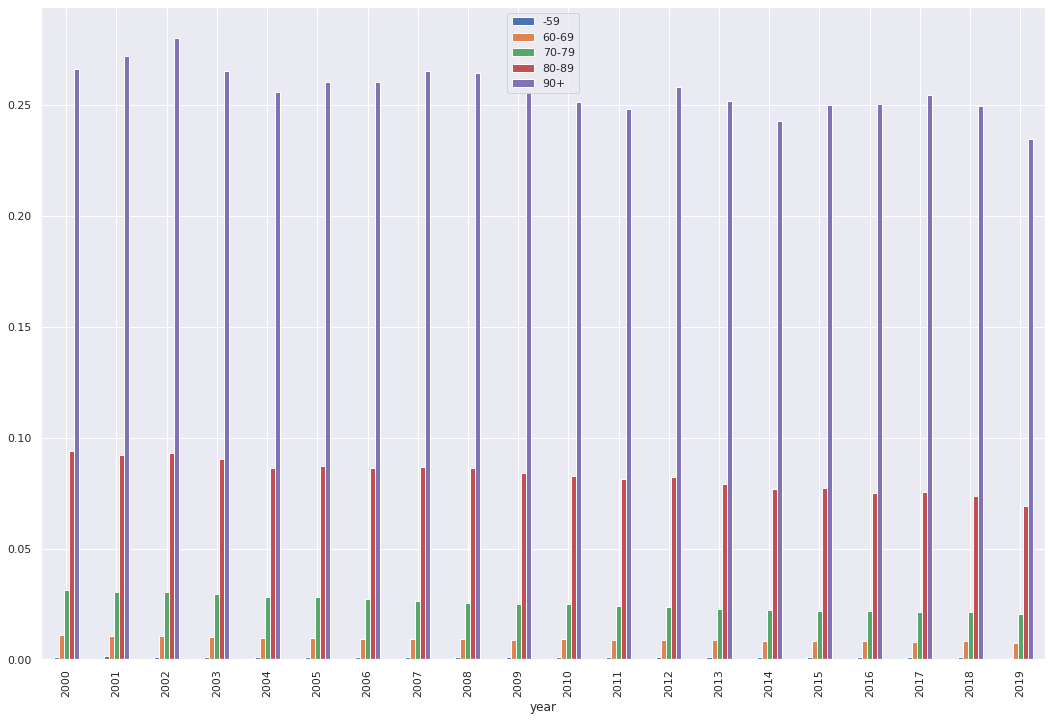

In [664]:
coarse_mort.loc['2000':].plot(figsize=(18,12),kind='bar')
plt.legend(loc='upper center')

In [665]:
coarse_bin_sizes =  pd.Series([60,10,10,10,1],index=coarse_mort.columns)
coarse_bin_sizes



coarse_bin
-59      60
60-69    10
70-79    10
80-89    10
90+       1
dtype: int64

In [666]:
''' 
Med 1968 års mortalititet, så var risken att dö för en nyfödd inom åldersspannet 0-59 år 0.12,mellan 60-69 0.16,
mellan 70-79 0.41, och mellan 80-89 0.78

CORRECT INTERPRETATION ? 

'''
proportion_of_pop_dead_in_interval = ( 1 -  ( 1 - coarse_mort ) ** coarse_bin_sizes)
proportion_of_pop_dead_in_interval['90+'] = 1
proportion_of_pop_dead_in_interval

coarse_bin     -59       60-69     70-79     80-89  90+  
year                                                     
1968        0.124941  0.159582  0.406141  0.785076      1
1969        0.122248  0.163264  0.406731  0.771969      1
1970        0.119397  0.156100  0.379943  0.743810      1
1971        0.120422  0.157254  0.384597  0.746021      1
1972        0.119747  0.154512  0.386916  0.740649      1
1973        0.116032  0.156653  0.382808  0.749255      1
1974        0.115878  0.154973  0.380441  0.737696      1
1975        0.115775  0.155767  0.379323  0.741773      1
1976        0.114577  0.156784  0.380781  0.747306      1
1977        0.112338  0.153677  0.364481  0.724383      1
1978        0.110339  0.152751  0.366501  0.724218      1
1979        0.111614  0.150521  0.364574  0.721983      1
1980        0.107139  0.150487  0.358085  0.719684      1
1981        0.101131  0.147467  0.355360  0.717715      1
1982        0.099245  0.144790  0.345250  0.699103      1
1983        0.095676  0.140892  0.338874  0.696156      1
1984        0.094263  0.137336  0.337924  0.681280      1
1985        0.094346  0.140158  0.340133  0.695999      1
1986        0.092867  0.137896  0.332639  0.688538      1
1987        0.092729  0.134392  0.329669  0.679231      1
1988        0.092930  0.137791  0.331467  0.691519      1
1989        0.089214  0.128781  0.316023  0.660449      1
1990        0.088319  0.127893  0.318707  0.672710      1
1991        0.088746  0.128892  0.309915  0.662809      1
1992        0.083884  0.127263  0.305274  0.656289      1
1993        0.082715  0.124255  0.304461  0.669267      1
1994        0.081394  0.117093  0.288132  0.639063      1
1995        0.078951  0.117797  0.290852  0.647962      1
1996        0.077405  0.114602  0.286111  0.646740      1
1997        0.076049  0.111863  0.283358  0.636962      1
1998        0.075384  0.110123  0.280444  0.636420      1
1999        0.075697  0.106133  0.280282  0.641008      1
2000        0.075579  0.103364  0.271100  0.626815      1
2001        0.076514  0.101195  0.265531  0.619573      1
2002        0.073991  0.098879  0.265586  0.623784      1
2003        0.072642  0.096767  0.259024  0.612257      1
2004        0.070920  0.093743  0.249470  0.595070      1
2005        0.069219  0.093985  0.247080  0.598061      1
2006        0.067357  0.090400  0.241145  0.593977      1
2007        0.065398  0.090023  0.234482  0.596286      1
2008        0.064156  0.088867  0.227184  0.593851      1
2009        0.063319  0.085179  0.223532  0.584177      1
2010        0.059439  0.086834  0.222319  0.578528      1
2011        0.058807  0.084315  0.215027  0.571662      1
2012        0.058216  0.084168  0.212745  0.577085      1
2013        0.057401  0.083847  0.206524  0.561262      1
2014        0.056329  0.082066  0.200179  0.549542      1
2015        0.055355  0.081463  0.199763  0.551955      1
2016        0.053580  0.080407  0.197958  0.542117      1
2017        0.053070  0.077240  0.194763  0.543640      1
2018        0.051655  0.078215  0.194437  0.534952      1
2019        0.049217  0.073502  0.186887  0.511860      1

In [667]:
pd.DataFrame(proportion_of_pop_dead_in_interval.loc['2019']).index.categories[0]


'-59'

In [668]:
# defines a std_pop, think 'deaths per 100000'

def dead_and_remaining(year):
    
    prop_dead= pd.DataFrame(proportion_of_pop_dead_in_interval.loc[year])

    std_pop = 100000
    
    remaining = np.zeros(len(proportion_of_pop_dead_in_interval.columns))
    dead = np.zeros(len(proportion_of_pop_dead_in_interval.columns))
    
    for i in range(len(prop_dead)):
        dead[i] = prop_dead.iloc[i,0] * std_pop
        std_pop -= prop_dead.iloc[i,0] * std_pop
        remaining[i] = std_pop
    
    return (dead,remaining)


In [669]:
pop_evolution = pd.DataFrame()

for year in proportion_of_pop_dead_in_interval.index:
    
    tmp = pd.DataFrame(dead_and_remaining(year)).T
    tmp.columns = ['dead','remaining']
    tmp['year'] = year
    pop_evolution = pd.concat([pop_evolution,tmp])
    
pop_evolution['interval'] = np.tile(['-59','60-69','70-79','80-89','90+'],
                                      len(proportion_of_pop_dead_in_interval))

pop_evolution = pop_evolution.set_index(['year','interval'])
pop_evolution.tail(10)

dead     remaining
year interval                            
2018 -59        5165.481273  94834.518727
     60-69      7417.487720  87417.031008
     70-79     16997.093690  70419.937317
     80-89     37671.306443  32748.630874
     90+       32748.630874      0.000000
2019 -59        4921.700024  95078.299976
     60-69      6988.467557  88089.832419
     70-79     16462.837111  71626.995308
     80-89     36662.995779  34963.999529
     90+       34963.999529      0.000000

<AxesSubplot:xlabel='year,interval'>

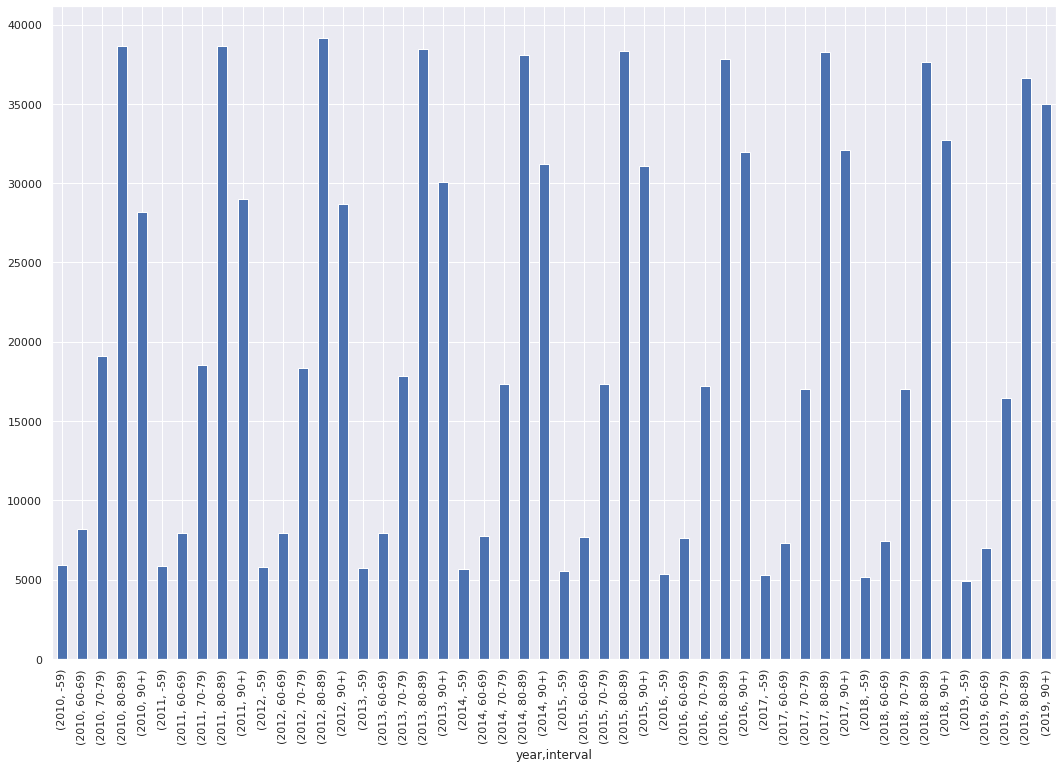

In [670]:
# note that 2019 dies more 90+ than 2018, despite mortality for the group being lower! 
# reason is that there are more of 90+ remaining 2019 than 2018

pop_evolution.loc['2010':,'dead'].plot(kind='bar',figsize=(18,12))

1969 interval
-59      87775.206175
60-69    73444.633519
70-79    43572.409401
80-89     9935.881674
90+          0.000000
Name: remaining, dtype: float64
1974 interval
-59      88412.162692
60-69    74710.640628
70-79    46287.645414
80-89    12141.445216
90+          0.000000
Name: remaining, dtype: float64
1979 interval
-59      88838.597197
60-69    75466.503616
70-79    47953.378333
80-89    13331.875594
90+          0.000000
Name: remaining, dtype: float64
1984 interval
-59      90573.661243
60-69    78134.661216
70-79    51731.085649
80-89    16487.734276
90+          0.000000
Name: remaining, dtype: float64
1989 interval
-59      91078.591667
60-69    79349.410311
70-79    54273.176502
80-89    18428.524008
90+          0.000000
Name: remaining, dtype: float64
1994 interval
-59      91860.567080
60-69    81104.339425
70-79    57735.576071
80-89    20838.902532
90+          0.000000
Name: remaining, dtype: float64
1999 interval
-59      92430.349499
60-69    82620.436670
70-79 

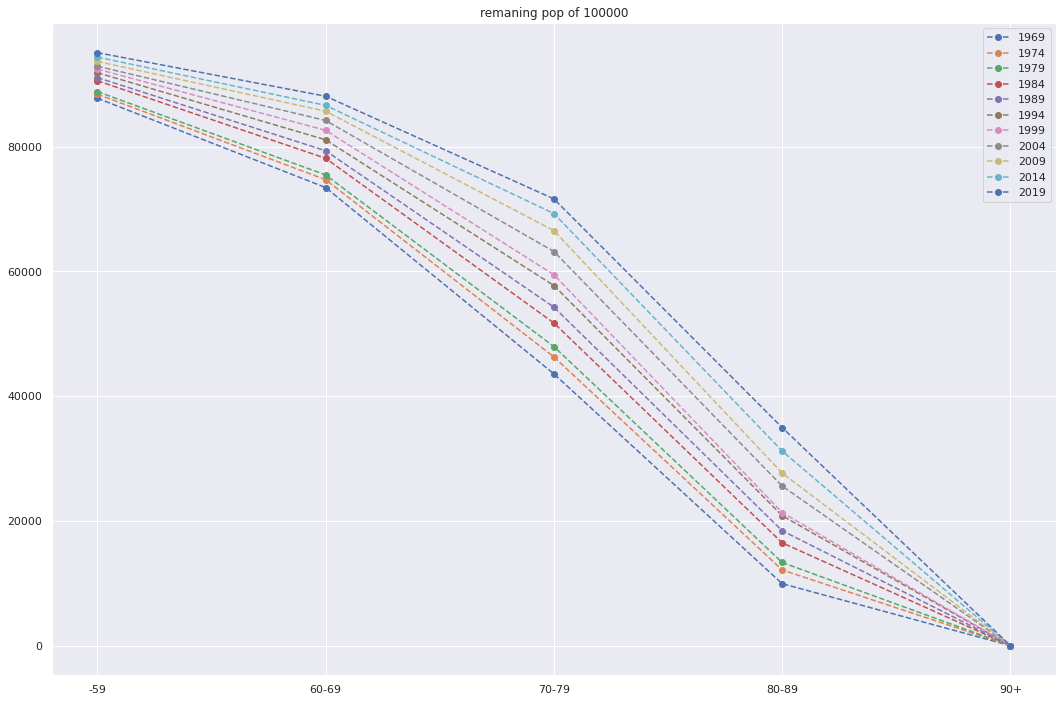

In [671]:
plt.figure(figsize=(18,12))

for y in pop_evolution.index.get_level_values(0)[::5][1::5]:
    print (y,pop_evolution.loc[y,'remaining'])
    plt.plot(pop_evolution.loc[y,'remaining'],'o--',label=y)
    
plt.title('remaning pop of 100000')
plt.legend(loc='upper right')